In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Suppress warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
filepath = '/kaggle/input/datathon2023'
df_train = pd.read_csv(os.path.join(filepath, 'train.csv'), index_col=[0])
df_test = pd.read_csv(os.path.join(filepath, 'test_x.csv'), index_col=[0])
sub = pd.read_csv(os.path.join(filepath, 'sample_submission.csv'), index_col=[0])

# Veriyle ilgili analiz

In [3]:
df_train.dtypes

Cinsiyet                                       object
Yaş Grubu                                      object
Medeni Durum                                   object
Eğitim Düzeyi                                  object
İstihdam Durumu                                object
Yıllık Ortalama Gelir                         float64
Yaşadığı Şehir                                 object
En Çok İlgilendiği Ürün Grubu                  object
Yıllık Ortalama Satın Alım Miktarı            float64
Yıllık Ortalama Sipariş Verilen Ürün Adedi    float64
Eğitime Devam Etme Durumu                      object
Öbek İsmi                                      object
Yıllık Ortalama Sepete Atılan Ürün Adedi      float64
dtype: object

In [4]:
df_train.isnull().sum()

Cinsiyet                                      0
Yaş Grubu                                     0
Medeni Durum                                  0
Eğitim Düzeyi                                 0
İstihdam Durumu                               0
Yıllık Ortalama Gelir                         0
Yaşadığı Şehir                                0
En Çok İlgilendiği Ürün Grubu                 0
Yıllık Ortalama Satın Alım Miktarı            0
Yıllık Ortalama Sipariş Verilen Ürün Adedi    0
Eğitime Devam Etme Durumu                     0
Öbek İsmi                                     0
Yıllık Ortalama Sepete Atılan Ürün Adedi      0
dtype: int64

In [5]:
df_train.isna().sum()

Cinsiyet                                      0
Yaş Grubu                                     0
Medeni Durum                                  0
Eğitim Düzeyi                                 0
İstihdam Durumu                               0
Yıllık Ortalama Gelir                         0
Yaşadığı Şehir                                0
En Çok İlgilendiği Ürün Grubu                 0
Yıllık Ortalama Satın Alım Miktarı            0
Yıllık Ortalama Sipariş Verilen Ürün Adedi    0
Eğitime Devam Etme Durumu                     0
Öbek İsmi                                     0
Yıllık Ortalama Sepete Atılan Ürün Adedi      0
dtype: int64

In [6]:
df_train.corr()

Yıllık Ortalama Gelir  \
Yıllık Ortalama Gelir                                    1.000000   
Yıllık Ortalama Satın Alım Miktarı                       0.740238   
Yıllık Ortalama Sipariş Verilen Ürün Adedi               0.444398   
Yıllık Ortalama Sepete Atılan Ürün Adedi                 0.145425   

                                            Yıllık Ortalama Satın Alım Miktarı  \
Yıllık Ortalama Gelir                                                 0.740238   
Yıllık Ortalama Satın Alım Miktarı                                    1.000000   
Yıllık Ortalama Sipariş Verilen Ürün Adedi                            0.418499   
Yıllık Ortalama Sepete Atılan Ürün Adedi                              0.133864   

                                            Yıllık Ortalama Sipariş Verilen Ürün Adedi  \
Yıllık Ortalama Gelir                                                         0.444398   
Yıllık Ortalama Satın Alım Miktarı                                            0.418499   
Yıllık Ortalama Sipariş Verilen Ürün Adedi                                    1.000000   
Yıllık Ortalama Sepete Atılan Ürün Adedi                                      0.659455   

                                            Yıllık Ortalama Sepete Atılan Ürün Adedi  
Yıllık Ortalama Gelir                                                       0.145425  
Yıllık Ortalama Satın Alım Miktarı                                          0.133864  
Yıllık Ortalama Sipariş Verilen Ürün Adedi                                  0.659455  
Yıllık Ortalama Sepete Atılan Ürün Adedi                                    1.000000

In [7]:
df_test.describe()

Yıllık Ortalama Gelir  Yıllık Ortalama Satın Alım Miktarı  \
count           2.340000e+03                         2340.000000   
mean            3.622524e+05                        16674.303935   
std             2.232063e+05                        14266.101056   
min             8.065675e+04                         2870.657175   
25%             2.120081e+05                         4807.074240   
50%             2.836947e+05                         8186.095300   
75%             4.669887e+05                        30747.419142   
max             1.229399e+06                        46380.542188   

       Yıllık Ortalama Sipariş Verilen Ürün Adedi  \
count                                 2340.000000   
mean                                    23.465787   
std                                     14.559035   
min                                      0.000000   
25%                                     11.336283   
50%                                     20.094319   
75%                                     33.431156   
max                                     64.017477   

       Yıllık Ortalama Sepete Atılan Ürün Adedi  
count                               2340.000000  
mean                                  72.078920  
std                                   46.311708  
min                                    5.283642  
25%                                   24.383782  
50%                                   71.033886  
75%                                  104.202802  
max                                  237.768581

## Kaç kategori var?

In [8]:
for i in df_test.columns:
    unique_categories = df_test[i].nunique()
    print(f"Sütun '{i}' için benzersiz kategori sayısı: {unique_categories}")

Sütun 'Cinsiyet' için benzersiz kategori sayısı: 2
Sütun 'Yaş Grubu' için benzersiz kategori sayısı: 5
Sütun 'Medeni Durum' için benzersiz kategori sayısı: 2
Sütun 'Eğitim Düzeyi' için benzersiz kategori sayısı: 9
Sütun 'İstihdam Durumu' için benzersiz kategori sayısı: 4
Sütun 'Yıllık Ortalama Gelir' için benzersiz kategori sayısı: 2340
Sütun 'Yaşadığı Şehir' için benzersiz kategori sayısı: 4
Sütun 'En Çok İlgilendiği Ürün Grubu' için benzersiz kategori sayısı: 5
Sütun 'Yıllık Ortalama Satın Alım Miktarı' için benzersiz kategori sayısı: 2340
Sütun 'Yıllık Ortalama Sipariş Verilen Ürün Adedi' için benzersiz kategori sayısı: 2320
Sütun 'Eğitime Devam Etme Durumu' için benzersiz kategori sayısı: 2
Sütun 'Yıllık Ortalama Sepete Atılan Ürün Adedi' için benzersiz kategori sayısı: 2340


## Anlıyoruz ki veride null değer veya sıkıntılı bir durum yok..
## Şimdi kategorik ve sayısal değişkenlerle ilgilenmeliyiz.

# Encoding

In [9]:
# Encoding kısmına gelecek olursak, kategorik değişkenleri binary olanlar ve multiclass olanlar olarak ayırmalıyız.

# Öncelikle cinsiyet, medeni durum ve eğitime devam etme durumunu label encoding ile dönüştürelim.
df_train['Cinsiyet'] = df_train['Cinsiyet'].replace({'Kadın': 0, 'Erkek': 1})
df_test['Cinsiyet']  = df_test['Cinsiyet'].replace({'Kadın': 0, 'Erkek': 1})

df_train['Medeni Durum'] = df_train['Medeni Durum'].replace({'Bekar': 0, 'Evli': 1})
df_test['Medeni Durum']  = df_test['Medeni Durum'].replace({'Bekar': 0, 'Evli': 1})

df_train['Eğitime Devam Etme Durumu'] = df_train['Eğitime Devam Etme Durumu'].replace({'Etmiyor': 0, 'Ediyor': 1})
df_test['Eğitime Devam Etme Durumu']  = df_test['Eğitime Devam Etme Durumu'].replace({'Etmiyor': 0, 'Ediyor': 1})

In [10]:
kategorik_kolonlar = ['Yaş Grubu','Eğitim Düzeyi','Yaşadığı Şehir', 'İstihdam Durumu', 'En Çok İlgilendiği Ürün Grubu']
encoded_train = pd.get_dummies(df_train, columns=kategorik_kolonlar)
encoded_test = pd.get_dummies(df_test, columns=kategorik_kolonlar)

# Özellikler (X) ve etiketler (y) ayrımı
X = encoded_train.drop('Öbek İsmi', axis=1)
y = encoded_train['Öbek İsmi']

In [11]:
encoded_train

Cinsiyet  Medeni Durum  Yıllık Ortalama Gelir  \
index                                                  
0             0             0          748266.440879   
1             1             1          246298.609605   
2             1             0          268582.732360   
3             1             1          327721.837865   
4             1             1          397431.626948   
...         ...           ...                    ...   
5455          0             0          478054.247819   
5456          1             1          481852.853651   
5457          0             1          309443.687351   
5458          0             0          266604.268016   
5459          1             0          276155.078333   

       Yıllık Ortalama Satın Alım Miktarı  \
index                                       
0                            32010.900881   
1                             4145.729891   
2                             9924.379414   
3                             6417.780714   
4                             7886.663061   
...                                   ...   
5455                         43182.299801   
5456                         42107.996193   
5457                          4655.392445   
5458                          9016.165906   
5459                          9455.657480   

       Yıllık Ortalama Sipariş Verilen Ürün Adedi  Eğitime Devam Etme Durumu  \
index                                                                          
0                                       37.310644                          0   
1                                       11.554851                          0   
2                                       55.353236                          1   
3                                       15.417239                          0   
4                                       14.689837                          0   
...                                           ...                        ...   
5455                                    31.356284                          0   
5456                                    26.288620                          0   
5457                                     5.156906                          0   
5458                                    39.205399                          1   
5459                                    50.554188                          1   

      Öbek İsmi  Yıllık Ortalama Sepete Atılan Ürün Adedi  Yaş Grubu_18-30  \
index                                                                        
0        obek_4                                102.936904                0   
1        obek_5                                 82.176053                0   
2        obek_8                                141.661426                1   
3        obek_3                                 17.097397                0   
4        obek_3                                 20.470459                0   
...         ...                                       ...              ...   
5455     obek_6                                 51.600436                0   
5456     obek_6                                 49.190536                0   
5457     obek_1                                  9.537384                0   
5458     obek_8                                143.281718                1   
5459     obek_8                                127.329348                1   

       Yaş Grubu_31-40  ...  Yaşadığı Şehir_Kırsal  \
index                   ...                          
0                    1  ...                      0   
1                    0  ...                      0   
2                    0  ...                      0   
3                    0  ...                      1   
4                    1  ...                      0   
...                ...  ...                    ...   
5455                 0  ...                      0   
5456                 0  ...                      0   
5457                 0  ...                      0   
5458                 0  ...               

In [12]:
encoded_train.columns

Index(['Cinsiyet', 'Medeni Durum', 'Yıllık Ortalama Gelir',
       'Yıllık Ortalama Satın Alım Miktarı',
       'Yıllık Ortalama Sipariş Verilen Ürün Adedi',
       'Eğitime Devam Etme Durumu', 'Öbek İsmi',
       'Yıllık Ortalama Sepete Atılan Ürün Adedi', 'Yaş Grubu_18-30',
       'Yaş Grubu_31-40', 'Yaş Grubu_41-50', 'Yaş Grubu_51-60',
       'Yaş Grubu_>60', 'Eğitim Düzeyi_Doktora Mezunu',
       'Eğitim Düzeyi_Doktora Ötesi', 'Eğitim Düzeyi_Eğitimsiz',
       'Eğitim Düzeyi_Lise Mezunu', 'Eğitim Düzeyi_Ortaokul Mezunu',
       'Eğitim Düzeyi_Yüksek Lisans Mezunu', 'Eğitim Düzeyi_Yüksekokul Mezunu',
       'Eğitim Düzeyi_Üniversite Mezunu', 'Eğitim Düzeyi_İlkokul Mezunu',
       'Yaşadığı Şehir_Büyük Şehir', 'Yaşadığı Şehir_Köy veya Kasaba',
       'Yaşadığı Şehir_Küçük Şehir', 'Yaşadığı Şehir_Kırsal',
       'İstihdam Durumu_Düzenli ve Ücretli Bir İşi Var',
       'İstihdam Durumu_Emekli', 'İstihdam Durumu_Kendi İşinin Sahibi',
       'İstihdam Durumu_İşsiz veya Düzenli Bir İşi Yo

# Veri normalizasyonunun bir şeyi değiştirmediğini farkettim.

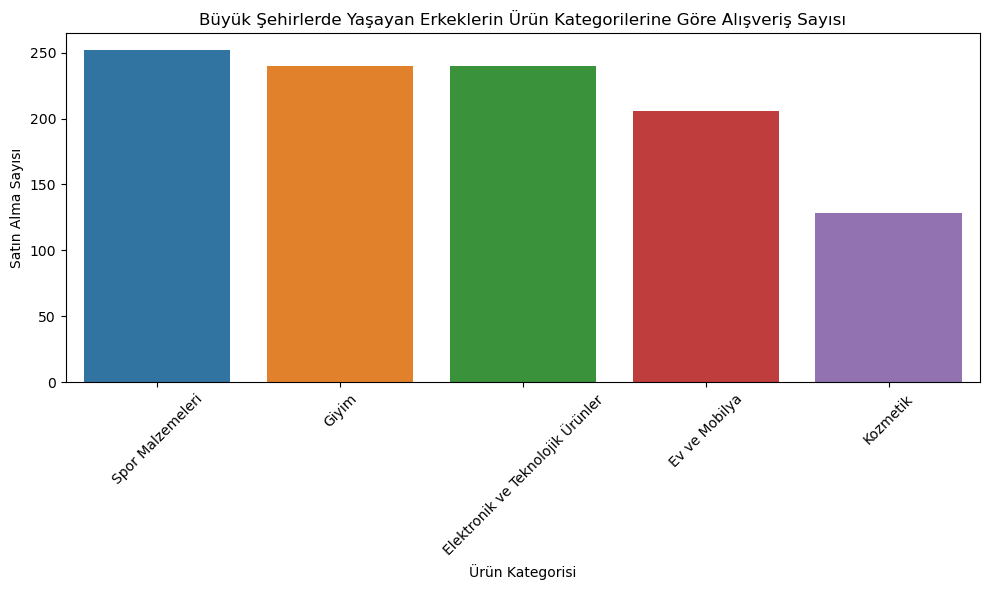

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Büyük şehirlerde yaşayan erkekleri seçme
big_cities_males = df_train[(df_train['Yaşadığı Şehir'] == 'Büyük Şehir') & (df_train['Cinsiyet'] == 1)]

# Kategoriye göre gruplama ve sayım yapma
category_counts = big_cities_males['En Çok İlgilendiği Ürün Grubu'].value_counts()

# Grafik çizimi
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.xticks(rotation=45)
plt.xlabel('Ürün Kategorisi')
plt.ylabel('Satın Alma Sayısı')
plt.title('Büyük Şehirlerde Yaşayan Erkeklerin Ürün Kategorilerine Göre Alışveriş Sayısı')
plt.tight_layout()
plt.show()


In [14]:
# Tüm öbek isimlerini al
obekler = df_train['Öbek İsmi'].unique()

# Her bir öbek için kaç değer olduğunu yazdır
for obek in obekler:
    obek_count = df_train[df_train['Öbek İsmi'] == obek].shape[0]
    print(f"{obek} Öbeği Kişi Sayısı:", obek_count)

obek_4 Öbeği Kişi Sayısı: 720
obek_5 Öbeği Kişi Sayısı: 706
obek_8 Öbeği Kişi Sayısı: 717
obek_3 Öbeği Kişi Sayısı: 695
obek_6 Öbeği Kişi Sayısı: 688
obek_1 Öbeği Kişi Sayısı: 692
obek_7 Öbeği Kişi Sayısı: 695
obek_2 Öbeği Kişi Sayısı: 547


# obek_1

### Cinsiyet

In [15]:
obek_1_rows = df_train[df_train['Öbek İsmi'] == 'obek_1']
obek_1_gender_counts = obek_1_rows['Cinsiyet'].value_counts()
print(obek_1_gender_counts)

0    366
1    326
Name: Cinsiyet, dtype: int64


### Yaş Grubu

In [16]:
obek_1_age = obek_1_rows['Yaş Grubu'].value_counts()
print(obek_1_age)

18-30    174
41-50    169
31-40    159
51-60    134
>60       56
Name: Yaş Grubu, dtype: int64


### Medeni Durum

In [17]:
obek_1_medeni_durum = obek_1_rows['Medeni Durum'].value_counts()
obek_1_medeni_durum

1    404
0    288
Name: Medeni Durum, dtype: int64

### Medeni Durumun Yaşa Gruplarına Göre Dağılımı

In [18]:
obek_1_marital_age = obek_1_rows.groupby(['Medeni Durum', 'Yaş Grubu'])['Yaş Grubu'].count().unstack()
print(obek_1_marital_age)

Yaş Grubu     18-30  31-40  41-50  51-60  >60
Medeni Durum                                 
0                64     72     69     54   29
1               110     87    100     80   27


<Figure size 1000x600 with 0 Axes>

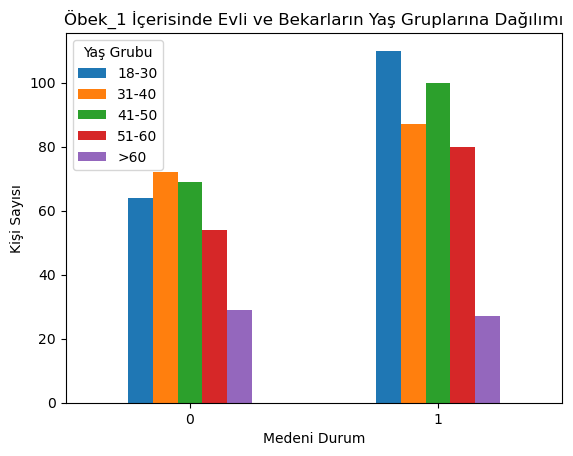

In [19]:
plt.figure(figsize=(10, 6))
obek_1_marital_age.plot(kind='bar')
plt.xlabel('Medeni Durum')
plt.ylabel('Kişi Sayısı')
plt.title('Öbek_1 İçerisinde Evli ve Bekarların Yaş Gruplarına Dağılımı')
plt.xticks(rotation=0)
plt.legend(title='Yaş Grubu')
plt.show()

### Eğitim Düzeyi

In [20]:
obek_1_egitim = obek_1_rows['Eğitim Düzeyi'].value_counts()
obek_1_egitim

Eğitimsiz               142
Lise Mezunu             134
Ortaokul Mezunu         131
İlkokul Mezunu          123
Doktora Ötesi            42
Yüksekokul Mezunu        35
Üniversite Mezunu        30
Yüksek Lisans Mezunu     29
Doktora Mezunu           26
Name: Eğitim Düzeyi, dtype: int64

In [21]:
# Genel insanlar ne durumda eğitimde?

df_train['Eğitim Düzeyi'].value_counts()

# Vaoowww. Eğitimsizlik yok denecek kadar az.. İyiymiş.

Lise Mezunu             1388
Üniversite Mezunu       1257
Yüksekokul Mezunu        588
Yüksek Lisans Mezunu     545
İlkokul Mezunu           417
Ortaokul Mezunu          412
Eğitimsiz                381
Doktora Mezunu           263
Doktora Ötesi            209
Name: Eğitim Düzeyi, dtype: int64

### Eğitim Düzeyinin Yaş Gruplarına Oranı ve Grafiği

In [22]:
obek_1_education_age = obek_1_rows.groupby(['Eğitim Düzeyi', 'Yaş Grubu'])['Öbek İsmi'].count().unstack()
obek_1_education_age

Yaş Grubu             18-30  31-40  41-50  51-60  >60
Eğitim Düzeyi                                        
Doktora Mezunu            7      6      6      4    3
Doktora Ötesi             9      9     11     11    2
Eğitimsiz                40     35     34     24    9
Lise Mezunu              31     33     27     31   12
Ortaokul Mezunu          31     32     32     26   10
Yüksek Lisans Mezunu      6      4     10      4    5
Yüksekokul Mezunu        13      6      7      5    4
Üniversite Mezunu         7      8      6      7    2
İlkokul Mezunu           30     26     36     22    9

<Figure size 1000x600 with 0 Axes>

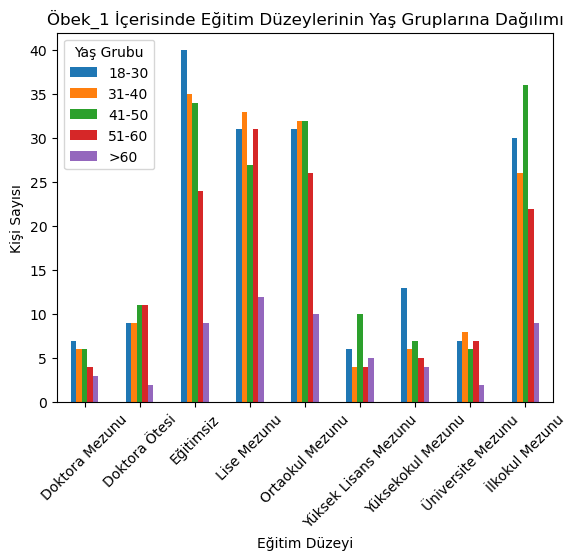

In [23]:
obek_1_education_age = obek_1_rows.groupby(['Eğitim Düzeyi', 'Yaş Grubu'])['Öbek İsmi'].count().unstack()

plt.figure(figsize=(10, 6))
obek_1_education_age.plot(kind='bar')
plt.xlabel('Eğitim Düzeyi')
plt.ylabel('Kişi Sayısı')
plt.title('Öbek_1 İçerisinde Eğitim Düzeylerinin Yaş Gruplarına Dağılımı')
plt.xticks(rotation=45)
plt.legend(title='Yaş Grubu')
plt.show()

### Eğitim Düzeyi Yaşadığı Yere Göre

<Figure size 1000x600 with 0 Axes>

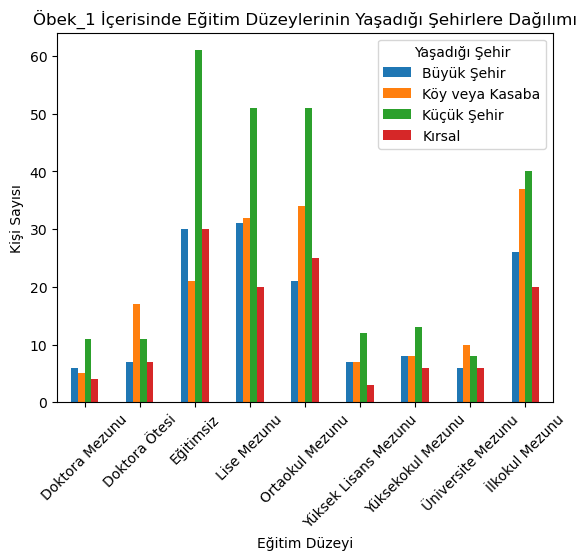

In [24]:
obek_1_education_city = obek_1_rows.groupby(['Eğitim Düzeyi', 'Yaşadığı Şehir'])['Öbek İsmi'].count().unstack()

plt.figure(figsize=(10, 6))
obek_1_education_city.plot(kind='bar')
plt.xlabel('Eğitim Düzeyi')
plt.ylabel('Kişi Sayısı')
plt.title('Öbek_1 İçerisinde Eğitim Düzeylerinin Yaşadığı Şehirlere Dağılımı')
plt.xticks(rotation=45)
plt.legend(title='Yaşadığı Şehir')
plt.show()

### İstihdam Durumu

In [25]:
obek_1_istihdam = obek_1_rows['İstihdam Durumu'].value_counts()
obek_1_istihdam

Düzenli ve Ücretli Bir İşi Var    357
İşsiz veya Düzenli Bir İşi Yok    205
Kendi İşinin Sahibi               127
Emekli                              3
Name: İstihdam Durumu, dtype: int64

<Figure size 1000x600 with 0 Axes>

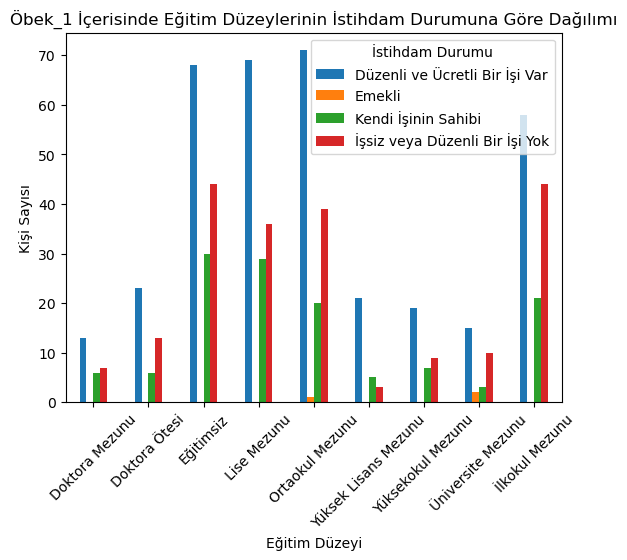

In [26]:
obek_1_education_employment = obek_1_rows.groupby(['Eğitim Düzeyi', 'İstihdam Durumu'])['Öbek İsmi'].count().unstack()

plt.figure(figsize=(10, 6))
obek_1_education_employment.plot(kind='bar')
plt.xlabel('Eğitim Düzeyi')
plt.ylabel('Kişi Sayısı')
plt.title('Öbek_1 İçerisinde Eğitim Düzeylerinin İstihdam Durumuna Göre Dağılımı')
plt.xticks(rotation=45)
plt.legend(title='İstihdam Durumu')
plt.show()

### Yıllık Ortalama Gelir

In [27]:
obek_1_yearly_income = obek_1_rows['Yıllık Ortalama Gelir']
overall_yearly_income = df_train['Yıllık Ortalama Gelir']

obek_1_avg_income = obek_1_yearly_income.mean()
overall_avg_income = overall_yearly_income.mean()

print("Öbek_1 Yıllık Ortalama Gelir Ortalaması:", obek_1_avg_income)
print("Tüm Veri Yıllık Ortalama Gelir Ortalaması:", overall_avg_income)

Öbek_1 Yıllık Ortalama Gelir Ortalaması: 229513.84797445723
Tüm Veri Yıllık Ortalama Gelir Ortalaması: 363571.1334275545


##### Yıllık Ortalama Gelirleri Az bu insanların.. Belki de en azı?

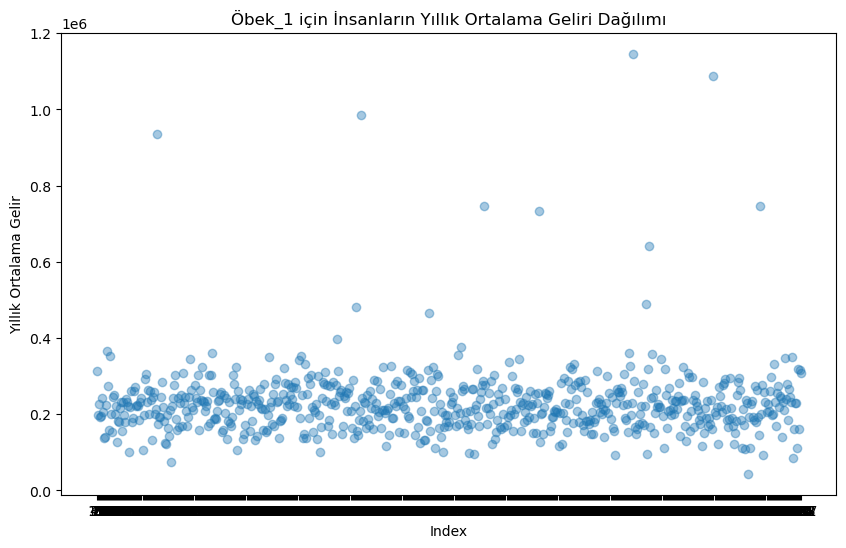

In [28]:
import matplotlib.pyplot as plt

obek_1_rows = df_train[df_train['Öbek İsmi'] == 'obek_1']
plt.figure(figsize=(10, 6))
plt.scatter(range(obek_1_rows.shape[0]), obek_1_rows['Yıllık Ortalama Gelir'], alpha=0.4)
plt.xlabel('Index')
plt.ylabel('Yıllık Ortalama Gelir')
plt.title('Öbek_1 için İnsanların Yıllık Ortalama Geliri Dağılımı')
plt.xticks(range(obek_1_rows.shape[0]), obek_1_rows.index)  # X ekseni indeks değerleri ile etiketlensin
plt.show()

##### İşsiz olmasına rağmen en yüksek yıllık ortalama gelire sahip biri var.

### Yıllık Ortalama Gelir Yaşadığı Yere Göre

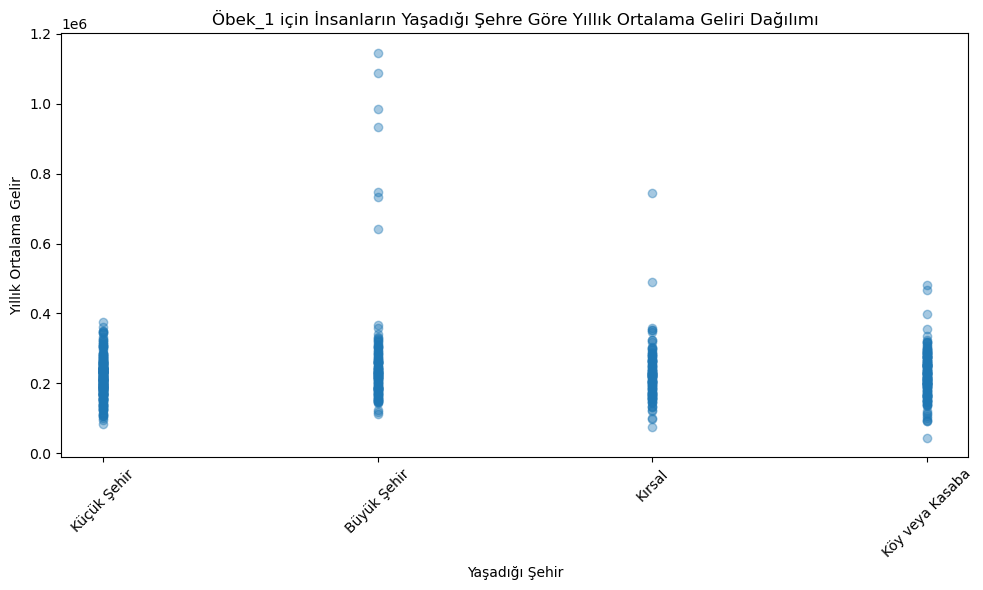

In [29]:
import matplotlib.pyplot as plt

obek_1_rows = df_train[df_train['Öbek İsmi'] == 'obek_1']
plt.figure(figsize=(10, 6))
plt.scatter(obek_1_rows['Yaşadığı Şehir'], obek_1_rows['Yıllık Ortalama Gelir'], alpha=0.4)
plt.xlabel('Yaşadığı Şehir')
plt.ylabel('Yıllık Ortalama Gelir')
plt.title('Öbek_1 için İnsanların Yaşadığı Şehre Göre Yıllık Ortalama Geliri Dağılımı')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Yaşadığı Şehir

In [30]:
obek_1_sehir = obek_1_rows['Yaşadığı Şehir'].value_counts()
obek_1_sehir

Küçük Şehir        258
Köy veya Kasaba    171
Büyük Şehir        142
Kırsal             121
Name: Yaşadığı Şehir, dtype: int64

In [31]:
# Peki diğer öbekteki insanlar nasıl şehirlerde yaşıyorlar?

df_train['Yaşadığı Şehir'].value_counts()

Büyük Şehir        1959
Küçük Şehir        1842
Köy veya Kasaba    1092
Kırsal              567
Name: Yaşadığı Şehir, dtype: int64

##### Çoğunluk Zaten Büyük Şehir dışında yaşıyormuş... Bir fark yok.

### En Çok İlgilendiği Ürün Grubu

In [32]:
obek_1_urun = obek_1_rows['En Çok İlgilendiği Ürün Grubu'].value_counts()
obek_1_urun

Giyim                               435
Kozmetik                            176
Ev ve Mobilya                        49
Elektronik ve Teknolojik Ürünler     23
Spor Malzemeleri                      9
Name: En Çok İlgilendiği Ürün Grubu, dtype: int64

##### Hmmmm... Bu insanlar kendilerine en çok üst baş alıyorlar ve kozmetiğe önem veriyorlar.

### Yıllık Ortalama Satın Alım Miktarı

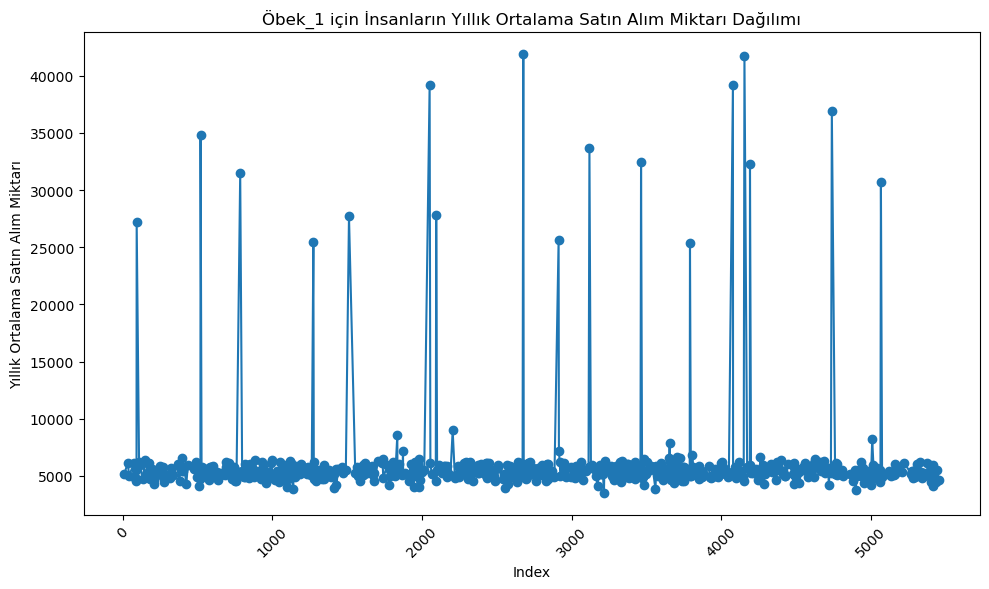

In [33]:
import matplotlib.pyplot as plt

obek_1_rows = df_train[df_train['Öbek İsmi'] == 'obek_1']
plt.figure(figsize=(10, 6))
plt.plot(obek_1_rows.index, obek_1_rows['Yıllık Ortalama Satın Alım Miktarı'], marker='o')
plt.xlabel('Index')
plt.ylabel('Yıllık Ortalama Satın Alım Miktarı')
plt.title('Öbek_1 için İnsanların Yıllık Ortalama Satın Alım Miktarı Dağılımı')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Grafik gerçekten doğru sonuç veriyor. 25000 ve üzeri 17 tane veri var... Ve Max değer genel ortalama için 48 bin... İnanılmaz para harcayanlar var...

### Yıllık Ortalama Sipariş Verilen Ürün Adedi

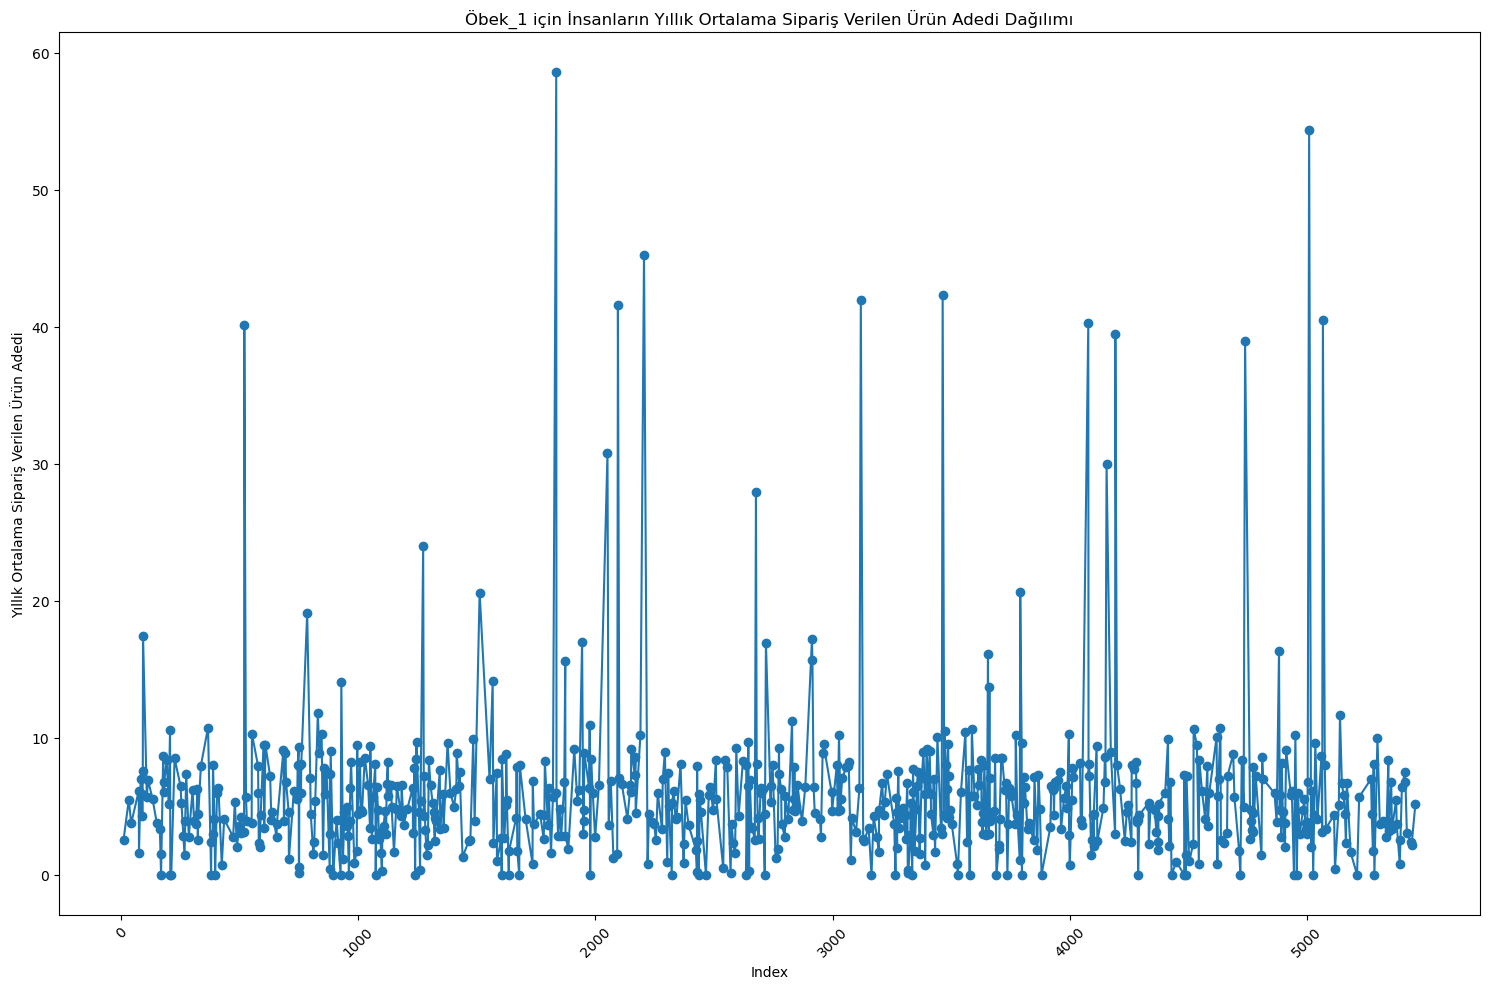

In [34]:
obek_1_rows = df_train[df_train['Öbek İsmi'] == 'obek_1']
plt.figure(figsize=(15, 10))
plt.plot(obek_1_rows.index, obek_1_rows['Yıllık Ortalama Sipariş Verilen Ürün Adedi'], marker='o')
plt.xlabel('Index')
plt.ylabel('Yıllık Ortalama Sipariş Verilen Ürün Adedi')
plt.title('Öbek_1 için İnsanların Yıllık Ortalama Sipariş Verilen Ürün Adedi Dağılımı')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [35]:
obek_1_rows = df_train[df_train['Öbek İsmi'] == 'obek_1']
rounded_avg_orders = obek_1_rows['Yıllık Ortalama Sipariş Verilen Ürün Adedi'].apply(round).value_counts().sort_values(ascending=False)
print(rounded_avg_orders)

4     105
6      87
3      75
5      70
7      64
8      63
2      55
0      49
9      34
1      31
10     21
11      7
17      4
16      4
42      3
14      3
40      2
12      2
21      2
39      2
28      1
54      1
30      1
19      1
45      1
31      1
59      1
24      1
41      1
Name: Yıllık Ortalama Sipariş Verilen Ürün Adedi, dtype: int64


In [36]:
# KARŞILAŞTIRMAN İÇİN TÜM VERİ SETİNDEKİ ORTALAMA

rounded_avg_orders_all = df_train['Yıllık Ortalama Sipariş Verilen Ürün Adedi'].apply(round).value_counts().sort_values(ascending=False)
rounded_avg_orders_all.head(10)

15    296
10    283
16    218
11    211
20    202
14    196
9     182
19    166
21    166
30    166
Name: Yıllık Ortalama Sipariş Verilen Ürün Adedi, dtype: int64

##### En çok para harcayan 17 isme şaşırmamalı... En çok alışverişi de onlar yapıyor :) Gariban 10 ve altındakiler....

### Eğitime Devam Etme Durumu

In [37]:
obek_1_egitim_devam_durumu = obek_1_rows['Eğitime Devam Etme Durumu'].value_counts()
obek_1_egitim_devam_durumu

0    651
1     41
Name: Eğitime Devam Etme Durumu, dtype: int64

In [38]:
# Genelde insanlar okuyor mu peki daha doğrusu hali hazırda gördükleri bir eğitim var mı?

df_train['Eğitime Devam Etme Durumu'].value_counts()

# Cevap hayır...

0    4554
1     906
Name: Eğitime Devam Etme Durumu, dtype: int64

### Yıllık Ortalama Sepete Eklenen Ürün Adedi

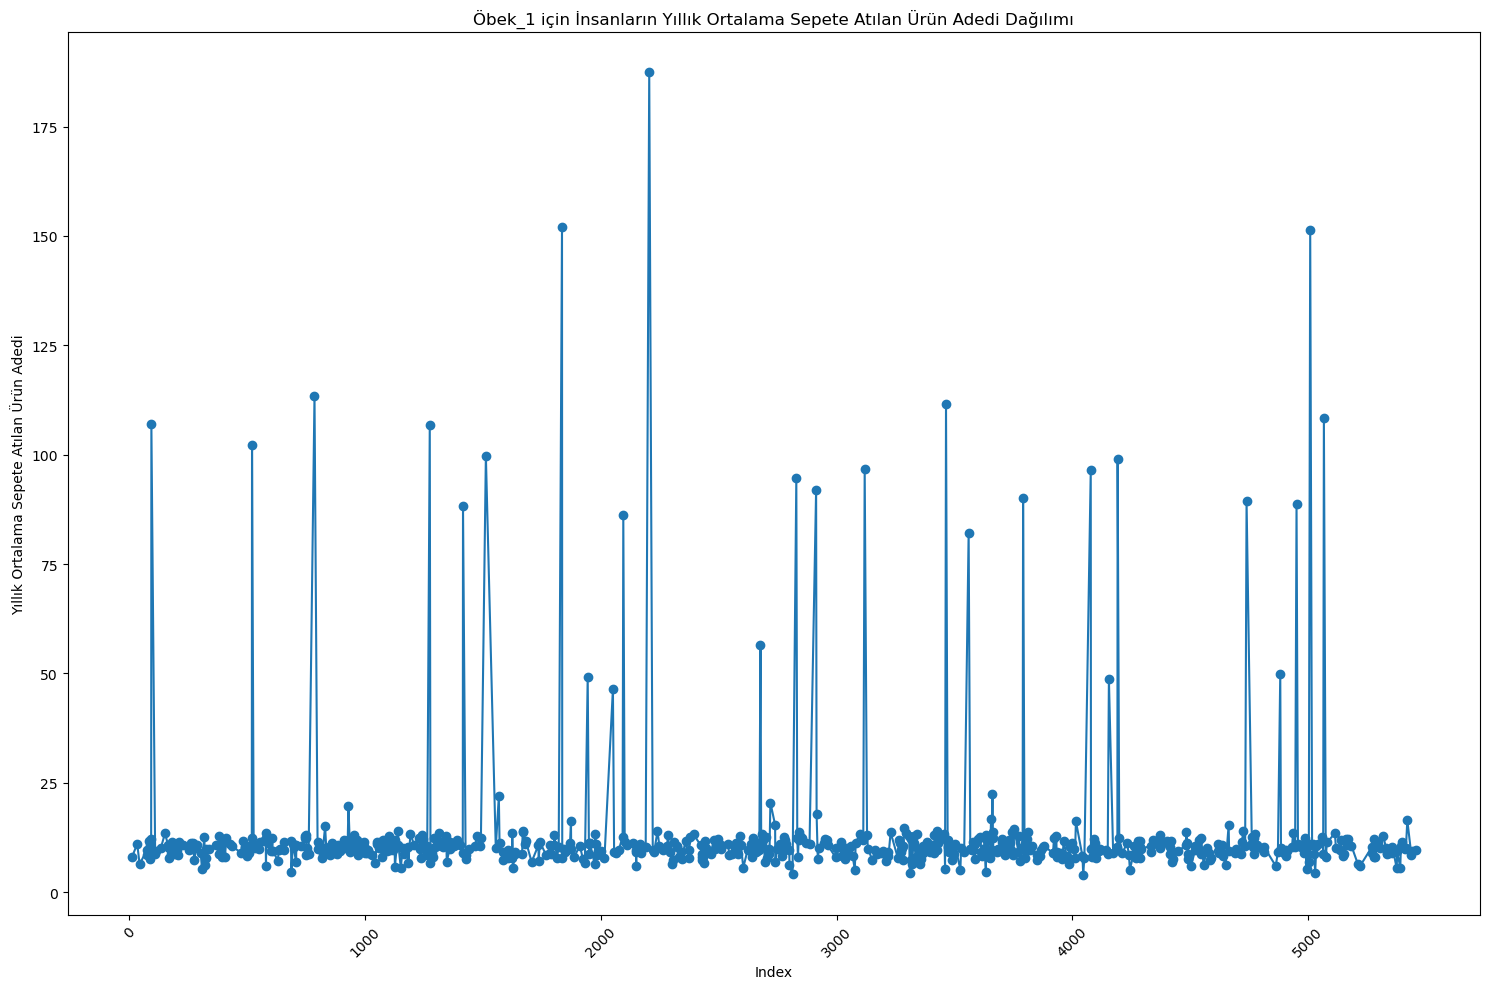

In [39]:
plt.figure(figsize=(15, 10))
plt.plot(obek_1_rows.index, obek_1_rows['Yıllık Ortalama Sepete Atılan Ürün Adedi'], marker='o')
plt.xlabel('Index')
plt.ylabel('Yıllık Ortalama Sepete Atılan Ürün Adedi')
plt.title('Öbek_1 için İnsanların Yıllık Ortalama Sepete Atılan Ürün Adedi Dağılımı')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [40]:
obek_1_rows = df_train[df_train['Öbek İsmi'] == 'obek_1']
rounded_avg_items = obek_1_rows['Yıllık Ortalama Sepete Atılan Ürün Adedi'].apply(round).value_counts().sort_values(ascending=False)
rounded_avg_items.head(15)

10     145
9      126
11     118
8       73
12      71
13      40
7       31
6       19
14      16
5       10
4        4
15       4
16       3
20       2
107      2
Name: Yıllık Ortalama Sepete Atılan Ürün Adedi, dtype: int64

In [41]:
yillik_ortalama_sepete_eklenen_urun_genel = df_train['Yıllık Ortalama Sepete Atılan Ürün Adedi'].apply(round).value_counts().sort_values(ascending=False)
yillik_ortalama_sepete_eklenen_urun_genel.head(15)

10     154
9      131
11     122
19      97
20      96
95      94
101     90
102     90
100     88
96      84
18      84
104     84
97      83
51      82
99      80
Name: Yıllık Ortalama Sepete Atılan Ürün Adedi, dtype: int64

##### Bu grup çok eşya almadığı gibi sepete de fazla eşya eklemiyor...

# obek_2

### Cinsiyet

In [42]:
obek_2_rows = df_train[df_train['Öbek İsmi'] == 'obek_2']

obek_2_gender_counts = obek_2_rows['Cinsiyet'].value_counts()
print(obek_2_gender_counts)

0    528
1     19
Name: Cinsiyet, dtype: int64


##### NASIL YANİ HEPSİ BAYANIMSI MI?????

##### Erkek olanların yaş aralığına bakabilir miyimm??

In [43]:
obek_2_male = df_train[(df_train['Öbek İsmi'] == 'obek_2') & (df_train['Cinsiyet'] == 1)]
age_group_counts = obek_2_male['Yaş Grubu'].value_counts().sort_index()

age_group_distribution = pd.DataFrame({'Yaş Grubu': age_group_counts.index, 'Kişi Sayısı': age_group_counts.values})
print(age_group_distribution)

  Yaş Grubu  Kişi Sayısı
0     18-30            4
1     31-40            4
2     41-50            5
3     51-60            4
4       >60            2


##### Çok da garip dağılmamış...

### Yaş Grubu

In [44]:
obek_2_age = obek_2_rows['Yaş Grubu'].value_counts()
print(obek_2_age)

18-30    134
41-50    109
31-40    106
51-60     99
>60       99
Name: Yaş Grubu, dtype: int64


### Medeni Durum

In [45]:
obek_2_medeni_durum = obek_2_rows['Medeni Durum'].value_counts()
obek_2_medeni_durum

1    424
0    123
Name: Medeni Durum, dtype: int64

##### HAbu bekarlar çimdur? Yaniii.. dağılımda sorun yokmuş... Grafikleştirmeye gerek yok..

In [46]:
obek_2_male = df_train[(df_train['Öbek İsmi'] == 'obek_2') & (df_train['Medeni Durum'] == 0)]
age_group_counts = obek_2_male['Yaş Grubu'].value_counts().sort_index()

age_group_distribution = pd.DataFrame({'Yaş Grubu': age_group_counts.index, 'Kişi Sayısı': age_group_counts.values})
print(age_group_distribution)

  Yaş Grubu  Kişi Sayısı
0     18-30           31
1     31-40           26
2     41-50           27
3     51-60           20
4       >60           19


### Eğitim Düzeyi

In [47]:
obek_2_egitim = obek_2_rows['Eğitim Düzeyi'].value_counts()
obek_2_egitim

İlkokul Mezunu          121
Ortaokul Mezunu         108
Lise Mezunu             103
Eğitimsiz                94
Doktora Ötesi            30
Üniversite Mezunu        27
Yüksekokul Mezunu        22
Doktora Mezunu           21
Yüksek Lisans Mezunu     21
Name: Eğitim Düzeyi, dtype: int64

In [48]:
# Genel insanlar ne durumda eğitimde?

df_train['Eğitim Düzeyi'].value_counts()

Lise Mezunu             1388
Üniversite Mezunu       1257
Yüksekokul Mezunu        588
Yüksek Lisans Mezunu     545
İlkokul Mezunu           417
Ortaokul Mezunu          412
Eğitimsiz                381
Doktora Mezunu           263
Doktora Ötesi            209
Name: Eğitim Düzeyi, dtype: int64

### Eğitim Düzeyi Yaş Gruplarına Oranı

In [49]:
obek_2_education_age = obek_2_rows.groupby(['Eğitim Düzeyi', 'Yaş Grubu'])['Öbek İsmi'].count().unstack()
obek_2_education_age

Yaş Grubu             18-30  31-40  41-50  51-60  >60
Eğitim Düzeyi                                        
Doktora Mezunu            6      4      2      3    6
Doktora Ötesi             7      6      7      5    5
Eğitimsiz                22     11     22     17   22
Lise Mezunu              23     21     23     15   21
Ortaokul Mezunu          30     28     17     16   17
Yüksek Lisans Mezunu      5      3      2      4    7
Yüksekokul Mezunu         8      1      5      6    2
Üniversite Mezunu         3      9      5      8    2
İlkokul Mezunu           30     23     26     25   17

##### 18-30 yaş arası gençler genel klasmanı oluşturuyor..

### Eğitim Düzeyi Yaşadığı Yere Göre

<Figure size 1500x1000 with 0 Axes>

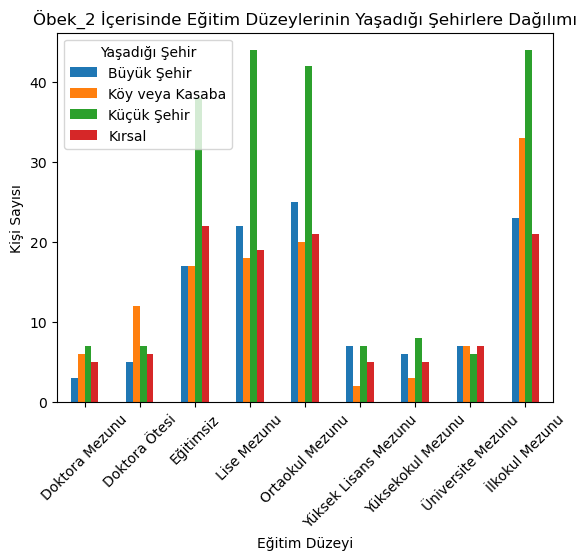

In [50]:
obek_2_education_city = obek_2_rows.groupby(['Eğitim Düzeyi', 'Yaşadığı Şehir'])['Öbek İsmi'].count().unstack()

plt.figure(figsize=(15, 10))
obek_2_education_city.plot(kind='bar')
plt.xlabel('Eğitim Düzeyi')
plt.ylabel('Kişi Sayısı')
plt.title('Öbek_2 İçerisinde Eğitim Düzeylerinin Yaşadığı Şehirlere Dağılımı')
plt.xticks(rotation=45)
plt.legend(title='Yaşadığı Şehir')
plt.show()

##### İlkokul, ortaokul, lise ve eğitimsizler hep küçük şehirlerde toplanmışlar.

### İstihdam Durumu (Grafik)

In [51]:
obek_2_istihdam = obek_2_rows['İstihdam Durumu'].value_counts()
obek_2_istihdam

İşsiz veya Düzenli Bir İşi Yok    417
Düzenli ve Ücretli Bir İşi Var     97
Kendi İşinin Sahibi                29
Emekli                              4
Name: İstihdam Durumu, dtype: int64

##### İşsiz olabilirler ama ev hanımıdırlar baro, evlilere ve okuyan öğrenci oranına bir bak..

<Figure size 1500x1000 with 0 Axes>

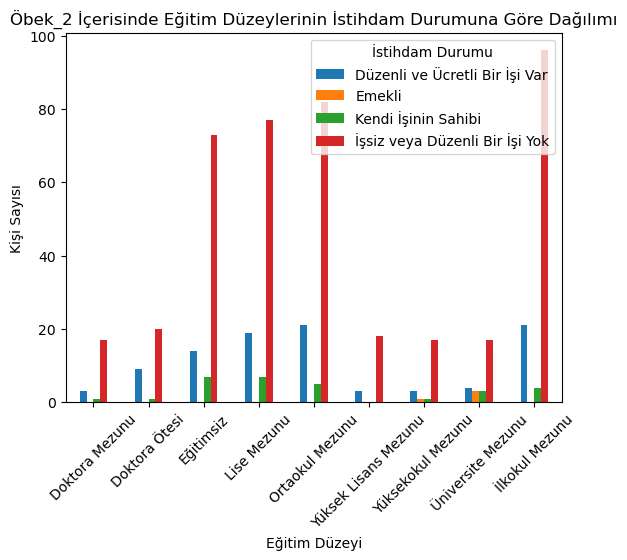

In [52]:
obek_2_education_employment = obek_2_rows.groupby(['Eğitim Düzeyi', 'İstihdam Durumu'])['Öbek İsmi'].count().unstack()

plt.figure(figsize=(15, 10))
obek_2_education_employment.plot(kind='bar')
plt.xlabel('Eğitim Düzeyi')
plt.ylabel('Kişi Sayısı')
plt.title('Öbek_2 İçerisinde Eğitim Düzeylerinin İstihdam Durumuna Göre Dağılımı')
plt.xticks(rotation=45)
plt.legend(title='İstihdam Durumu')
plt.show()

### Yıllık Ortalama Gelir

In [53]:
obek_2_yearly_income = obek_2_rows['Yıllık Ortalama Gelir']
overall_yearly_income = df_train['Yıllık Ortalama Gelir']

obek_2_avg_income = obek_2_yearly_income.mean()
overall_avg_income = overall_yearly_income.mean()

print("Öbek_2 Yıllık Ortalama Gelir Ortalaması:", obek_2_avg_income)
print("Tüm Veri Yıllık Ortalama Gelir Ortalaması:", overall_avg_income)

Öbek_2 Yıllık Ortalama Gelir Ortalaması: 172827.509911286
Tüm Veri Yıllık Ortalama Gelir Ortalaması: 363571.1334275545


##### 1. öbekten çok çok daha düşük bir maaş skalası.. Hepsi işsiz.. (Ev hanımı?)

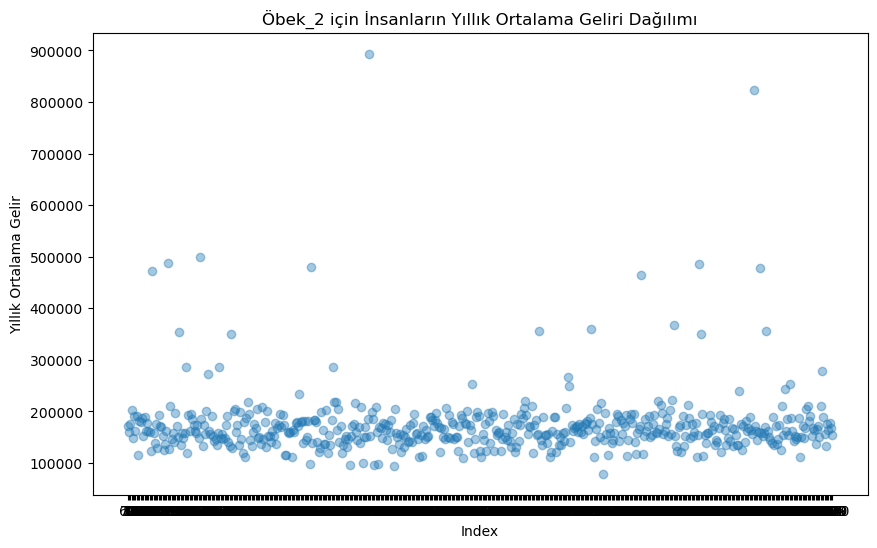

In [54]:
plt.figure(figsize=(10, 6))
plt.scatter(range(obek_2_rows.shape[0]), obek_2_rows['Yıllık Ortalama Gelir'], alpha=0.4)
plt.xlabel('Index')
plt.ylabel('Yıllık Ortalama Gelir')
plt.title('Öbek_2 için İnsanların Yıllık Ortalama Geliri Dağılımı')
plt.xticks(range(obek_2_rows.shape[0]), obek_2_rows.index)  # X ekseni indeks değerleri ile etiketlensin
plt.show()

##### Veriyi hakikaten bir kırpmak lazım baba..

### Yıllık ortalama gelir yaşadığı yere göre

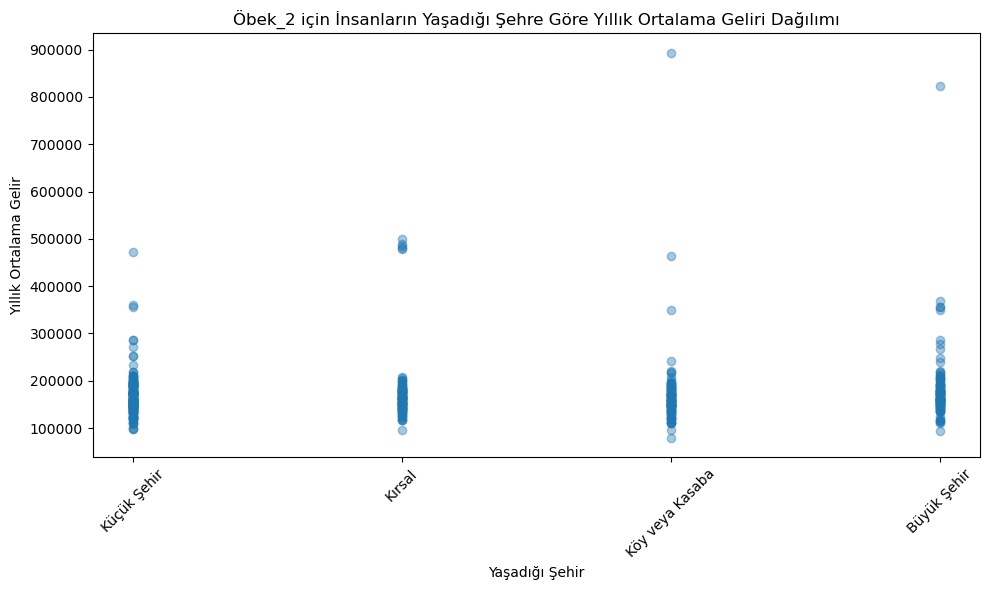

In [55]:
plt.figure(figsize=(10, 6))
plt.scatter(obek_2_rows['Yaşadığı Şehir'], obek_2_rows['Yıllık Ortalama Gelir'], alpha=0.4)
plt.xlabel('Yaşadığı Şehir')
plt.ylabel('Yıllık Ortalama Gelir')
plt.title('Öbek_2 için İnsanların Yaşadığı Şehre Göre Yıllık Ortalama Geliri Dağılımı')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Yaşadığı Şehir

In [56]:
obek_2_sehir = obek_2_rows['Yaşadığı Şehir'].value_counts()
obek_2_sehir

Küçük Şehir        203
Köy veya Kasaba    118
Büyük Şehir        115
Kırsal             111
Name: Yaşadığı Şehir, dtype: int64

In [57]:
# Peki diğer öbekteki insanlar nasıl şehirlerde yaşıyorlar?

df_train['Yaşadığı Şehir'].value_counts()

Büyük Şehir        1959
Küçük Şehir        1842
Köy veya Kasaba    1092
Kırsal              567
Name: Yaşadığı Şehir, dtype: int64

### En çok ilgilendiği ürün grubu

In [58]:
obek_2_urun = obek_2_rows['En Çok İlgilendiği Ürün Grubu'].value_counts()
obek_2_urun

#kozmetik riskli, neden az ki? gay tehlikesi.. Kesin ev hanımı baba.

Giyim                               221
Ev ve Mobilya                       211
Spor Malzemeleri                     45
Elektronik ve Teknolojik Ürünler     40
Kozmetik                             30
Name: En Çok İlgilendiği Ürün Grubu, dtype: int64

### Yıllık Ortalama Satın Alım Miktarı

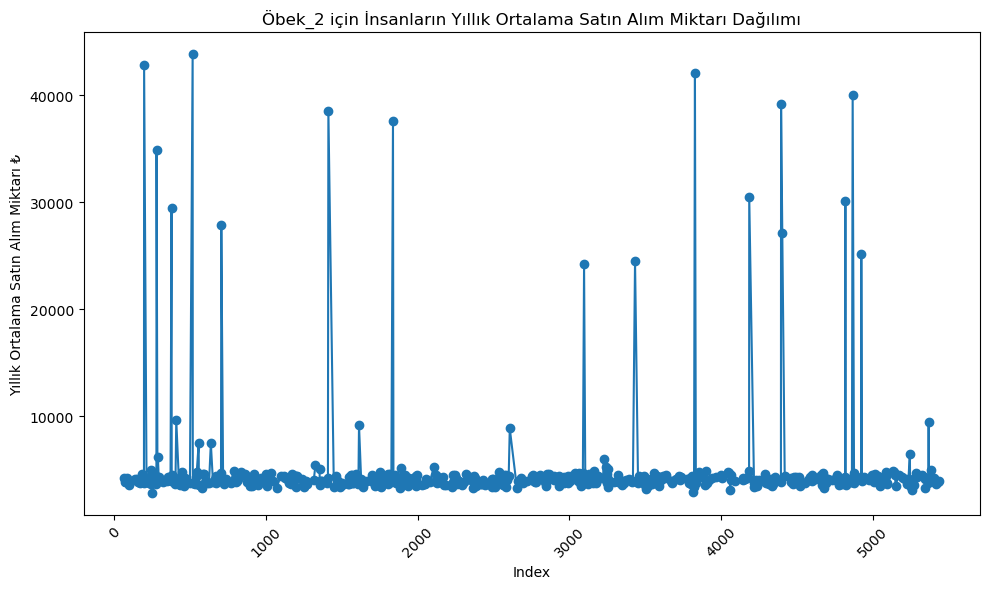

In [59]:
plt.figure(figsize=(10, 6))
plt.plot(obek_2_rows.index, obek_2_rows['Yıllık Ortalama Satın Alım Miktarı'], marker='o')
plt.xlabel('Index')
plt.ylabel('Yıllık Ortalama Satın Alım Miktarı ₺')
plt.title('Öbek_2 için İnsanların Yıllık Ortalama Satın Alım Miktarı Dağılımı')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Bu verideki satın alım miktarı da aykırı değerlerin oranını gösteriyor olabilir... 15-17 arası var genelde böyle gariplikler

### Yıllık Ortalama Sipariş Verilen Ürün Adedi

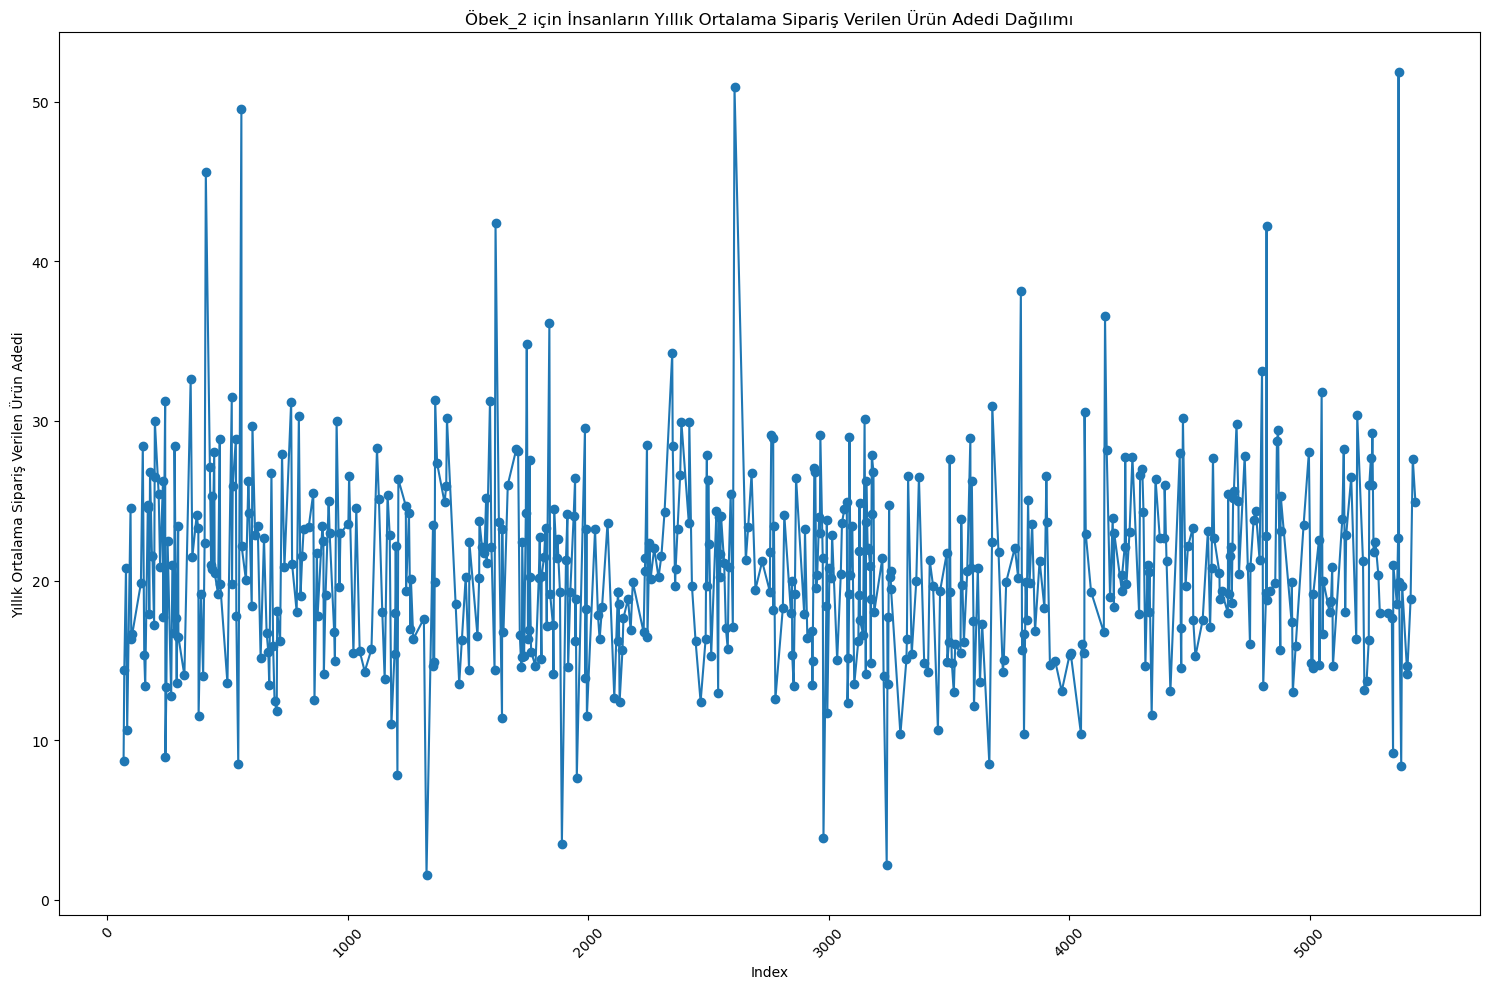

In [60]:
plt.figure(figsize=(15, 10))
plt.plot(obek_2_rows.index, obek_2_rows['Yıllık Ortalama Sipariş Verilen Ürün Adedi'], marker='o')
plt.xlabel('Index')
plt.ylabel('Yıllık Ortalama Sipariş Verilen Ürün Adedi')
plt.title('Öbek_2 için İnsanların Yıllık Ortalama Sipariş Verilen Ürün Adedi Dağılımı')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [61]:
rounded_avg_orders = obek_2_rows['Yıllık Ortalama Sipariş Verilen Ürün Adedi'].apply(round).value_counts().sort_values(ascending=False)
rounded_avg_orders

20    45
23    39
15    39
19    38
21    38
18    36
22    33
16    32
24    29
17    27
25    25
28    23
14    21
26    18
13    16
27    15
30    12
29    10
12    10
31     7
11     5
9      4
8      4
10     3
33     2
2      2
42     2
51     1
32     1
37     1
38     1
4      1
35     1
34     1
3      1
36     1
50     1
46     1
52     1
Name: Yıllık Ortalama Sipariş Verilen Ürün Adedi, dtype: int64

##### 15 ile 30 arası sipariş veren sayısı bu öbeğin lideridir diyebiliriz.. 

In [62]:
# KARŞILAŞTIRMAN İÇİN TÜM VERİ SETİNDEKİ ORTALAMA

rounded_avg_orders_all = df_train['Yıllık Ortalama Sipariş Verilen Ürün Adedi'].apply(round).value_counts().sort_values(ascending=False)
rounded_avg_orders_all.head(10)

15    296
10    283
16    218
11    211
20    202
14    196
9     182
19    166
21    166
30    166
Name: Yıllık Ortalama Sipariş Verilen Ürün Adedi, dtype: int64

### Eğitime Devam Etme Durumu

In [63]:
obek_2_egitim_devam_durumu = obek_2_rows['Eğitime Devam Etme Durumu'].value_counts()
obek_2_egitim_devam_durumu

0    526
1     21
Name: Eğitime Devam Etme Durumu, dtype: int64

##### OOOoooo... Üstteki hipotezimiz çürüdü... Eğitime devam etmiyorlar... Yani çoğu ev hanımı olabilir... ki evlilik oranı 424-123.... Evet bu insanlar büyük şehir olmayan alanlarda yaşayan ev hanımı grubu.. Net bir şekilde.....

In [64]:
# Genelde insanlar okuyor mu peki daha doğrusu hali hazırda gördükleri bir eğitim var mı?

df_train['Eğitime Devam Etme Durumu'].value_counts()

# Cevap hayırdı hatırlayacağın üzere..

0    4554
1     906
Name: Eğitime Devam Etme Durumu, dtype: int64

### Yıllık Ortalama Sepete Atılan Ürün Adedi

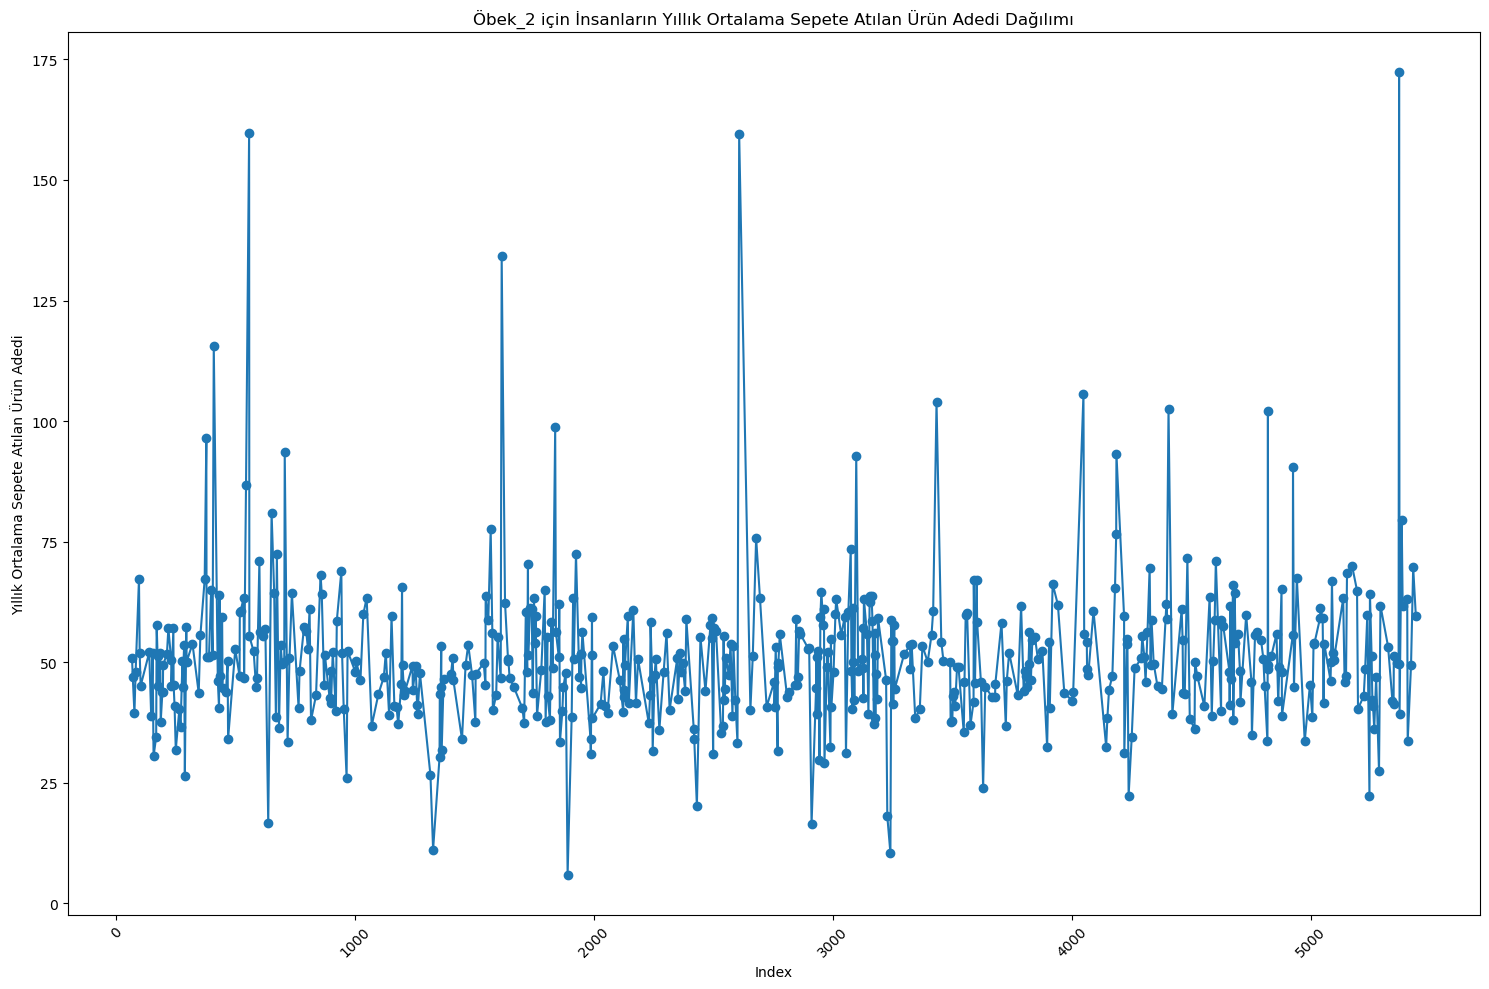

In [65]:
plt.figure(figsize=(15, 10))
plt.plot(obek_2_rows.index, obek_2_rows['Yıllık Ortalama Sepete Atılan Ürün Adedi'], marker='o')
plt.xlabel('Index')
plt.ylabel('Yıllık Ortalama Sepete Atılan Ürün Adedi')
plt.title('Öbek_2 için İnsanların Yıllık Ortalama Sepete Atılan Ürün Adedi Dağılımı')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [66]:
rounded_avg_items = obek_2_rows['Yıllık Ortalama Sepete Atılan Ürün Adedi'].apply(round).value_counts().sort_values(ascending=False)
rounded_avg_items.head(20)

51    26
56    24
45    24
50    23
59    22
47    21
49    21
52    21
48    21
44    20
41    18
54    17
42    16
43    16
39    16
46    16
55    15
40    14
38    12
61    12
Name: Yıllık Ortalama Sepete Atılan Ürün Adedi, dtype: int64

##### Çok rahatlık ile bu kadınların yılda 40-60 ürünü sepete eklediğini söyleyebiliriz.. Genel ortalamada bu oran dengeli değil pek....

In [67]:
yillik_ortalama_sepete_eklenen_urun_genel = df_train['Yıllık Ortalama Sepete Atılan Ürün Adedi'].apply(round).value_counts().sort_values(ascending=False)
yillik_ortalama_sepete_eklenen_urun_genel.head(15)

10     154
9      131
11     122
19      97
20      96
95      94
101     90
102     90
100     88
96      84
18      84
104     84
97      83
51      82
99      80
Name: Yıllık Ortalama Sepete Atılan Ürün Adedi, dtype: int64

# obek_3

### Cinsiyet

In [68]:
obek_3_rows = df_train[df_train['Öbek İsmi'] == 'obek_3']
obek_3_gender_counts = obek_3_rows['Cinsiyet'].value_counts()
obek_3_gender_counts

1    626
0     69
Name: Cinsiyet, dtype: int64

#### Kadınların hangi yaşta olduğunu merak ettim...

In [69]:
obek_3_women_age = df_train[(df_train['Öbek İsmi'] == 'obek_3') & (df_train['Cinsiyet'] == 0)]['Yaş Grubu'].value_counts()
obek_3_women_age

41-50    19
51-60    15
31-40    14
>60      13
18-30     8
Name: Yaş Grubu, dtype: int64

##### Kadınlar da yaşlı... Hmmm.. Aklıma ilk gelen emekli olanlar belki bu hanımlar da eşleridir..

### Yaş Grubu

In [70]:
obek_3_age = obek_3_rows['Yaş Grubu'].value_counts()
obek_3_age

51-60    153
31-40    148
18-30    134
>60      130
41-50    130
Name: Yaş Grubu, dtype: int64

##### Bu grupta orta yaş üzeri insan çok fazla var.. Hm.....

### Medeni Durum

In [71]:
obek_3_medeni_durum = obek_3_rows['Medeni Durum'].value_counts()
obek_3_medeni_durum

1    562
0    133
Name: Medeni Durum, dtype: int64

In [72]:
# BEKAR OLANLARIN YAŞLARI KAÇ?

obek_3_single_age = df_train[(df_train['Öbek İsmi'] == 'obek_3') & (df_train['Medeni Durum'] == 0)]['Yaş Grubu'].value_counts()
obek_3_single_age

31-40    32
51-60    29
41-50    29
18-30    23
>60      20
Name: Yaş Grubu, dtype: int64

In [73]:
# PEKİ BEKAR OLANLARIN CİNSİYETİ NEDİR?

obek_3_single_gender = df_train[(df_train['Öbek İsmi'] == 'obek_3') & (df_train['Medeni Durum'] == 0)]['Cinsiyet'].value_counts()
obek_3_single_gender

1    123
0     10
Name: Cinsiyet, dtype: int64

##### Bekar olanlar da %80 oranında orta yaş üstü ve %95 oranında erkek... O zaman o 10 tane kadının veride olmaması gerekiyor olabilir mi?

#### Son oolarak medeni durumun yaş gruplarına göre dağılımına da bakalım mı?

In [74]:
obek_3_marital_age = obek_3_rows.groupby(['Medeni Durum', 'Yaş Grubu'])['Yaş Grubu'].count().unstack()
obek_3_marital_age

Yaş Grubu     18-30  31-40  41-50  51-60  >60
Medeni Durum                                 
0                23     32     29     29   20
1               111    116    101    124  110

##### Eşit dağılmış evliler... Ama çoğunluğu yaşlı oluyor yine de

### Eğitim Düzeyi

In [75]:
obek_3_egitim = obek_3_rows['Eğitim Düzeyi'].value_counts()
obek_3_egitim

Lise Mezunu             361
Yüksekokul Mezunu        81
Eğitimsiz                64
İlkokul Mezunu           60
Ortaokul Mezunu          59
Üniversite Mezunu        38
Yüksek Lisans Mezunu     21
Doktora Mezunu            7
Doktora Ötesi             4
Name: Eğitim Düzeyi, dtype: int64

##### Herkesin eğitimi var sayılır Maşallah...

In [76]:
# Genel insanlar ne durumdaydı eğitimde?

df_train['Eğitim Düzeyi'].value_counts()

Lise Mezunu             1388
Üniversite Mezunu       1257
Yüksekokul Mezunu        588
Yüksek Lisans Mezunu     545
İlkokul Mezunu           417
Ortaokul Mezunu          412
Eğitimsiz                381
Doktora Mezunu           263
Doktora Ötesi            209
Name: Eğitim Düzeyi, dtype: int64

### Eğitim Düzeyinin Yaş Gruplarına Oranı ve Grafiği

In [77]:
obek_3_education_age = obek_3_rows.groupby(['Eğitim Düzeyi', 'Yaş Grubu'])['Öbek İsmi'].count().unstack()
obek_3_education_age

Yaş Grubu             18-30  31-40  41-50  51-60   >60
Eğitim Düzeyi                                         
Doktora Mezunu          NaN    1.0    2.0    2.0   2.0
Doktora Ötesi           NaN    1.0    NaN    NaN   3.0
Eğitimsiz              12.0   19.0   11.0   14.0   8.0
Lise Mezunu            77.0   69.0   71.0   78.0  66.0
Ortaokul Mezunu        14.0   13.0   10.0   12.0  10.0
Yüksek Lisans Mezunu    5.0    4.0    5.0    5.0   2.0
Yüksekokul Mezunu      15.0   18.0   14.0   16.0  18.0
Üniversite Mezunu       5.0    7.0    5.0   15.0   6.0
İlkokul Mezunu          6.0   16.0   12.0   11.0  15.0

<Figure size 1000x600 with 0 Axes>

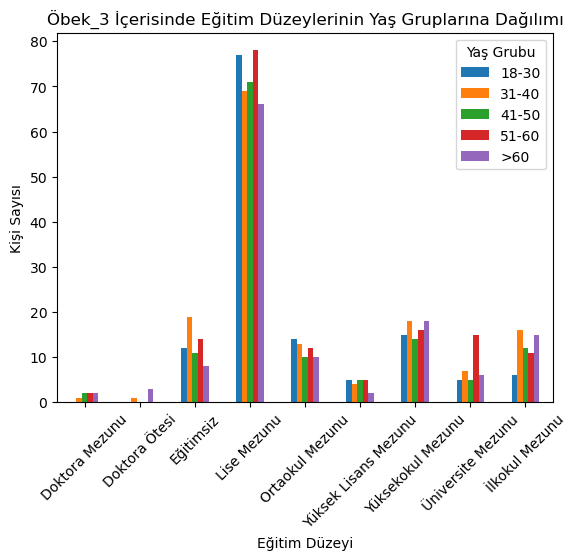

In [78]:
plt.figure(figsize=(10, 6))
obek_3_education_age.plot(kind='bar')
plt.xlabel('Eğitim Düzeyi')
plt.ylabel('Kişi Sayısı')
plt.title('Öbek_3 İçerisinde Eğitim Düzeylerinin Yaş Gruplarına Dağılımı')
plt.xticks(rotation=45)
plt.legend(title='Yaş Grubu')
plt.show()

# 18-30 yaş arasında doktora mezunu biri olmak zorunda mı :D

### İstihdam Düzeyi

In [79]:
obek_3_istihdam = obek_3_rows['İstihdam Durumu'].value_counts()
obek_3_istihdam

Düzenli ve Ücretli Bir İşi Var    281
Kendi İşinin Sahibi               225
İşsiz veya Düzenli Bir İşi Yok    124
Emekli                             65
Name: İstihdam Durumu, dtype: int64

##### İşsiz olan oranın %25'i gibi... bişey

<Figure size 1000x600 with 0 Axes>

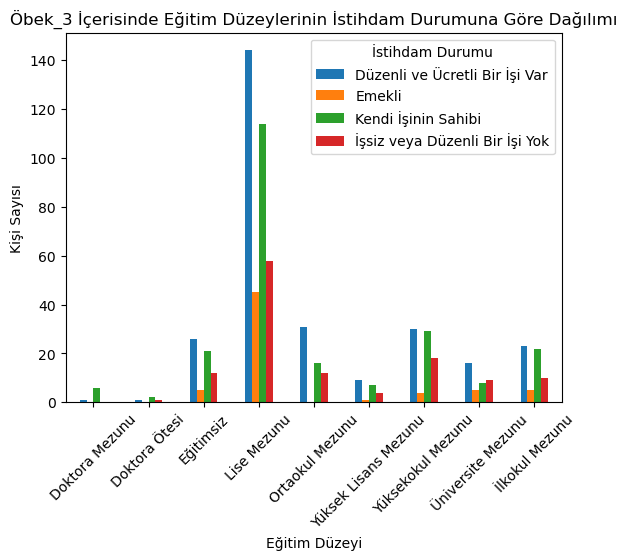

In [80]:
obek_3_education_employment = obek_3_rows.groupby(['Eğitim Düzeyi', 'İstihdam Durumu'])['Öbek İsmi'].count().unstack()

plt.figure(figsize=(10, 6))
obek_3_education_employment.plot(kind='bar')
plt.xlabel('Eğitim Düzeyi')
plt.ylabel('Kişi Sayısı')
plt.title('Öbek_3 İçerisinde Eğitim Düzeylerinin İstihdam Durumuna Göre Dağılımı')
plt.xticks(rotation=45)
plt.legend(title='İstihdam Durumu')
plt.show()

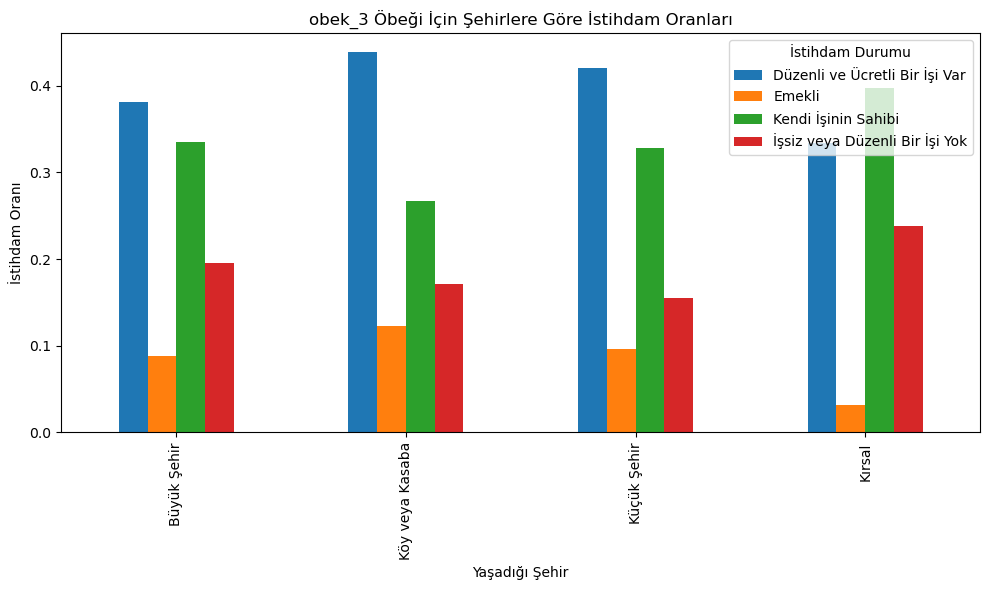

In [81]:
# ŞEHİRLERE GÖRE İSTİHDAM GRAFİĞİ

obek_3_employment_by_city = df_train[df_train['Öbek İsmi'] == 'obek_3'].groupby('Yaşadığı Şehir')['İstihdam Durumu'].value_counts(normalize=True).unstack()
obek_3_employment_by_city.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Yaşadığı Şehir')
plt.ylabel('İstihdam Oranı')
plt.title('obek_3 Öbeği İçin Şehirlere Göre İstihdam Oranları')
plt.legend(title='İstihdam Durumu')
plt.tight_layout()
plt.show()

### Yıllık ortalama gelir

In [82]:
obek_3_yearly_income = obek_3_rows['Yıllık Ortalama Gelir']
overall_yearly_income = df_train['Yıllık Ortalama Gelir']

obek_3_avg_income = obek_3_yearly_income.mean()
overall_avg_income = overall_yearly_income.mean()

print("Öbek_3 Yıllık Ortalama Gelir Ortalaması:", obek_3_avg_income)
print("Tüm Veri Yıllık Ortalama Gelir Ortalaması:", overall_avg_income)


Öbek_3 Yıllık Ortalama Gelir Ortalaması: 327899.09445838985
Tüm Veri Yıllık Ortalama Gelir Ortalaması: 363571.1334275545


##### Ortalamanın altında olmasına rağmen, çok da aşağıda değil.....

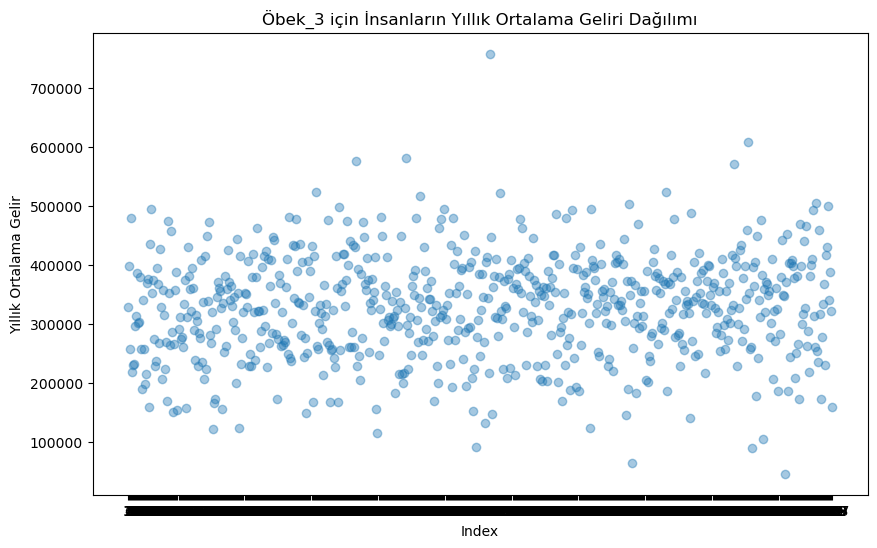

In [83]:
plt.figure(figsize=(10, 6))
plt.scatter(range(obek_3_rows.shape[0]), obek_3_rows['Yıllık Ortalama Gelir'], alpha=0.4)
plt.xlabel('Index')
plt.ylabel('Yıllık Ortalama Gelir')
plt.title('Öbek_3 için İnsanların Yıllık Ortalama Geliri Dağılımı')
plt.xticks(range(obek_3_rows.shape[0]), obek_3_rows.index)  # X ekseni indeks değerleri ile etiketlensin
plt.show()

# 1-2 tane gelir fazlası insan var diye düşünüyorum....

### Yaşadığı yere göre yıllık geliri

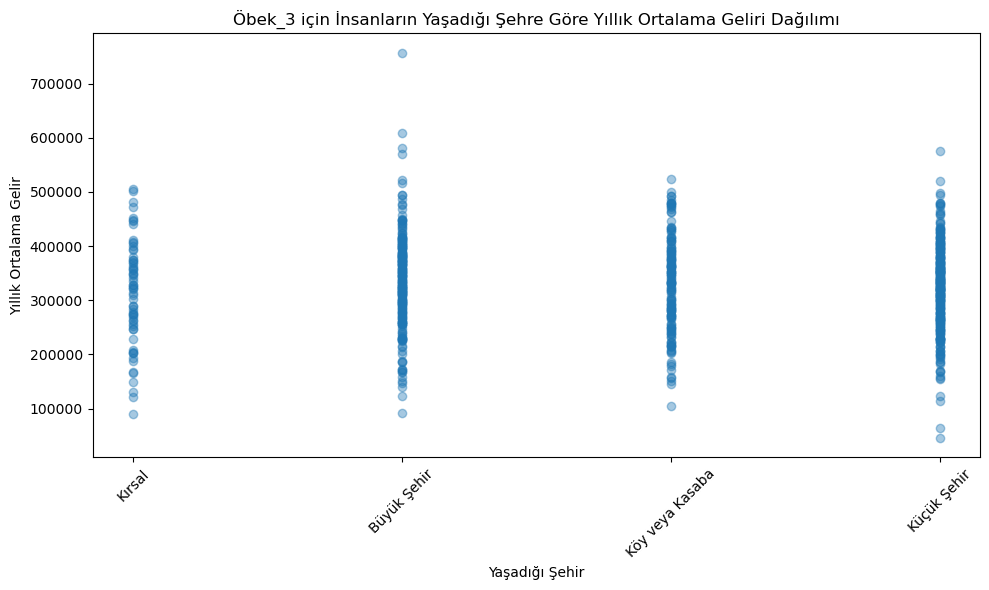

In [84]:
plt.figure(figsize=(10, 6))
plt.scatter(obek_3_rows['Yaşadığı Şehir'], obek_3_rows['Yıllık Ortalama Gelir'], alpha=0.4)
plt.xlabel('Yaşadığı Şehir')
plt.ylabel('Yıllık Ortalama Gelir')
plt.title('Öbek_3 için İnsanların Yaşadığı Şehre Göre Yıllık Ortalama Geliri Dağılımı')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Yaşadığı Şehir

In [85]:
obek_3_sehir = obek_3_rows['Yaşadığı Şehir'].value_counts()
obek_3_sehir

Küçük Şehir        271
Büyük Şehir        215
Köy veya Kasaba    146
Kırsal              63
Name: Yaşadığı Şehir, dtype: int64

In [86]:
# Peki diğer öbekteki insanlar nasıl şehirlerde yaşıyorlar?

df_train['Yaşadığı Şehir'].value_counts()

Büyük Şehir        1959
Küçük Şehir        1842
Köy veya Kasaba    1092
Kırsal              567
Name: Yaşadığı Şehir, dtype: int64

### En çok ilgilendiği ürün grubu

In [87]:
obek_3_urun = obek_3_rows['En Çok İlgilendiği Ürün Grubu'].value_counts()
obek_3_urun

Spor Malzemeleri                    205
Elektronik ve Teknolojik Ürünler    202
Ev ve Mobilya                       149
Giyim                               136
Kozmetik                              3
Name: En Çok İlgilendiği Ürün Grubu, dtype: int64

##### Gerçekten errrrrrrrrkek grubu olduğu belli

### Yıllık ortalama satın alım miktarı

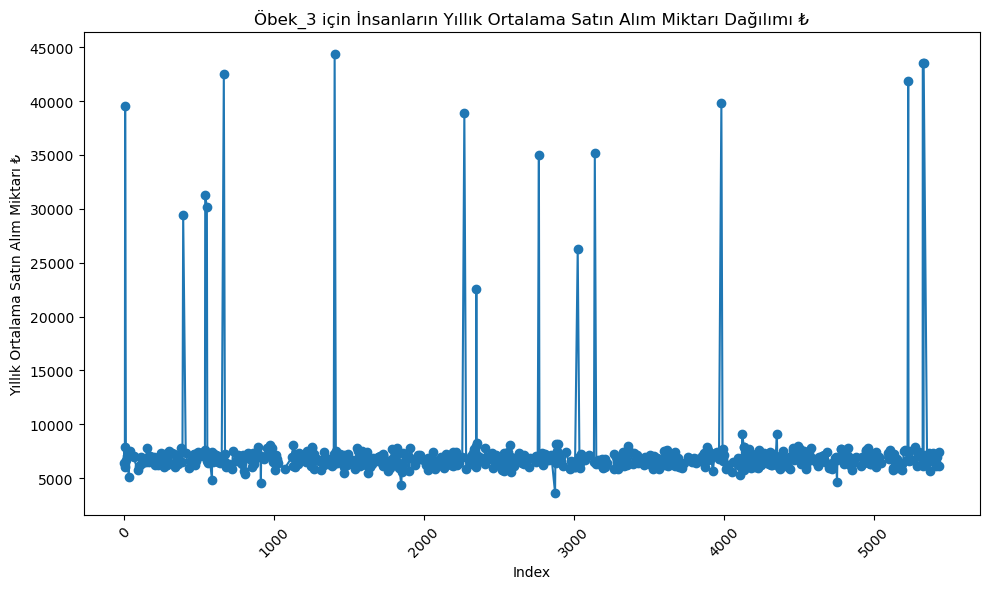

In [88]:
plt.figure(figsize=(10, 6))
plt.plot(obek_3_rows.index, obek_3_rows['Yıllık Ortalama Satın Alım Miktarı'], marker='o')
plt.xlabel('Index')
plt.ylabel('Yıllık Ortalama Satın Alım Miktarı ₺')
plt.title('Öbek_3 için İnsanların Yıllık Ortalama Satın Alım Miktarı Dağılımı ₺')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Her zamanki gibi yine bu değerler outlier olabilir.

### Yıllık ortalama sipariş verilen ürün adedi

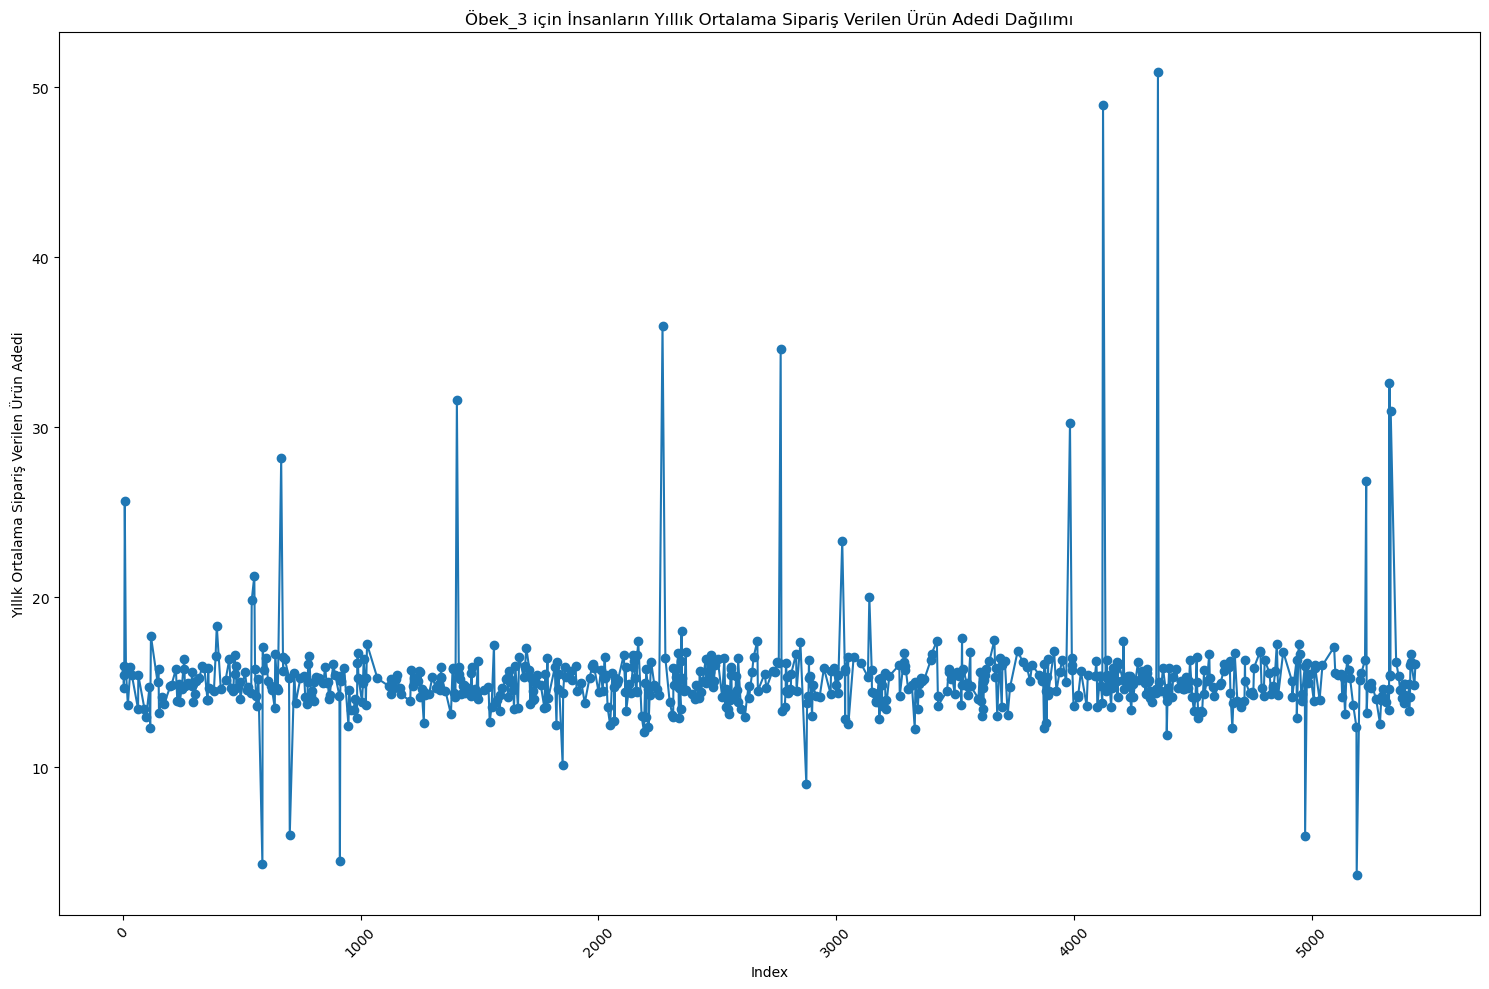

In [89]:
plt.figure(figsize=(15, 10))
plt.plot(obek_3_rows.index, obek_3_rows['Yıllık Ortalama Sipariş Verilen Ürün Adedi'], marker='o')
plt.xlabel('Index')
plt.ylabel('Yıllık Ortalama Sipariş Verilen Ürün Adedi')
plt.title('Öbek_3 için İnsanların Yıllık Ortalama Sipariş Verilen Ürün Adedi Dağılımı')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [90]:
rounded_avg_orders = obek_3_rows['Yıllık Ortalama Sipariş Verilen Ürün Adedi'].apply(round).value_counts().sort_values(ascending=False)
rounded_avg_orders

15    244
14    165
16    159
13     50
17     41
12     10
18      4
4       3
20      2
6       2
33      1
27      1
9       1
51      1
49      1
30      1
23      1
26      1
35      1
36      1
10      1
32      1
28      1
21      1
31      1
Name: Yıllık Ortalama Sipariş Verilen Ürün Adedi, dtype: int64

##### Hmmm.. Pek de fazla bir şey almıyorlar...? Ne kadar harcıyorlardı? Hesapları kontrol edilsin. Gerçi genel ortalama gibi alıyorlar. 10-20 arası

In [91]:
# KARŞILAŞTIRMAN İÇİN TÜM VERİ SETİNDEKİ ORTALAMA

rounded_avg_orders_all = df_train['Yıllık Ortalama Sipariş Verilen Ürün Adedi'].apply(round).value_counts().sort_values(ascending=False)
rounded_avg_orders_all.head(10)

15    296
10    283
16    218
11    211
20    202
14    196
9     182
19    166
21    166
30    166
Name: Yıllık Ortalama Sipariş Verilen Ürün Adedi, dtype: int64

### Eğitime devam etme durumu

In [92]:
obek_3_egitim_devam_durumu = obek_3_rows['Eğitime Devam Etme Durumu'].value_counts()
obek_3_egitim_devam_durumu

0    663
1     32
Name: Eğitime Devam Etme Durumu, dtype: int64

##### Yani... Orta yaş üstü erkekler devam etmemesi normal...

In [93]:
# Genelde insanlar okuyor muydu peki daha doğrusu hali hazırda gördükleri bir eğitim var mıydı?

df_train['Eğitime Devam Etme Durumu'].value_counts()

0    4554
1     906
Name: Eğitime Devam Etme Durumu, dtype: int64

### Yıllık ortalama sepete atılan ürün adedi

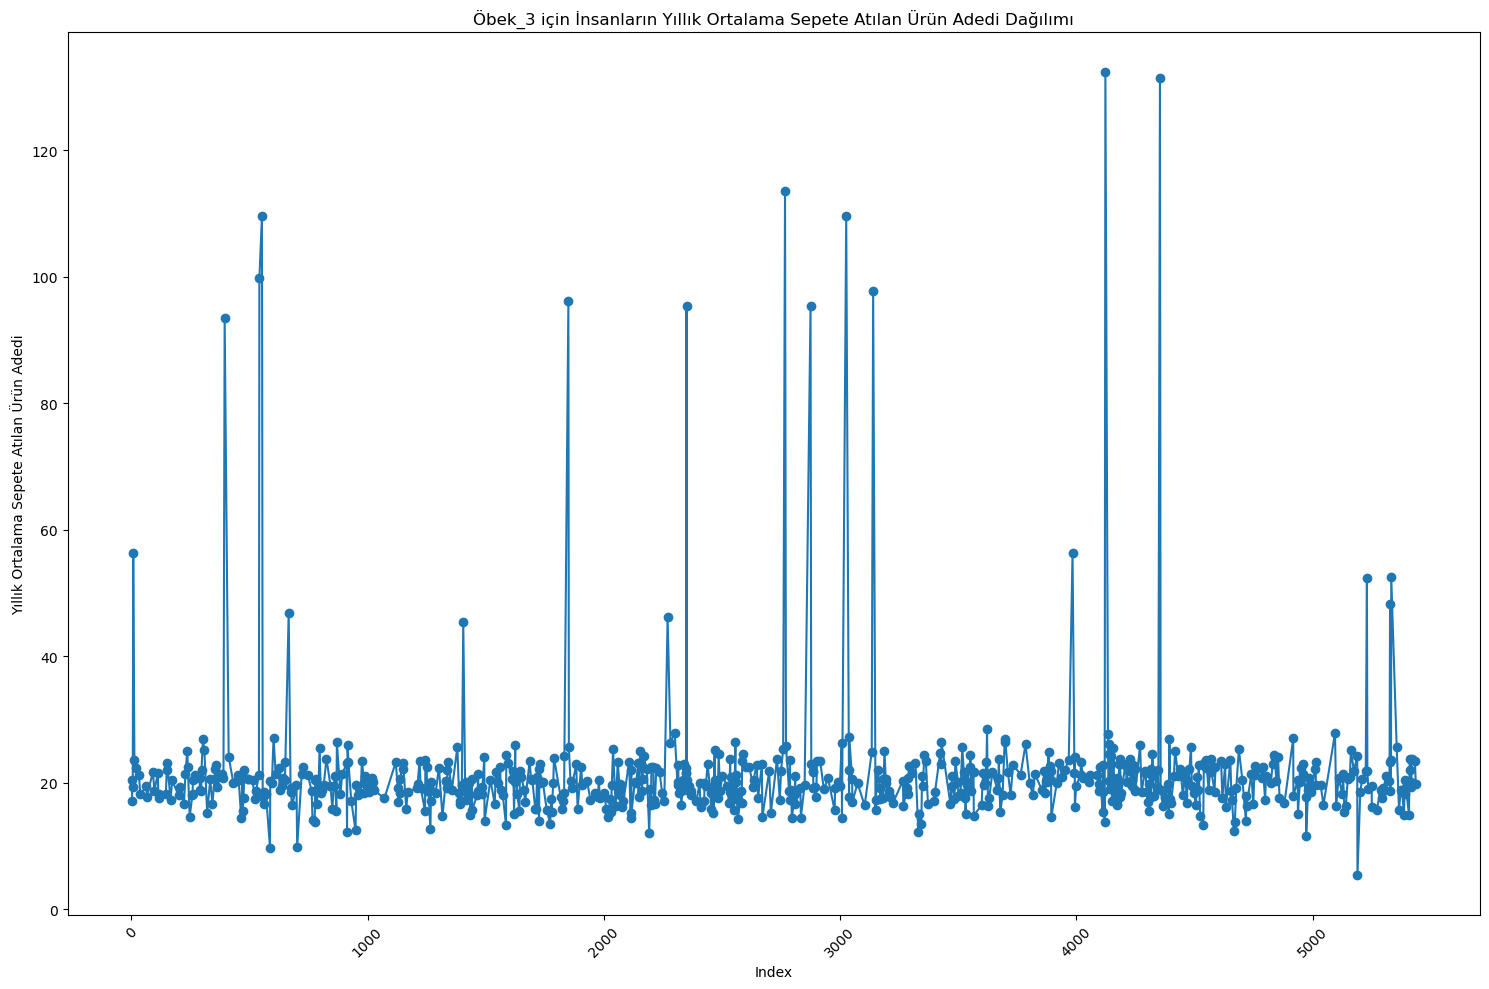

In [94]:
plt.figure(figsize=(15, 10))
plt.plot(obek_3_rows.index, obek_3_rows['Yıllık Ortalama Sepete Atılan Ürün Adedi'], marker='o')
plt.xlabel('Index')
plt.ylabel('Yıllık Ortalama Sepete Atılan Ürün Adedi')
plt.title('Öbek_3 için İnsanların Yıllık Ortalama Sepete Atılan Ürün Adedi Dağılımı')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [95]:
rounded_avg_items = obek_3_rows['Yıllık Ortalama Sepete Atılan Ürün Adedi'].apply(round).value_counts().sort_values(ascending=False)
rounded_avg_items.head(15)

19    95
20    89
18    78
21    73
22    66
23    57
17    53
16    37
24    33
15    22
26    19
14    17
25    14
27     6
12     6
Name: Yıllık Ortalama Sepete Atılan Ürün Adedi, dtype: int64

##### Atıp birkaç ürünü siliyorlar genelde.. Tercihlerinden fazla taviz vermiyorlar, beğendim.

In [96]:
yillik_ortalama_sepete_eklenen_urun_genel = df_train['Yıllık Ortalama Sepete Atılan Ürün Adedi'].apply(round).value_counts().sort_values(ascending=False)
yillik_ortalama_sepete_eklenen_urun_genel.head(15)
# Bununla karşılaştırmak bana bir şey ifade etmiyor şuan.. Ama obek_3 içerisinde tutarlı üstteki kod..

10     154
9      131
11     122
19      97
20      96
95      94
101     90
102     90
100     88
96      84
18      84
104     84
97      83
51      82
99      80
Name: Yıllık Ortalama Sepete Atılan Ürün Adedi, dtype: int64

# obek_4

### Cinsiyet

In [97]:
obek_4_rows = df_train[df_train['Öbek İsmi'] == 'obek_4']
obek_4_gender_counts = obek_4_rows['Cinsiyet'].value_counts()
obek_4_gender_counts

1    368
0    352
Name: Cinsiyet, dtype: int64

##### Hmm.. Dengeli dağılım.. Bu sefer cinsiyetçi bir ayrımla karşılaşmayacağız..

### Yaş grubu

In [98]:
obek_4_age = obek_4_rows['Yaş Grubu'].value_counts()
obek_4_age

31-40    412
18-30    292
51-60      9
41-50      5
>60        2
Name: Yaş Grubu, dtype: int64

##### Hmmmm.... Şimdi taşlar yerine oturdu bu grupta... 40 yaş altı gençlerden oluşan bir grup... Bu arada aykırı değer varsa nereden geleceği belli oldu.. Kategorilere de ayırmak lazım, farklılıkları hangi kategoride yakaladık tarzı.

### Medeni Durum

In [99]:
obek_4_medeni_durum = obek_4_rows['Medeni Durum'].value_counts()
obek_4_medeni_durum

0    556
1    164
Name: Medeni Durum, dtype: int64

##### Tahmin edilebilir olarak çoğu bekar durumda... Peki evliler hangi yaşta?

In [100]:
obek_4_marital_age = obek_4_rows.groupby(['Medeni Durum', 'Yaş Grubu'])['Yaş Grubu'].count().unstack()
obek_4_marital_age

Yaş Grubu     18-30  31-40  41-50  51-60  >60
Medeni Durum                                 
0               223    328      1      3    1
1                69     84      4      6    1

##### Yaşlılar oransal olarak daha fazla evli.. Ama yine de çoğunluk oluşturacak kadar fazla değiller.

### Eğitim Düzeyi

In [101]:
obek_4_egitim = obek_4_rows['Eğitim Düzeyi'].value_counts()
obek_4_egitim

Üniversite Mezunu       280
Yüksek Lisans Mezunu    125
Yüksekokul Mezunu       106
Doktora Mezunu           72
Doktora Ötesi            46
Lise Mezunu              29
İlkokul Mezunu           24
Ortaokul Mezunu          22
Eğitimsiz                16
Name: Eğitim Düzeyi, dtype: int64

##### Vaooww... Herkesin okuduğu en kültürlü ekip burada... Ancak merak ettiğim bir soru daha var.. Bu insanlar eğitime devam ediyor mu? Demek istediğim, öğrenciler mi yoksa okuyup bitirdiler mi? Aşağıda göreceğiz..

In [102]:
# Genel insanlar ne durumdaydı eğitimde?

df_train['Eğitim Düzeyi'].value_counts()

# Bu gruba helal olsun. Ailelerine de tabii :)

Lise Mezunu             1388
Üniversite Mezunu       1257
Yüksekokul Mezunu        588
Yüksek Lisans Mezunu     545
İlkokul Mezunu           417
Ortaokul Mezunu          412
Eğitimsiz                381
Doktora Mezunu           263
Doktora Ötesi            209
Name: Eğitim Düzeyi, dtype: int64

In [103]:
# 16 eğitim almamış insan, acaba nereden onu merak etmedim değil..... 

obek_4_education_age = obek_4_rows.groupby(['Eğitim Düzeyi', 'Yaş Grubu'])['Öbek İsmi'].count().unstack()
obek_4_education_age

Yaş Grubu             18-30  31-40  41-50  51-60  >60
Eğitim Düzeyi                                        
Doktora Mezunu         19.0   53.0    NaN    NaN  NaN
Doktora Ötesi          16.0   28.0    NaN    2.0  NaN
Eğitimsiz               7.0    8.0    NaN    1.0  NaN
Lise Mezunu            11.0   14.0    2.0    1.0  1.0
Ortaokul Mezunu        11.0   11.0    NaN    NaN  NaN
Yüksek Lisans Mezunu   56.0   67.0    1.0    NaN  1.0
Yüksekokul Mezunu      50.0   55.0    NaN    1.0  NaN
Üniversite Mezunu     111.0  163.0    2.0    4.0  NaN
İlkokul Mezunu         11.0   13.0    NaN    NaN  NaN

##### Hmm.. yine de gençlerdenmiş

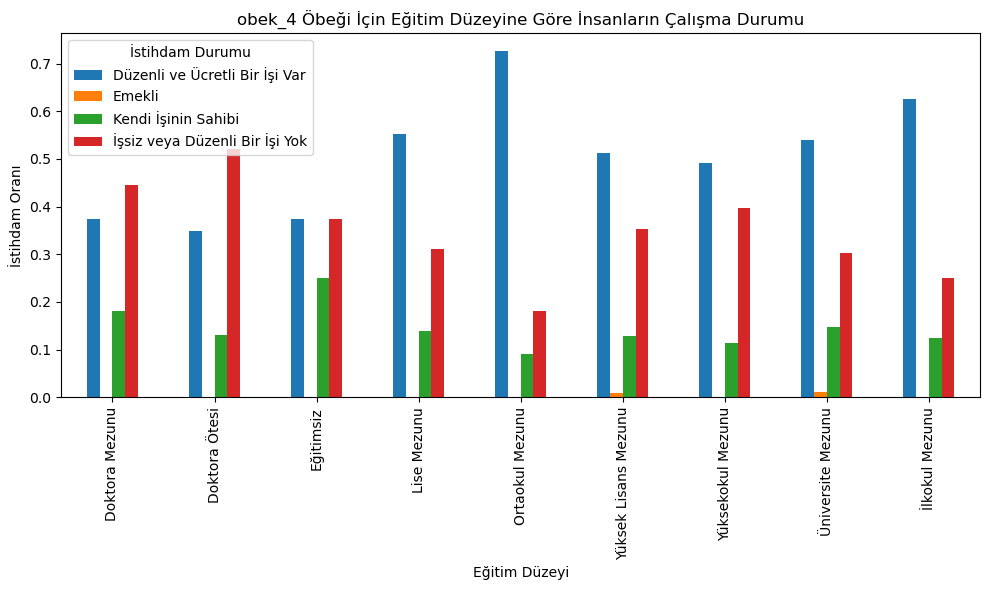

In [104]:
# Peki eğitim almamış olanlar, bir yerde çalışıyor mu?

obek_4_education_and_employment = df_train[df_train['Öbek İsmi'] == 'obek_4'].groupby('Eğitim Düzeyi')['İstihdam Durumu'].value_counts(normalize=True).unstack()
obek_4_education_and_employment.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Eğitim Düzeyi')
plt.ylabel('İstihdam Oranı')
plt.title('obek_4 Öbeği İçin Eğitim Düzeyine Göre İnsanların Çalışma Durumu')
plt.legend(title='İstihdam Durumu')
plt.tight_layout()
plt.show()

##### Eğitimsiz insanların da %70-80 ' lik oranla çalıştığını söyleyebiliriz.. Ev hanımı olanlar da olabilir. Bu detayı unutma, herkes erkek değil grupta.

### İstihdam Durumu

In [105]:
obek_4_istihdam = obek_4_rows['İstihdam Durumu'].value_counts()
obek_4_istihdam

Düzenli ve Ücretli Bir İşi Var    363
İşsiz veya Düzenli Bir İşi Yok    252
Kendi İşinin Sahibi               101
Emekli                              4
Name: İstihdam Durumu, dtype: int64

##### %66 lık oranın çalıştığını söyleyebiliriz...

#### İstihdam oranının cinsiyete göre dağılımı nedir diye sorsam peki?

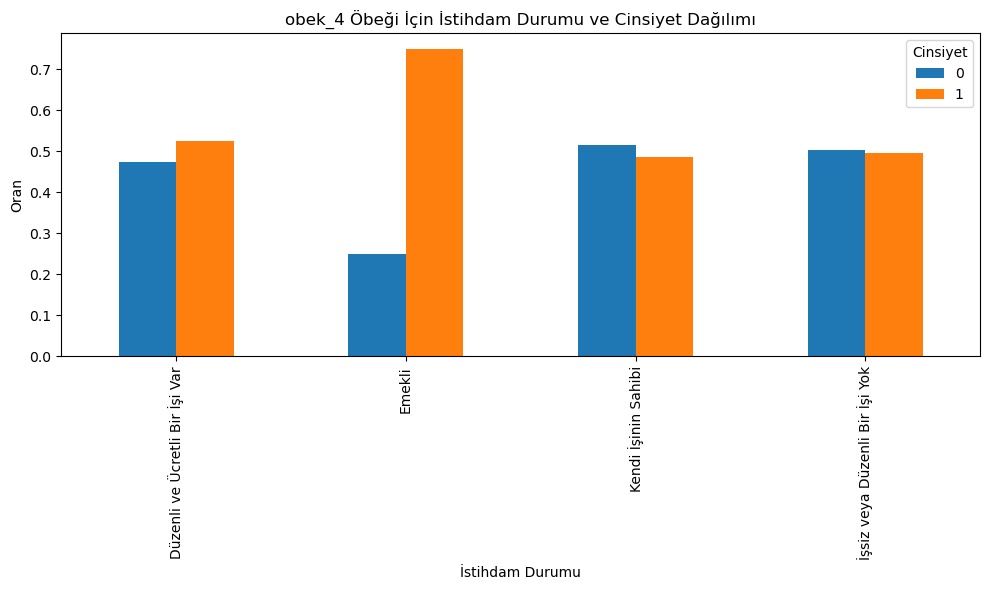

In [106]:
obek_4_employment_by_gender = df_train[df_train['Öbek İsmi'] == 'obek_4'].groupby('İstihdam Durumu')['Cinsiyet'].value_counts(normalize=True).unstack()
obek_4_employment_by_gender.plot(kind='bar', figsize=(10, 6))
plt.xlabel('İstihdam Durumu')
plt.ylabel('Oran')
plt.title('obek_4 Öbeği İçin İstihdam Durumu ve Cinsiyet Dağılımı')
plt.legend(title='Cinsiyet')
plt.tight_layout()
plt.show()

# HATIRLATMA....
# Düzenli ve Ücretli Bir İşi Var    363
# İşsiz veya Düzenli Bir İşi Yok    252  (yani çalışmayan 125 erkek var diyebiliriz..)
# Kendi İşinin Sahibi               101
# Emekli                              4

### Yıllık Ortalama Gelir

In [107]:
obek_4_yearly_income = obek_4_rows['Yıllık Ortalama Gelir']
overall_yearly_income = df_train['Yıllık Ortalama Gelir']

obek_4_avg_income = obek_4_yearly_income.mean()
overall_avg_income = overall_yearly_income.mean()

print("Öbek_4 Yıllık Ortalama Gelir Ortalaması:", obek_4_avg_income)
print("Tüm Veri Yıllık Ortalama Gelir Ortalaması:", overall_avg_income)

Öbek_4 Yıllık Ortalama Gelir Ortalaması: 817975.5163117519
Tüm Veri Yıllık Ortalama Gelir Ortalaması: 363571.1334275545


##### :O... Vaow. Ortalamanın 2 katından fazla gelire sahipler... obek_4 = Zengin tayfa diyebilir miyiz?

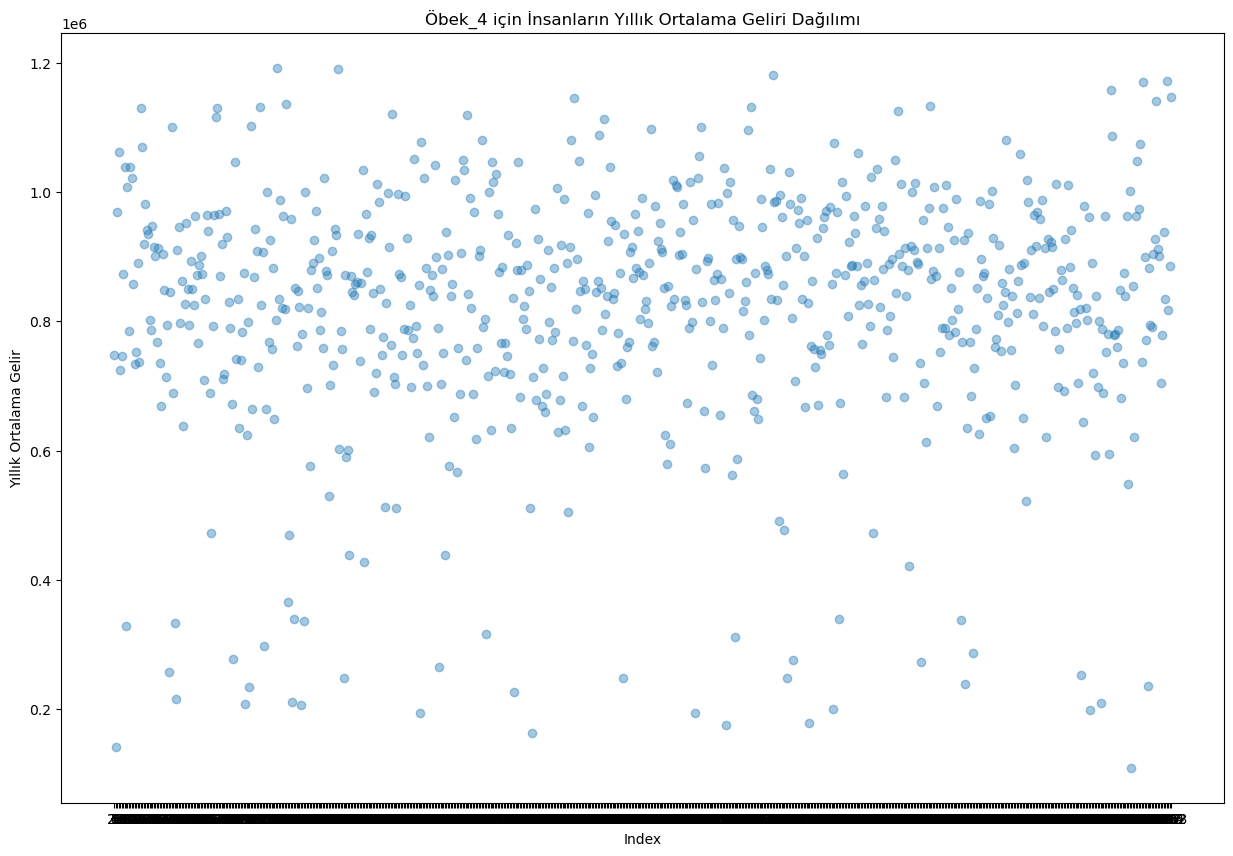

In [108]:
plt.figure(figsize=(15, 10))
plt.scatter(range(obek_4_rows.shape[0]), obek_4_rows['Yıllık Ortalama Gelir'], alpha=0.4)
plt.xlabel('Index')
plt.ylabel('Yıllık Ortalama Gelir')
plt.title('Öbek_4 için İnsanların Yıllık Ortalama Geliri Dağılımı')
plt.xticks(range(obek_4_rows.shape[0]), obek_4_rows.index)  # X ekseni indeks değerleri ile etiketlensin
plt.show()

##### Açıkçası burada bir outlier değer olduğunu söyleyemeyeceğim... Sıkıntı yok.. Peki bu zengin insanlar nerede yaşıyorlar?

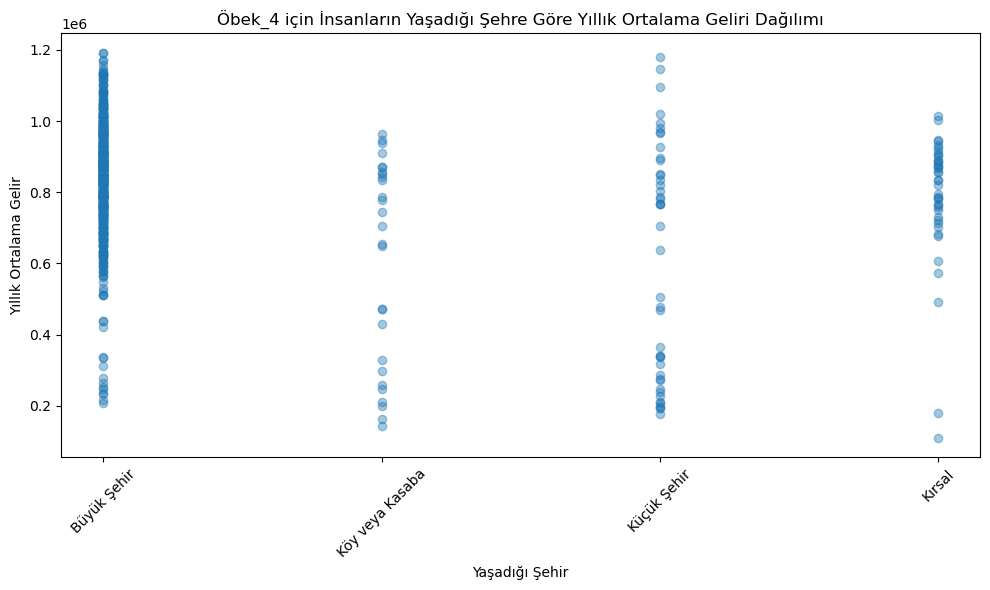

In [109]:
plt.figure(figsize=(10, 6))
plt.scatter(obek_4_rows['Yaşadığı Şehir'], obek_4_rows['Yıllık Ortalama Gelir'], alpha=0.4)
plt.xlabel('Yaşadığı Şehir')
plt.ylabel('Yıllık Ortalama Gelir')
plt.title('Öbek_4 için İnsanların Yaşadığı Şehre Göre Yıllık Ortalama Geliri Dağılımı')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Her telden var açıkçası..... Zenginler tek biryerde yaşamıyor..

### Yaşadığı şehir

In [110]:
obek_4_sehir = obek_4_rows['Yaşadığı Şehir'].value_counts()
obek_4_sehir

Büyük Şehir        609
Küçük Şehir         43
Kırsal              41
Köy veya Kasaba     27
Name: Yaşadığı Şehir, dtype: int64

##### Tahmin etmiştim..

In [111]:
# Peki diğer öbekteki insanlar nasıl şehirlerde yaşıyorlar?

df_train['Yaşadığı Şehir'].value_counts()

Büyük Şehir        1959
Küçük Şehir        1842
Köy veya Kasaba    1092
Kırsal              567
Name: Yaşadığı Şehir, dtype: int64

### En çok ilgilendiği ürün grubu

In [112]:
# Peki zenginler, neyle ilgileniyorlar? :) Anlaşılan o ki, karar veremiyorlar hepsi güzel..

obek_4_urun = obek_4_rows['En Çok İlgilendiği Ürün Grubu'].value_counts()
obek_4_urun

Giyim                               156
Spor Malzemeleri                    153
Kozmetik                            152
Ev ve Mobilya                       131
Elektronik ve Teknolojik Ürünler    128
Name: En Çok İlgilendiği Ürün Grubu, dtype: int64

### Yıllık ortalama satın alım miktarı

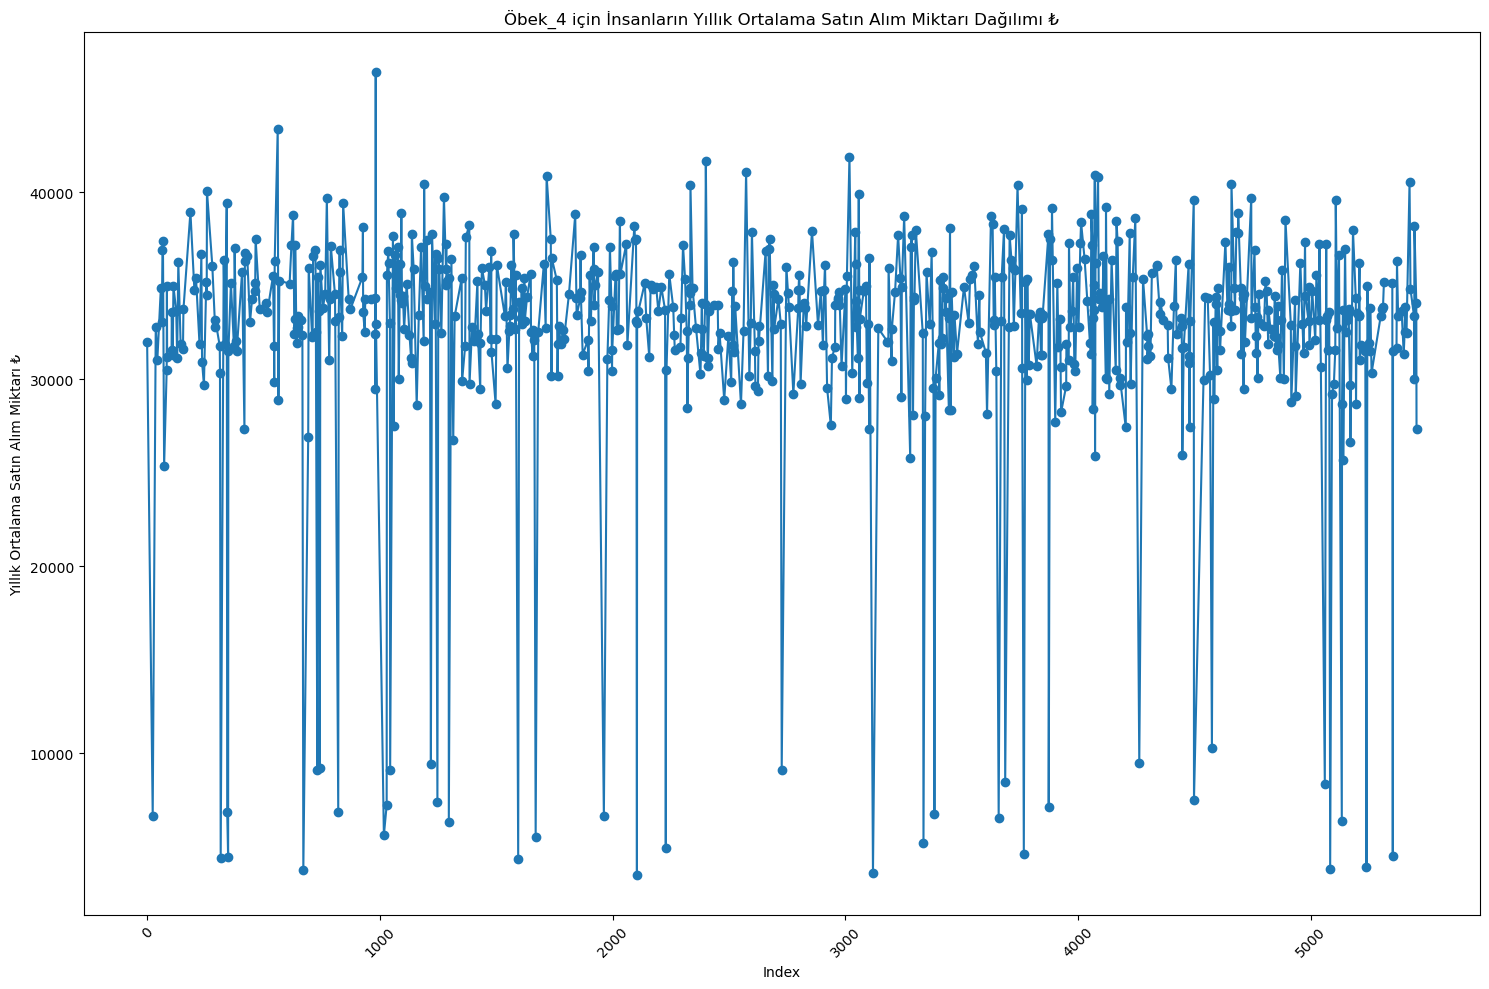

In [113]:
plt.figure(figsize=(15, 10))
plt.plot(obek_4_rows.index, obek_4_rows['Yıllık Ortalama Satın Alım Miktarı'], marker='o')
plt.xlabel('Index')
plt.ylabel('Yıllık Ortalama Satın Alım Miktarı ₺')
plt.title('Öbek_4 için İnsanların Yıllık Ortalama Satın Alım Miktarı Dağılımı ₺')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Belki bu sefer alt tarafa doğru bir outlier olabilir, ne dersin? Kontrol edilsin data sekmesinden..

### Yıllık ortalama sipariş verilen ürün adedi

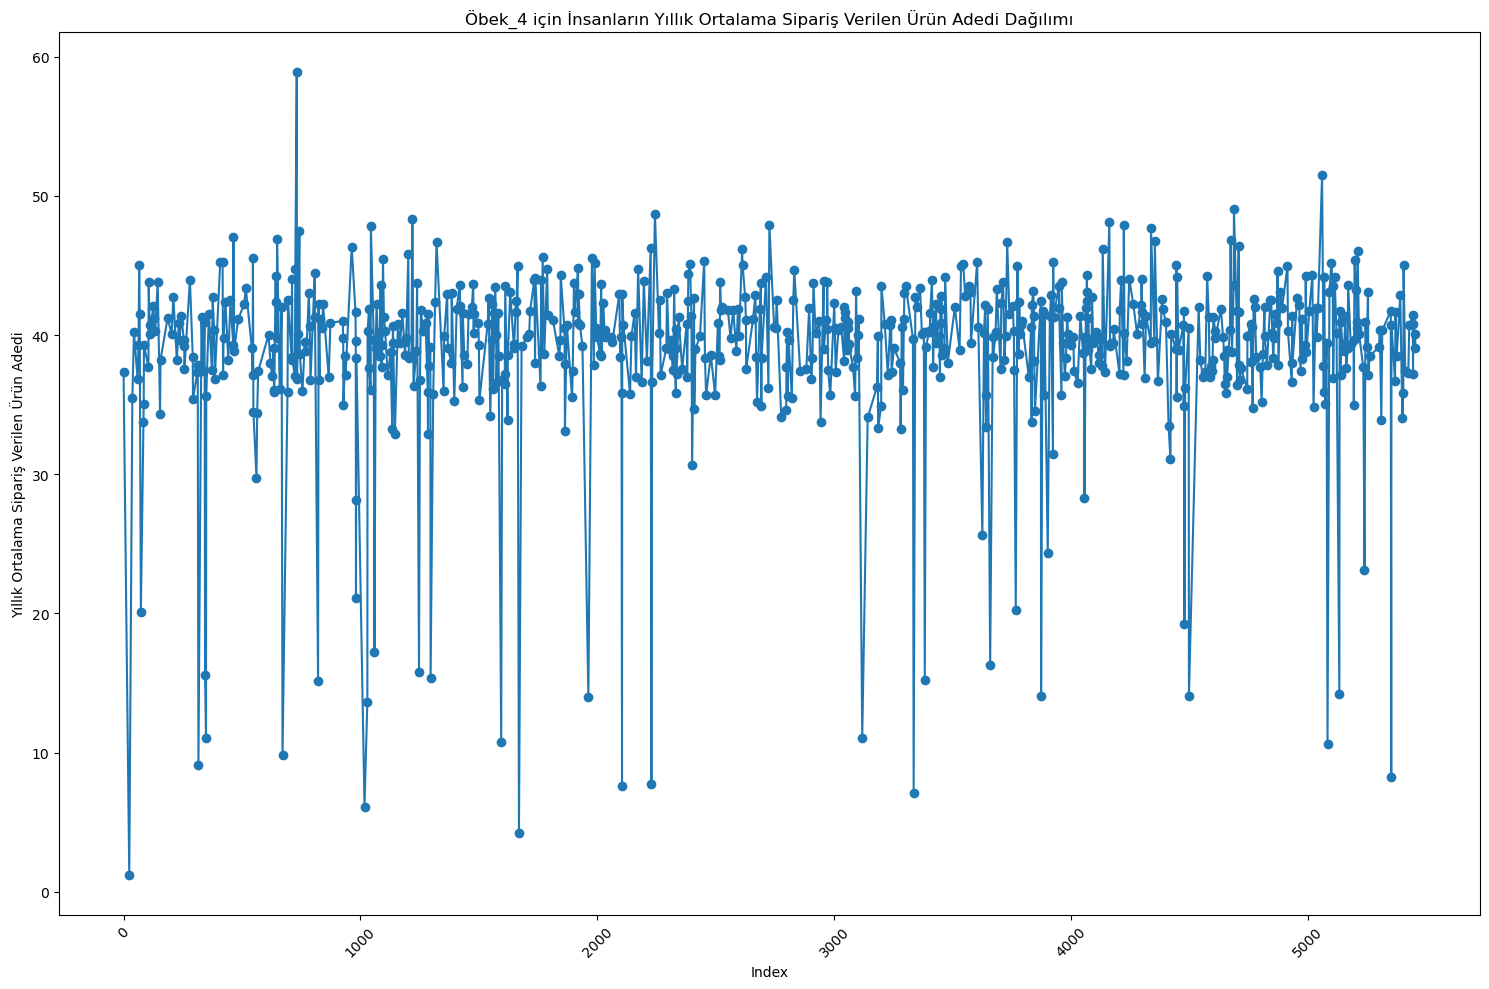

In [114]:
plt.figure(figsize=(15, 10))
plt.plot(obek_4_rows.index, obek_4_rows['Yıllık Ortalama Sipariş Verilen Ürün Adedi'], marker='o')
plt.xlabel('Index')
plt.ylabel('Yıllık Ortalama Sipariş Verilen Ürün Adedi')
plt.title('Öbek_4 için İnsanların Yıllık Ortalama Sipariş Verilen Ürün Adedi Dağılımı')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [115]:
rounded_avg_orders = obek_4_rows['Yıllık Ortalama Sipariş Verilen Ürün Adedi'].apply(round).value_counts().sort_values(ascending=False)
rounded_avg_orders.head(15)

40    93
39    82
41    81
42    79
38    70
37    61
44    46
43    42
36    38
45    25
35    18
34    12
46    10
33     8
47     7
Name: Yıllık Ortalama Sipariş Verilen Ürün Adedi, dtype: int64

##### 35-50 arası.. Kadın grubuna benziyor

In [116]:
# KARŞILAŞTIRMAN İÇİN TÜM VERİ SETİNDEKİ ORTALAMA

rounded_avg_orders_all = df_train['Yıllık Ortalama Sipariş Verilen Ürün Adedi'].apply(round).value_counts().sort_values(ascending=False)
rounded_avg_orders_all.head(10)

15    296
10    283
16    218
11    211
20    202
14    196
9     182
19    166
21    166
30    166
Name: Yıllık Ortalama Sipariş Verilen Ürün Adedi, dtype: int64

### Eğitime devam etme durumu

In [117]:
obek_4_egitim_devam_durumu = obek_4_rows['Eğitime Devam Etme Durumu'].value_counts()
obek_4_egitim_devam_durumu

0    654
1     66
Name: Eğitime Devam Etme Durumu, dtype: int64

##### Herkes işini kurmuş sayılır...

In [118]:
# Genelde insanlar okuyor muydu peki daha doğrusu hali hazırda gördükleri bir eğitim var mıydı?

df_train['Eğitime Devam Etme Durumu'].value_counts()


0    4554
1     906
Name: Eğitime Devam Etme Durumu, dtype: int64

### Yıllık Ortalama Sepete Atılan Ürün Adedi

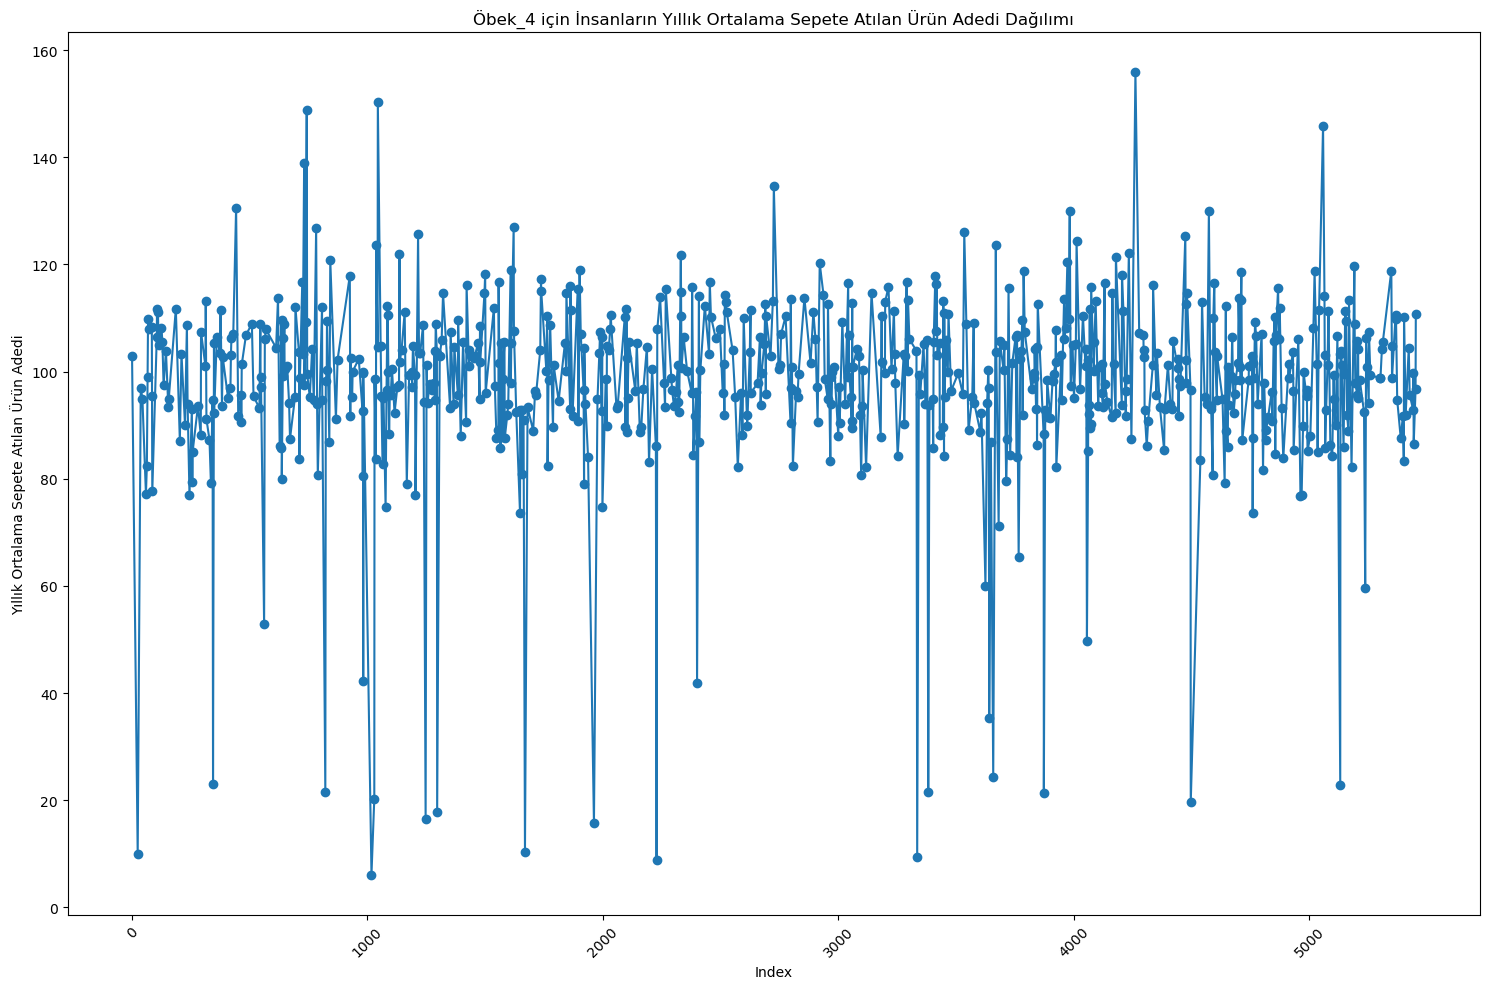

In [119]:
plt.figure(figsize=(15, 10))
plt.plot(obek_4_rows.index, obek_4_rows['Yıllık Ortalama Sepete Atılan Ürün Adedi'], marker='o')
plt.xlabel('Index')
plt.ylabel('Yıllık Ortalama Sepete Atılan Ürün Adedi')
plt.title('Öbek_4 için İnsanların Yıllık Ortalama Sepete Atılan Ürün Adedi Dağılımı')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [120]:
rounded_avg_items = obek_4_rows['Yıllık Ortalama Sepete Atılan Ürün Adedi'].apply(round).value_counts().sort_values(ascending=False)
rounded_avg_items.head(30)

95     33
94     31
101    31
96     30
106    28
104    28
100    28
99     27
103    26
92     25
105    23
93     23
97     22
98     20
110    19
107    18
102    16
109    16
111    15
113    15
88     14
90     14
112    13
108    12
86     12
91     12
87     10
114    10
115    10
89     10
Name: Yıllık Ortalama Sepete Atılan Ürün Adedi, dtype: int64

##### 3 katı kadar sepete ekleyip, yalnızca 3'te 1'ini alıyorlar... İlginç.. Genelle karşılaştırma yapmayacağım çünkü bir mantığı yok.

# obek_5

### Cinsiyet

In [121]:
obek_5_rows = df_train[df_train['Öbek İsmi'] == 'obek_5']
obek_5_gender_counts = obek_5_rows['Cinsiyet'].value_counts()
obek_5_gender_counts

1    576
0    130
Name: Cinsiyet, dtype: int64

##### Bu notu sonradan yazıyorum... Çoğunluğu erkekmiş...

### Yaş grubu

In [122]:
obek_5_age = obek_5_rows['Yaş Grubu'].value_counts()
obek_5_age

31-40    350
18-30    251
41-50     40
51-60     37
>60       28
Name: Yaş Grubu, dtype: int64

##### Yine genç grubun ağırlıkta olduğu bir grup diyebiliriz.. 

### Medeni Durum

In [123]:
obek_5_medeni_durum = obek_5_rows['Medeni Durum'].value_counts()
obek_5_medeni_durum

0    397
1    309
Name: Medeni Durum, dtype: int64

##### Yarıdan fazlası evli değil.. Hmm.. Bir anlam ifade etmiyor şimdilik, bir de yaşa göre bakalım

In [124]:
obek_5_marital_age = obek_5_rows.groupby(['Medeni Durum', 'Yaş Grubu'])['Yaş Grubu'].count().unstack()
obek_5_marital_age

Yaş Grubu     18-30  31-40  41-50  51-60  >60
Medeni Durum                                 
0               133    204     26     22   12
1               118    146     14     15   16

##### Hala bir şey ifade etmiyor.

### Eğitim Düzeyi

In [125]:
obek_5_egitim = obek_5_rows['Eğitim Düzeyi'].value_counts()
obek_5_egitim

Lise Mezunu             534
Doktora Mezunu           34
Üniversite Mezunu        29
Yüksek Lisans Mezunu     24
Ortaokul Mezunu          21
Yüksekokul Mezunu        20
Doktora Ötesi            20
İlkokul Mezunu           19
Eğitimsiz                 5
Name: Eğitim Düzeyi, dtype: int64

##### ???.. :O.. Herkes lise mezunu.. Eğer eğitime devam ediyorlarsa, diyeceğim o ki bunlar üniversite öğrencisi ya da mezunları..

In [126]:
# Eğitim durumunun yaşa dağılımını bir görelim...

obek_5_education_age = obek_5_rows.groupby(['Eğitim Düzeyi', 'Yaş Grubu'])['Öbek İsmi'].count().unstack()
obek_5_education_age

Yaş Grubu             18-30  31-40  41-50  51-60   >60
Eğitim Düzeyi                                         
Doktora Mezunu          7.0   24.0    2.0    1.0   NaN
Doktora Ötesi          10.0    8.0    1.0    NaN   1.0
Eğitimsiz               2.0    1.0    NaN    2.0   NaN
Lise Mezunu           189.0  267.0   32.0   23.0  23.0
Ortaokul Mezunu         7.0   11.0    1.0    1.0   1.0
Yüksek Lisans Mezunu   10.0   11.0    1.0    NaN   2.0
Yüksekokul Mezunu       7.0    8.0    1.0    3.0   1.0
Üniversite Mezunu      11.0   12.0    1.0    5.0   NaN
İlkokul Mezunu          8.0    8.0    1.0    2.0   NaN

##### 31-40 arasında lise mezunu çok varsa, bunlar üniversite öğrencisi değildir.

<Figure size 1500x1000 with 0 Axes>

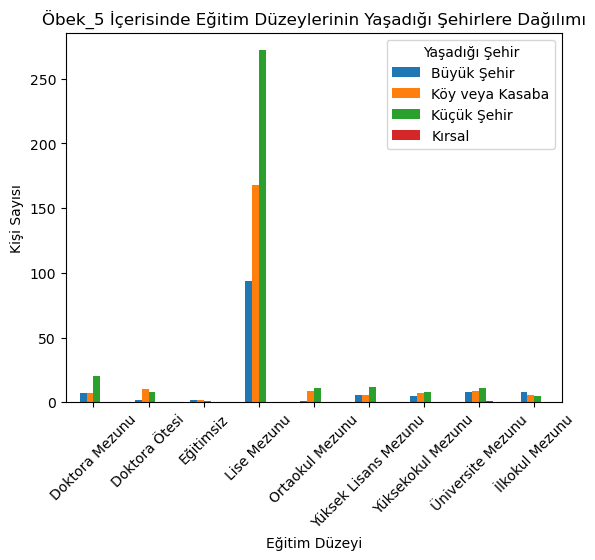

In [127]:
# Eğitim seviyesine göre insanların yaşadığı yere bakalım..

obek_5_education_city = obek_5_rows.groupby(['Eğitim Düzeyi', 'Yaşadığı Şehir'])['Öbek İsmi'].count().unstack()

plt.figure(figsize=(15, 10))
obek_5_education_city.plot(kind='bar')
plt.xlabel('Eğitim Düzeyi')
plt.ylabel('Kişi Sayısı')
plt.title('Öbek_5 İçerisinde Eğitim Düzeylerinin Yaşadığı Şehirlere Dağılımı')
plt.xticks(rotation=45)
plt.legend(title='Yaşadığı Şehir')
plt.show()

### İstihdam Durumu

In [128]:
obek_5_istihdam = obek_5_rows['İstihdam Durumu'].value_counts()
obek_5_istihdam

Düzenli ve Ücretli Bir İşi Var    428
Kendi İşinin Sahibi               156
İşsiz veya Düzenli Bir İşi Yok    119
Emekli                              3
Name: İstihdam Durumu, dtype: int64

##### İnsanların %80'i bir iş ile meşgul... Eğitim ve iş ilişkisine de bakalım.

<Figure size 1500x1000 with 0 Axes>

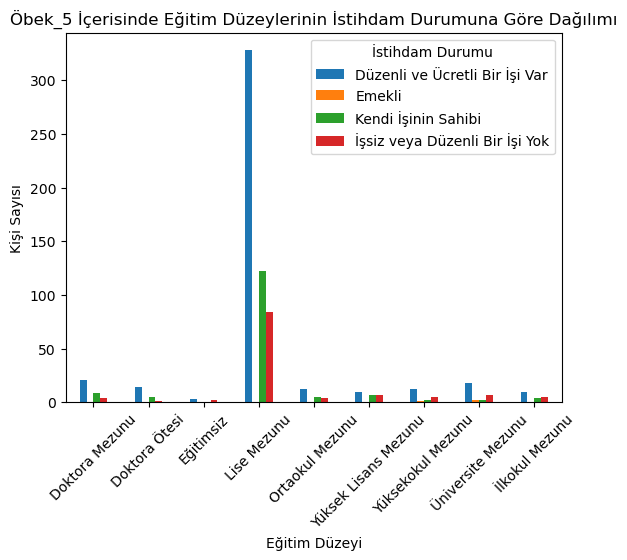

In [129]:
obek_5_education_employment = obek_5_rows.groupby(['Eğitim Düzeyi', 'İstihdam Durumu'])['Öbek İsmi'].count().unstack()

plt.figure(figsize=(15, 10))
obek_5_education_employment.plot(kind='bar')
plt.xlabel('Eğitim Düzeyi')
plt.ylabel('Kişi Sayısı')
plt.title('Öbek_5 İçerisinde Eğitim Düzeylerinin İstihdam Durumuna Göre Dağılımı')
plt.xticks(rotation=45)
plt.legend(title='İstihdam Durumu')
plt.show()

### Yıllık Ortalama Gelir

In [130]:
# Bakalım zenginler mi?

obek_5_yearly_income = obek_5_rows['Yıllık Ortalama Gelir']
overall_yearly_income = df_train['Yıllık Ortalama Gelir']

obek_5_avg_income = obek_5_yearly_income.mean()
overall_avg_income = overall_yearly_income.mean()

print("Öbek_5 Yıllık Ortalama Gelir Ortalaması:", obek_5_avg_income)
print("Tüm Veri Yıllık Ortalama Gelir Ortalaması:", overall_avg_income)

Öbek_5 Yıllık Ortalama Gelir Ortalaması: 222224.03635432228
Tüm Veri Yıllık Ortalama Gelir Ortalaması: 363571.1334275545


##### Hayır, lise mezunu ve ortalamadan düşük gelire sahipler..

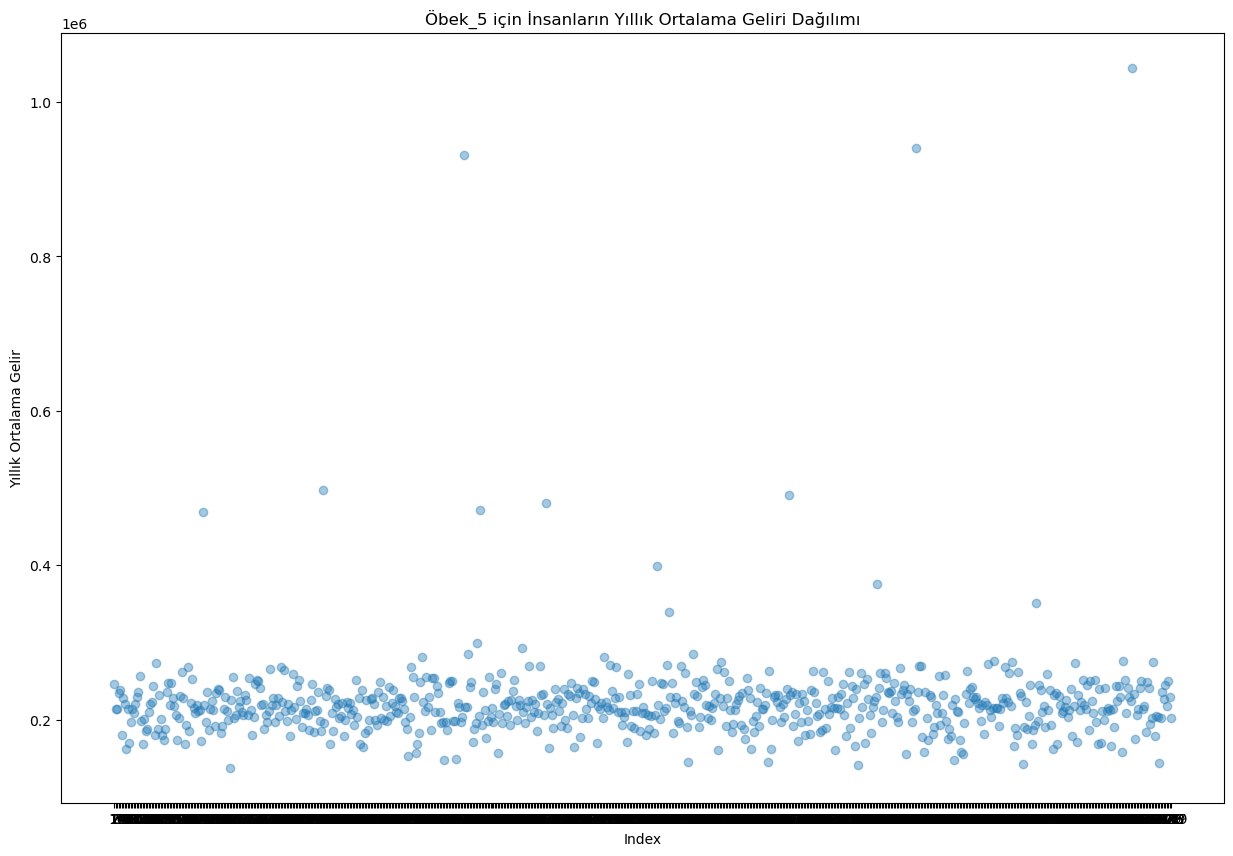

In [131]:
plt.figure(figsize=(15, 10))
plt.scatter(range(obek_5_rows.shape[0]), obek_5_rows['Yıllık Ortalama Gelir'], alpha=0.4)
plt.xlabel('Index')
plt.ylabel('Yıllık Ortalama Gelir')
plt.title('Öbek_5 için İnsanların Yıllık Ortalama Geliri Dağılımı')
plt.xticks(range(obek_5_rows.shape[0]), obek_5_rows.index)  # X ekseni indeks değerleri ile etiketlensin
plt.show()

##### Çok açık aykırı değerler var... Demek 220 bin bile çıkmayacaktı yıllık gelir... Güzel, bunu görmek güzel

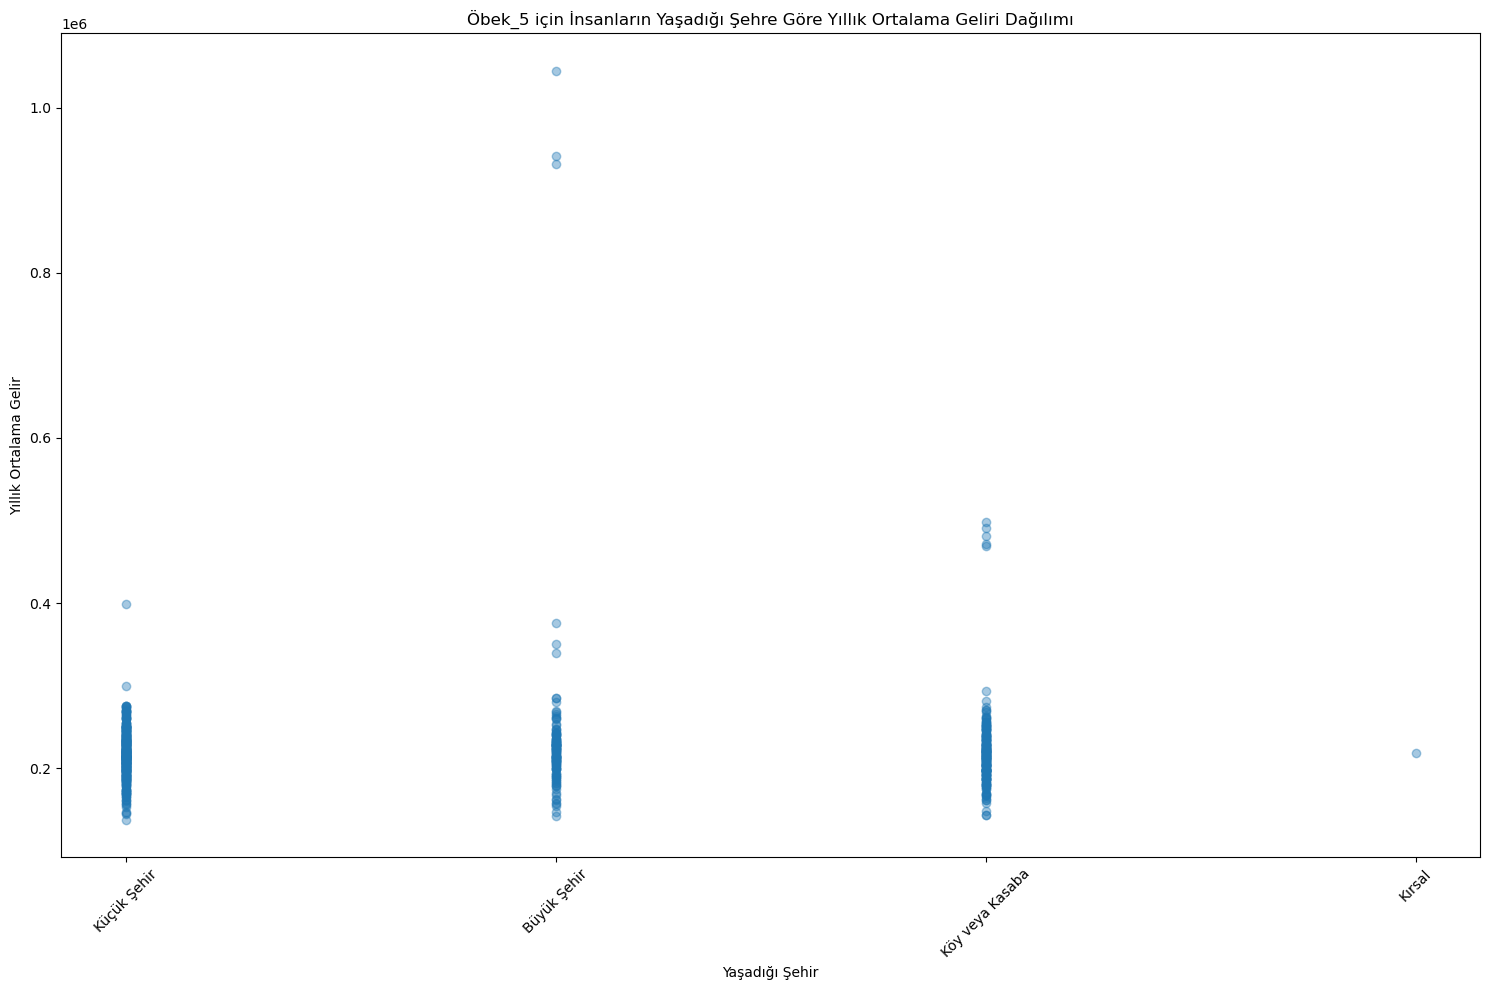

In [132]:
plt.figure(figsize=(15, 10))
plt.scatter(obek_5_rows['Yaşadığı Şehir'], obek_5_rows['Yıllık Ortalama Gelir'], alpha=0.4)
plt.xlabel('Yaşadığı Şehir')
plt.ylabel('Yıllık Ortalama Gelir')
plt.title('Öbek_5 için İnsanların Yaşadığı Şehre Göre Yıllık Ortalama Geliri Dağılımı')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Yaşadığı şehir

In [133]:
# Üstteki grafikte kırsalda tek bir nokta var, kırsalda 1 kişi mi yaşıyor?

obek_5_sehir = obek_5_rows['Yaşadığı Şehir'].value_counts()
obek_5_sehir

Küçük Şehir        348
Köy veya Kasaba    224
Büyük Şehir        133
Kırsal               1
Name: Yaşadığı Şehir, dtype: int64

##### Hakikaten de öyleymiş... Ve insanların %85'ten fazlası büyük şehir dışında yaşıyor.

### En çok ilgilendiği ürün grubu

In [134]:
obek_5_urun = obek_5_rows['En Çok İlgilendiği Ürün Grubu'].value_counts()
obek_5_urun

Elektronik ve Teknolojik Ürünler    247
Spor Malzemeleri                    225
Giyim                               112
Kozmetik                             74
Ev ve Mobilya                        48
Name: En Çok İlgilendiği Ürün Grubu, dtype: int64

##### Elektroniğe ilgileri var... Hmmm.... Ama gençler ve orta yaş çoğunluktaydı ondan olabilir...

### Yıllık ortalama satın alım miktarı

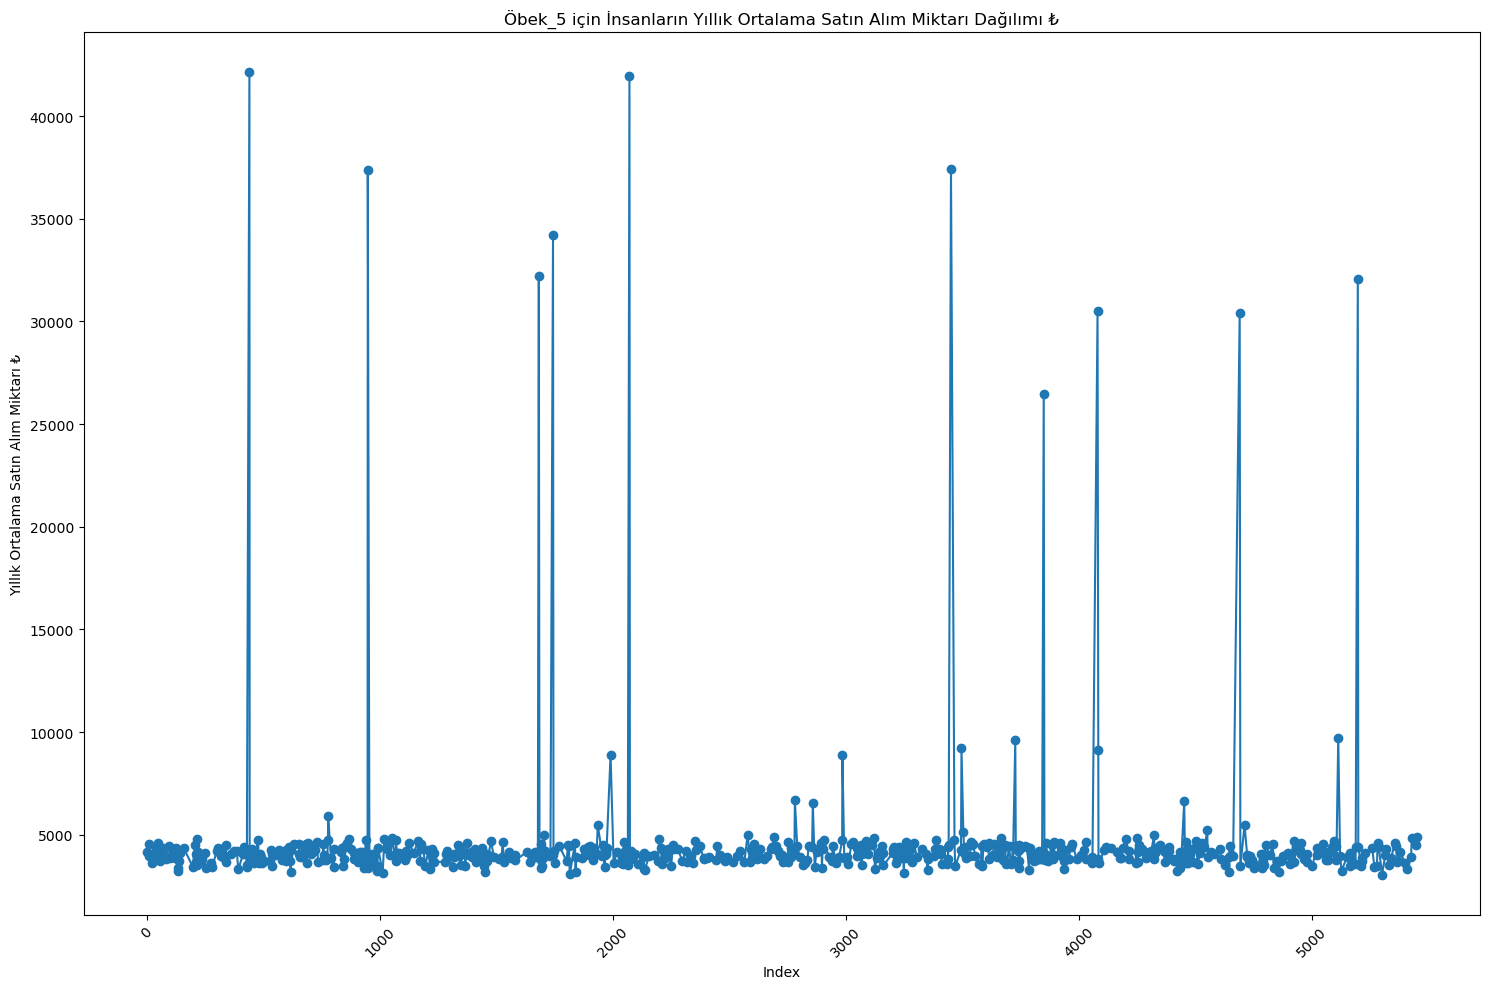

In [135]:
# Bir yılda ne kadar mal alıyorlar? Bence fazla değildir, geliri en düşük grup bu (muydu hatırlamıyorum).

plt.figure(figsize=(15, 10))
plt.plot(obek_5_rows.index, obek_5_rows['Yıllık Ortalama Satın Alım Miktarı'], marker='o')
plt.xlabel('Index')
plt.ylabel('Yıllık Ortalama Satın Alım Miktarı ₺')
plt.title('Öbek_5 için İnsanların Yıllık Ortalama Satın Alım Miktarı Dağılımı ₺')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Outlierler kendini belli ediyor.. 220 bin kazanıp 5 bin harcamayı tercih ediyorlar internetten.. 

### Yıllık ortalama sipariş verilen ürün adedi

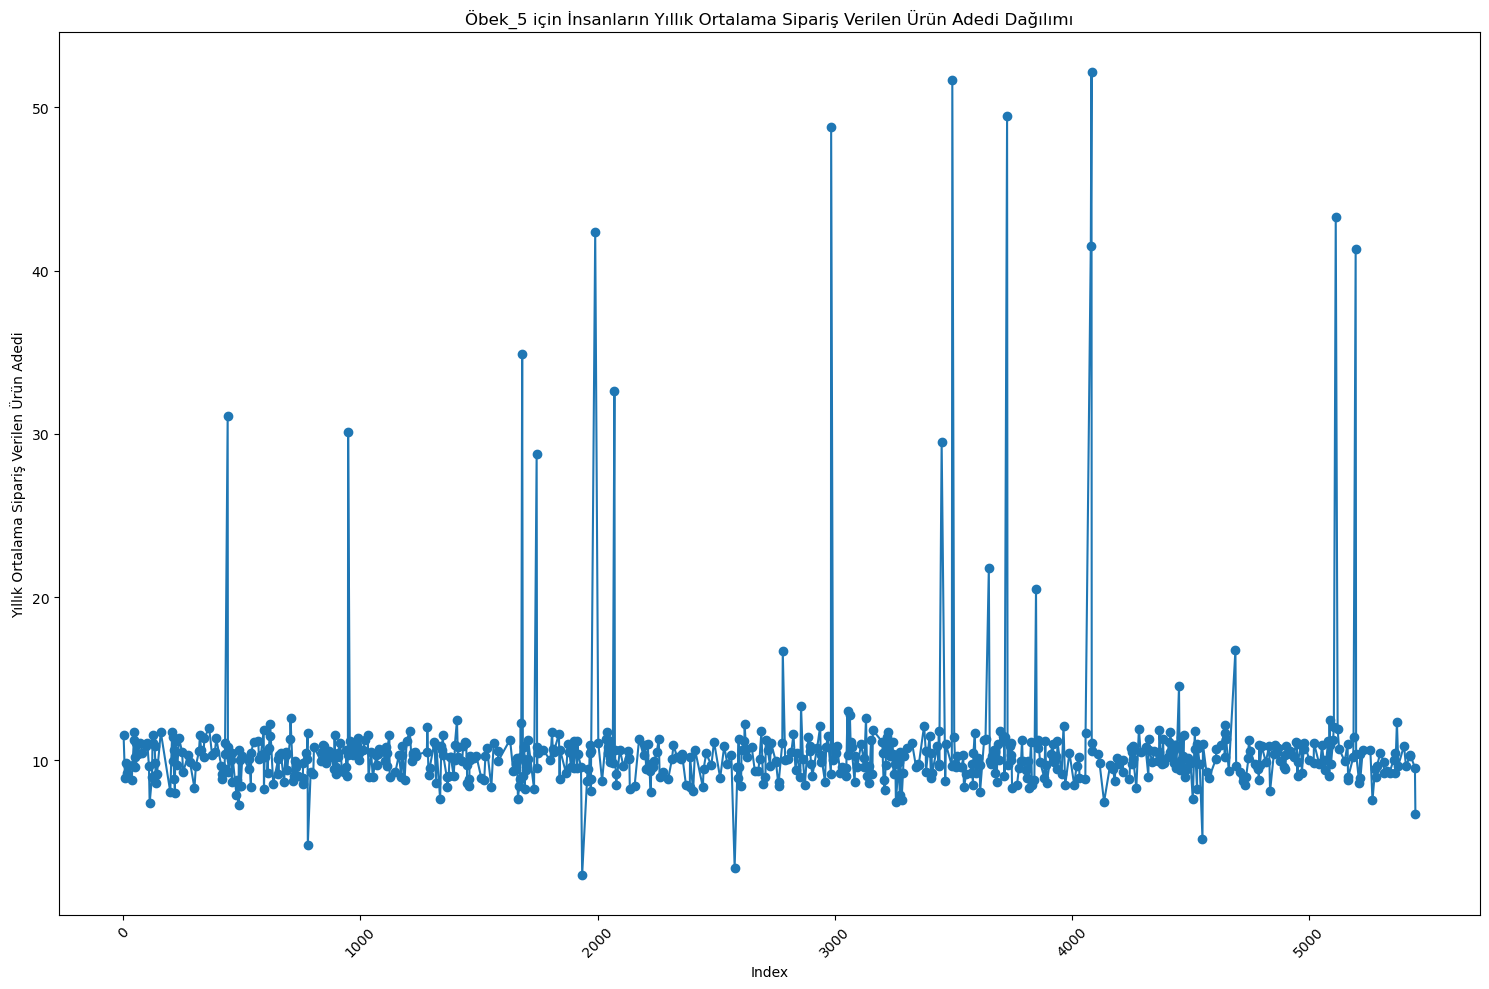

In [136]:
plt.figure(figsize=(15, 10))
plt.plot(obek_5_rows.index, obek_5_rows['Yıllık Ortalama Sipariş Verilen Ürün Adedi'], marker='o')
plt.xlabel('Index')
plt.ylabel('Yıllık Ortalama Sipariş Verilen Ürün Adedi')
plt.title('Öbek_5 için İnsanların Yıllık Ortalama Sipariş Verilen Ürün Adedi Dağılımı')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [137]:
rounded_avg_orders = obek_5_rows['Yıllık Ortalama Sipariş Verilen Ürün Adedi'].apply(round).value_counts().sort_values(ascending=False)
rounded_avg_orders

10    254
11    192
9     139
12     44
8      44
7       5
13      5
3       2
52      2
5       2
30      2
42      2
17      2
49      2
15      1
22      1
20      1
43      1
29      1
33      1
35      1
31      1
41      1
Name: Yıllık Ortalama Sipariş Verilen Ürün Adedi, dtype: int64

##### Açıkçası çok da fazla bir şey alamıyorlar.. İlk gruba benziyor..

### Eğitime devam etme durumu

In [138]:
obek_5_egitim_devam_durumu = obek_5_rows['Eğitime Devam Etme Durumu'].value_counts()
obek_5_egitim_devam_durumu

0    658
1     48
Name: Eğitime Devam Etme Durumu, dtype: int64

### Yıllık Ortalama Sepete Atılan Ürün Adedi

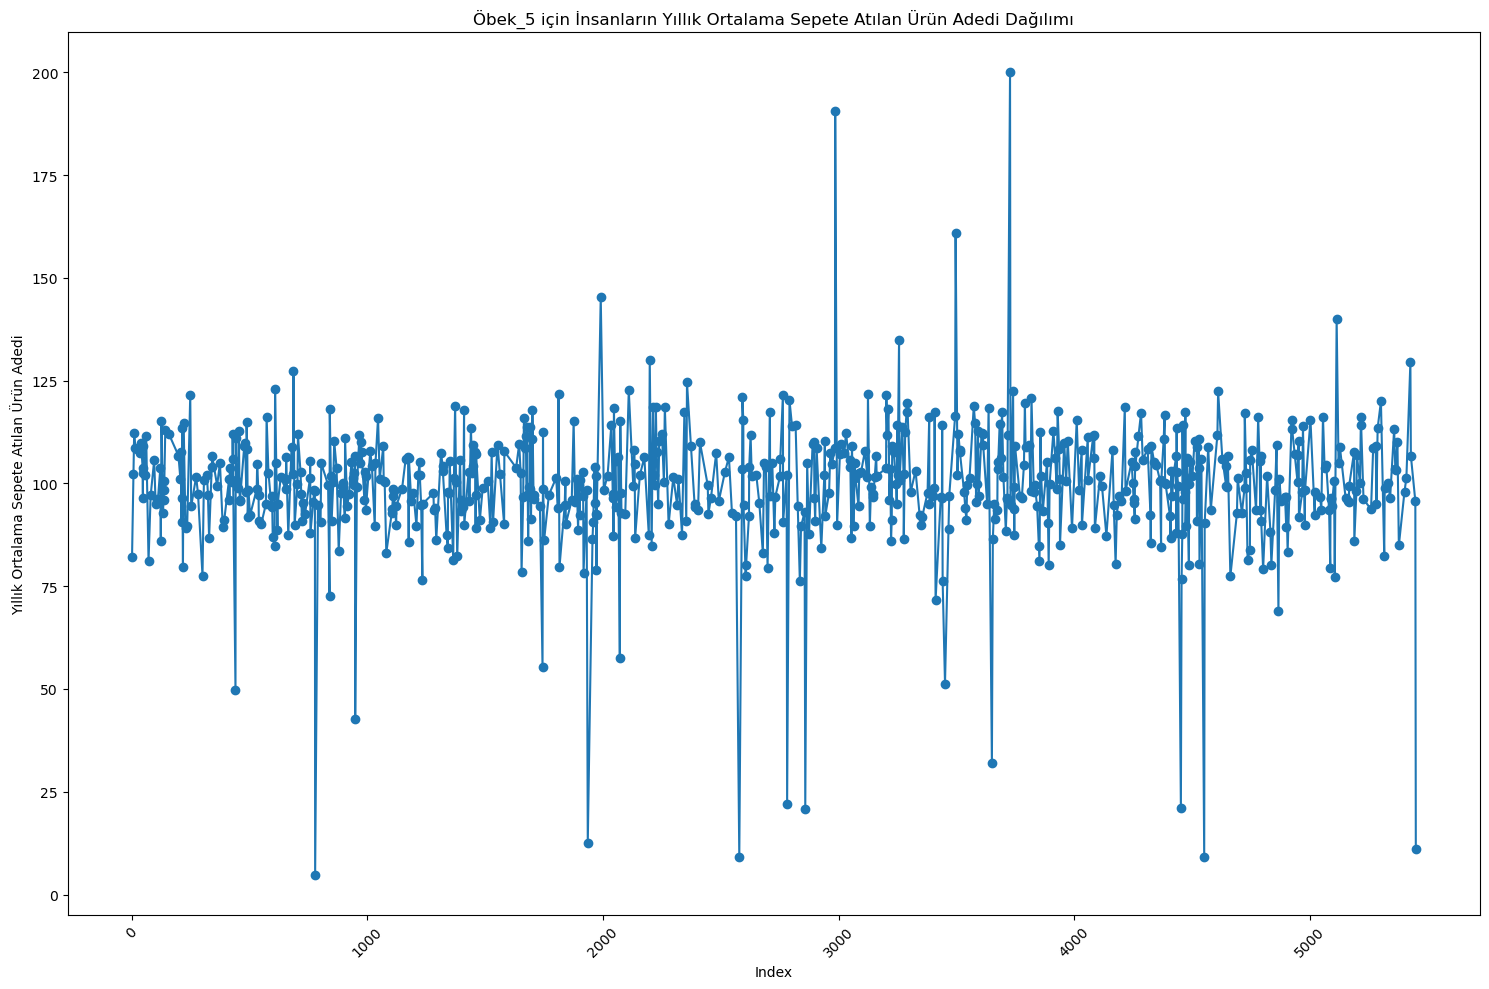

In [139]:
plt.figure(figsize=(15, 10))
plt.plot(obek_5_rows.index, obek_5_rows['Yıllık Ortalama Sepete Atılan Ürün Adedi'], marker='o')
plt.xlabel('Index')
plt.ylabel('Yıllık Ortalama Sepete Atılan Ürün Adedi')
plt.title('Öbek_5 için İnsanların Yıllık Ortalama Sepete Atılan Ürün Adedi Dağılımı')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [140]:
rounded_avg_items = obek_5_rows['Yıllık Ortalama Sepete Atılan Ürün Adedi'].apply(round).value_counts().sort_values(ascending=False)
rounded_avg_items.head(15)

97     34
101    31
102    31
96     30
95     30
98     30
109    25
99     25
100    24
105    24
108    23
104    22
106    21
94     21
103    20
Name: Yıllık Ortalama Sepete Atılan Ürün Adedi, dtype: int64

##### :'(.... Bu insanlar o kadar çok şeyi sepete ekliyorlar ki... Sadece 10'da 1 ini alabiliyorlar.. Allah yardımcıları olsun.. Ama yine de bu gruba bir isim bulamadım..

# obek_6

### Cinsiyet

In [141]:
obek_6_rows = df_train[df_train['Öbek İsmi'] == 'obek_6']
obek_6_gender_counts = obek_6_rows['Cinsiyet'].value_counts()
obek_6_gender_counts

0    344
1    344
Name: Cinsiyet, dtype: int64

##### Cinsiyetler kusursuz oranda eşit... Şüpheli.

### Yaş grubu

In [142]:
obek_6_age = obek_6_rows['Yaş Grubu'].value_counts()
obek_6_age

51-60    390
>60      204
41-50     41
31-40     33
18-30     20
Name: Yaş Grubu, dtype: int64

##### Oyy yaşlı grubuna geldik.. Seni yeredene gurban oluyum sen buralara nereden geldin tarzı

### Medeni Durum

In [143]:
obek_6_medeni_durum = obek_6_rows['Medeni Durum'].value_counts()
obek_6_medeni_durum

1    460
0    228
Name: Medeni Durum, dtype: int64

In [144]:
# Yaşlara göre evli-bekar lara bakalım.

obek_6_marital_age = obek_6_rows.groupby(['Medeni Durum', 'Yaş Grubu'])['Yaş Grubu'].count().unstack()
obek_6_marital_age

Yaş Grubu     18-30  31-40  41-50  51-60  >60
Medeni Durum                                 
0                10     13     15    136   54
1                10     20     26    254  150

<Figure size 1500x1000 with 0 Axes>

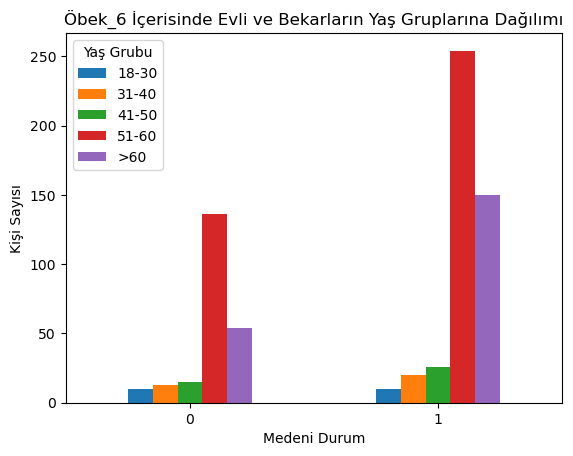

In [145]:
plt.figure(figsize=(15, 10))
obek_6_marital_age.plot(kind='bar')
plt.xlabel('Medeni Durum')
plt.ylabel('Kişi Sayısı')
plt.title('Öbek_6 İçerisinde Evli ve Bekarların Yaş Gruplarına Dağılımı')
plt.xticks(rotation=0)
plt.legend(title='Yaş Grubu')
plt.show()

##### Yaşlılar daha bekar?

### Eğitim Düzeyi

In [146]:
obek_6_egitim = obek_6_rows['Eğitim Düzeyi'].value_counts()
obek_6_egitim

Üniversite Mezunu       414
Yüksekokul Mezunu        67
Yüksek Lisans Mezunu     64
Doktora Ötesi            35
Doktora Mezunu           33
Eğitimsiz                26
Ortaokul Mezunu          18
Lise Mezunu              17
İlkokul Mezunu           14
Name: Eğitim Düzeyi, dtype: int64

##### Ne dersun? İşler ilginç bir hal aldı desene... Emekli memur grubu. Net.

In [147]:
# Bakalım gerçekten öyle mi, yaşlarına bakalım

obek_6_education_age = obek_6_rows.groupby(['Eğitim Düzeyi', 'Yaş Grubu'])['Öbek İsmi'].count().unstack()
obek_6_education_age

Yaş Grubu             18-30  31-40  41-50  51-60    >60
Eğitim Düzeyi                                          
Doktora Mezunu          NaN    3.0    NaN   18.0   12.0
Doktora Ötesi           2.0    1.0    3.0   20.0    9.0
Eğitimsiz               2.0    2.0    NaN   15.0    7.0
Lise Mezunu             NaN    3.0    5.0    6.0    3.0
Ortaokul Mezunu         NaN    2.0    3.0    8.0    5.0
Yüksek Lisans Mezunu    4.0    5.0    4.0   40.0   11.0
Yüksekokul Mezunu       1.0    4.0    7.0   36.0   19.0
Üniversite Mezunu      11.0   13.0   17.0  238.0  135.0
İlkokul Mezunu          NaN    NaN    2.0    9.0    3.0

<Figure size 5000x3000 with 0 Axes>

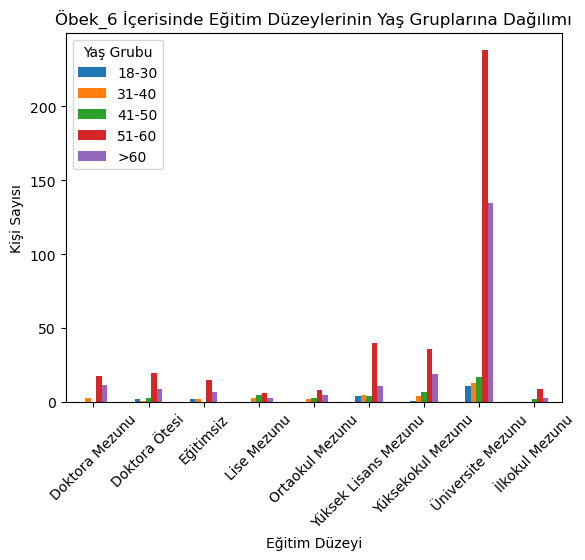

In [148]:
# Böyle pek anlamadık, şuna bakalım:

obek_6_education_age = obek_6_rows.groupby(['Eğitim Düzeyi', 'Yaş Grubu'])['Öbek İsmi'].count().unstack()

plt.figure(figsize=(50, 30))
obek_6_education_age.plot(kind='bar')
plt.xlabel('Eğitim Düzeyi')
plt.ylabel('Kişi Sayısı')
plt.title('Öbek_6 İçerisinde Eğitim Düzeylerinin Yaş Gruplarına Dağılımı')
plt.xticks(rotation=45)
plt.legend(title='Yaş Grubu')
plt.show()

<Figure size 1500x1000 with 0 Axes>

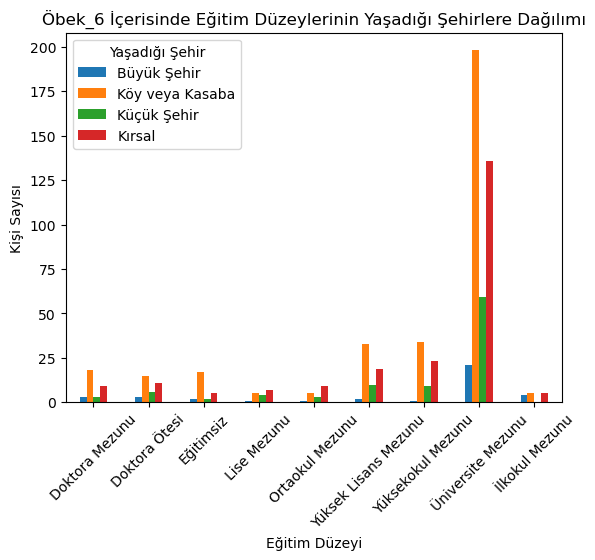

In [149]:
obek_6_education_city = obek_6_rows.groupby(['Eğitim Düzeyi', 'Yaşadığı Şehir'])['Öbek İsmi'].count().unstack()

plt.figure(figsize=(15, 10))
obek_6_education_city.plot(kind='bar')
plt.xlabel('Eğitim Düzeyi')
plt.ylabel('Kişi Sayısı')
plt.title('Öbek_6 İçerisinde Eğitim Düzeylerinin Yaşadığı Şehirlere Dağılımı')
plt.xticks(rotation=45)
plt.legend(title='Yaşadığı Şehir')
plt.show()

##### O tamam çözdük... Deşifre etti kendini.. Bunlar yarısı bekar hayatı yaşayan, yarısı evli akademisyen veya memurlar... Şehirlerden köylere göç etmişler..

### İstihdam Durumu

In [150]:
obek_6_istihdam = obek_6_rows['İstihdam Durumu'].value_counts()
obek_6_istihdam

Emekli                            347
Düzenli ve Ücretli Bir İşi Var    247
Kendi İşinin Sahibi                87
İşsiz veya Düzenli Bir İşi Yok      7
Name: İstihdam Durumu, dtype: int64

### Yıllık Ortalama Gelir

In [151]:
obek_6_yearly_income = obek_6_rows['Yıllık Ortalama Gelir']
overall_yearly_income = df_train['Yıllık Ortalama Gelir']

obek_6_avg_income = obek_6_yearly_income.mean()
overall_avg_income = overall_yearly_income.mean()

print("Öbek_6 Yıllık Ortalama Gelir Ortalaması:", obek_6_avg_income)
print("Tüm Veri Yıllık Ortalama Gelir Ortalaması:", overall_avg_income)

Öbek_6 Yıllık Ortalama Gelir Ortalaması: 480117.7761023898
Tüm Veri Yıllık Ortalama Gelir Ortalaması: 363571.1334275545


##### Memur maaşı gibi, ortalamanın 1.5 kat üstünde diyebiliriz her zamanki gibi

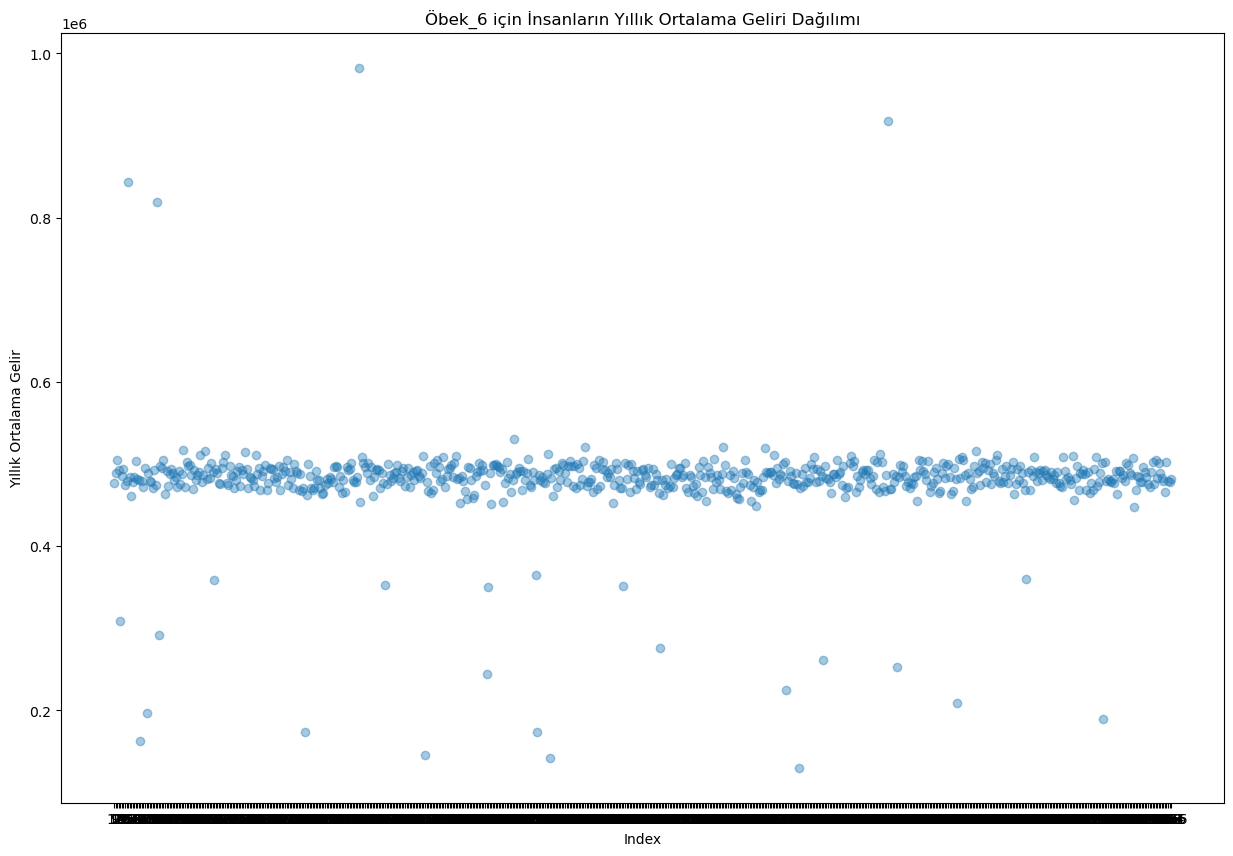

In [152]:
plt.figure(figsize=(15, 10))
plt.scatter(range(obek_6_rows.shape[0]), obek_6_rows['Yıllık Ortalama Gelir'], alpha=0.4)
plt.xlabel('Index')
plt.ylabel('Yıllık Ortalama Gelir')
plt.title('Öbek_6 için İnsanların Yıllık Ortalama Geliri Dağılımı')
plt.xticks(range(obek_6_rows.shape[0]), obek_6_rows.index)  # X ekseni indeks değerleri ile etiketlensin
plt.show()

##### Aykırı değerler var ama, bilmiyorum grubun kendi ortalamasına (480) yakın bir sonuç çıkmıştı.. Herneyse bakılır.

### Yaşadığı şehir

In [153]:
# Bunu görmüştük zaten
obek_6_sehir = obek_6_rows['Yaşadığı Şehir'].value_counts()
obek_6_sehir

Köy veya Kasaba    330
Kırsal             224
Küçük Şehir         96
Büyük Şehir         38
Name: Yaşadığı Şehir, dtype: int64

### En çok ilgilendiği ürün grubu

In [154]:
obek_6_urun = obek_6_rows['En Çok İlgilendiği Ürün Grubu'].value_counts()
obek_6_urun

Ev ve Mobilya                       185
Spor Malzemeleri                    139
Giyim                               129
Elektronik ve Teknolojik Ürünler    118
Kozmetik                            117
Name: En Çok İlgilendiği Ürün Grubu, dtype: int64

##### Mantıklı seçim, mantıklı sıralama. En azından ilk 3'ü

### Yıllık ortalama satın alım miktarı

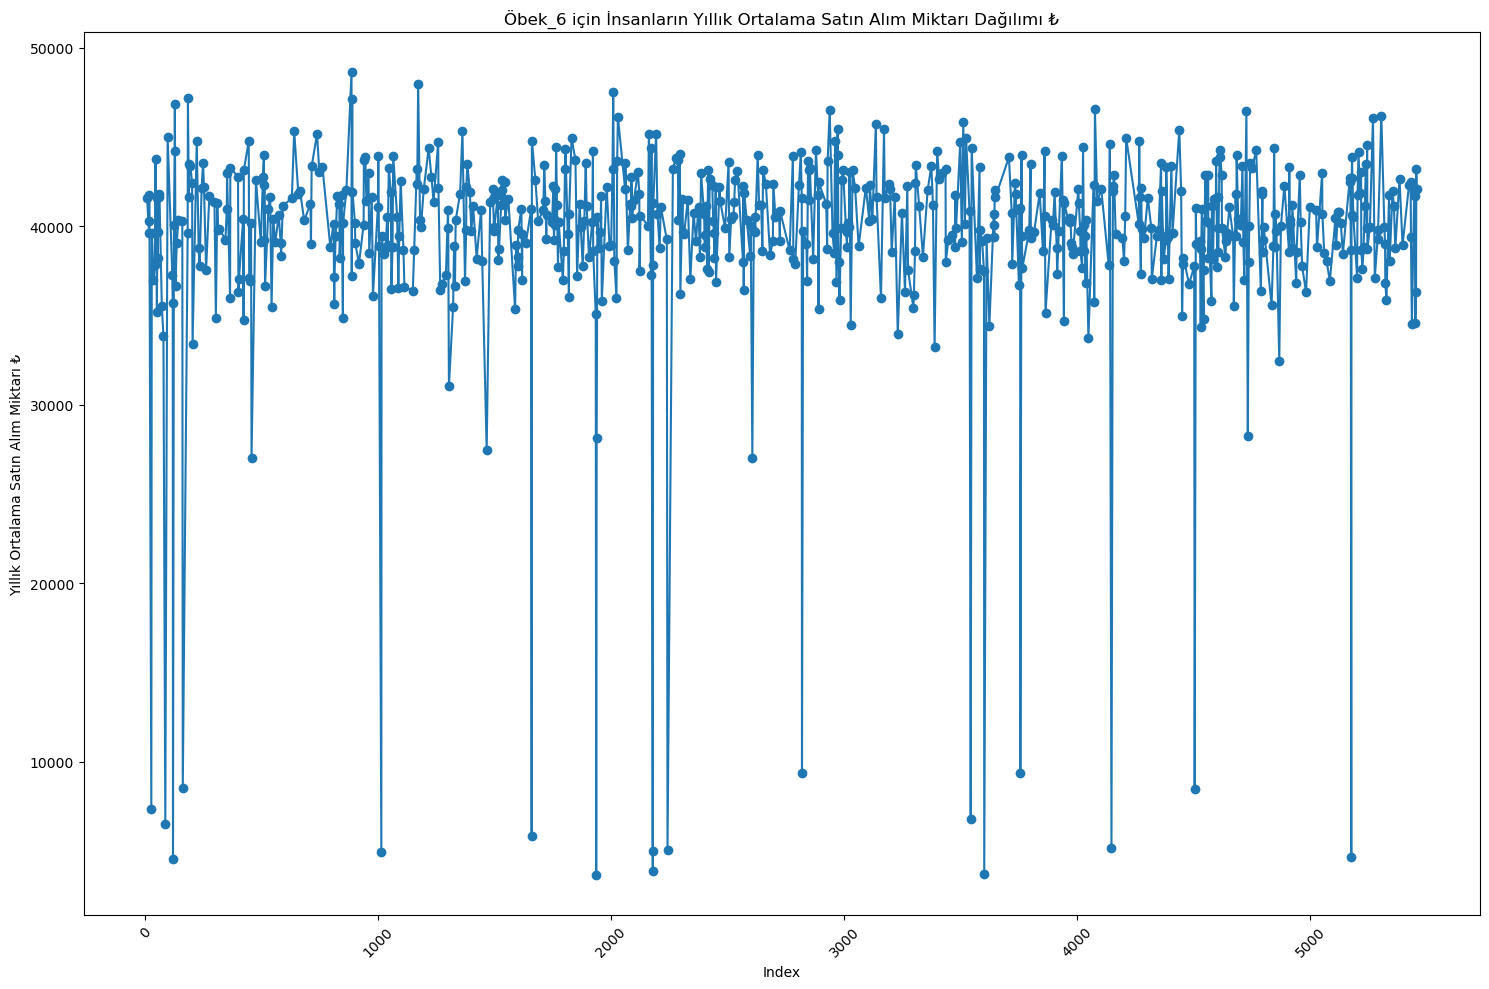

In [155]:
plt.figure(figsize=(15, 10))
plt.plot(obek_6_rows.index, obek_6_rows['Yıllık Ortalama Satın Alım Miktarı'], marker='o')
plt.xlabel('Index')
plt.ylabel('Yıllık Ortalama Satın Alım Miktarı ₺')
plt.title('Öbek_6 için İnsanların Yıllık Ortalama Satın Alım Miktarı Dağılımı ₺')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### İnsanlar paralarının 10'da 1'ini harcıyor gibi görünüyor..

### Yıllık ortalama sipariş verilen ürün adedi

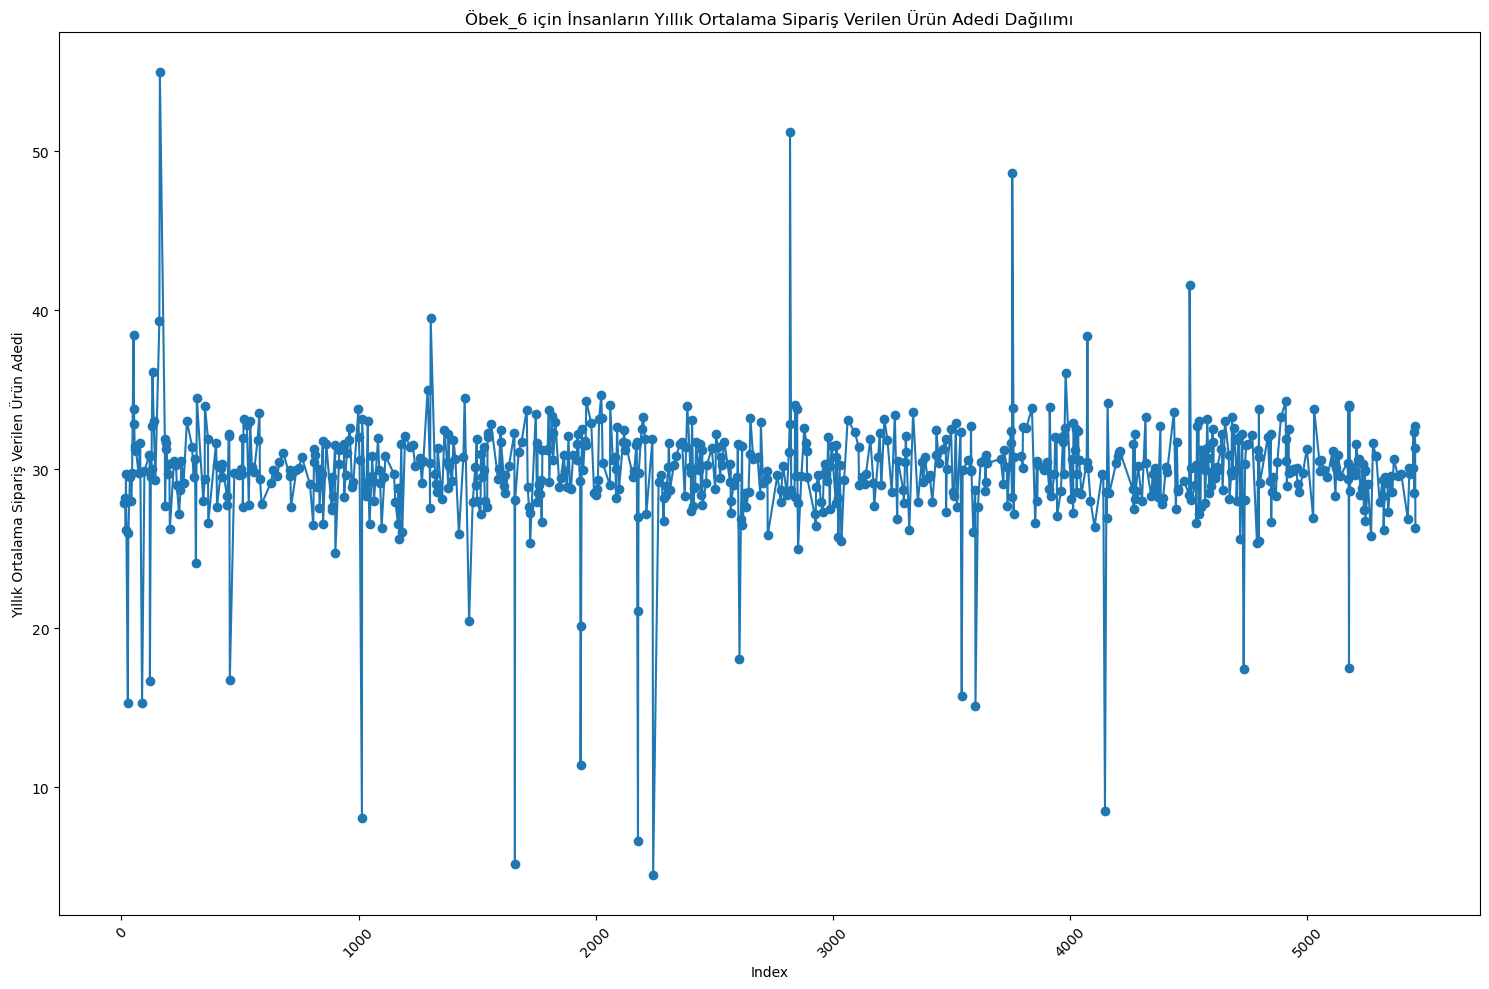

In [156]:
plt.figure(figsize=(15, 10))
plt.plot(obek_6_rows.index, obek_6_rows['Yıllık Ortalama Sipariş Verilen Ürün Adedi'], marker='o')
plt.xlabel('Index')
plt.ylabel('Yıllık Ortalama Sipariş Verilen Ürün Adedi')
plt.title('Öbek_6 için İnsanların Yıllık Ortalama Sipariş Verilen Ürün Adedi Dağılımı')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [157]:
rounded_avg_orders = obek_6_rows['Yıllık Ortalama Sipariş Verilen Ürün Adedi'].apply(round).value_counts().sort_values(ascending=False)
rounded_avg_orders.head(15)

30    148
29    112
31     93
32     88
28     86
33     46
27     34
34     25
26     20
25      5
17      4
15      3
35      2
36      2
39      2
Name: Yıllık Ortalama Sipariş Verilen Ürün Adedi, dtype: int64

##### 25-34 arası diyebiliriz kesin olarak. Parçanın artıp azalması, pahalı şeylere ilgi duyduğunun da bir göstergesi olabilir bu arada. Örneğin zenginler az parça mal alıyorduysa, o zaman pahalı eşya alıyorlar.

### Eğitime devam etme durumu

In [158]:
# Bakmaya gerek var mı :)

obek_6_egitim_devam_durumu = obek_6_rows['Eğitime Devam Etme Durumu'].value_counts()
obek_6_egitim_devam_durumu

0    679
1      9
Name: Eğitime Devam Etme Durumu, dtype: int64

### Yıllık Ortalama Sepete Atılan Ürün Adedi

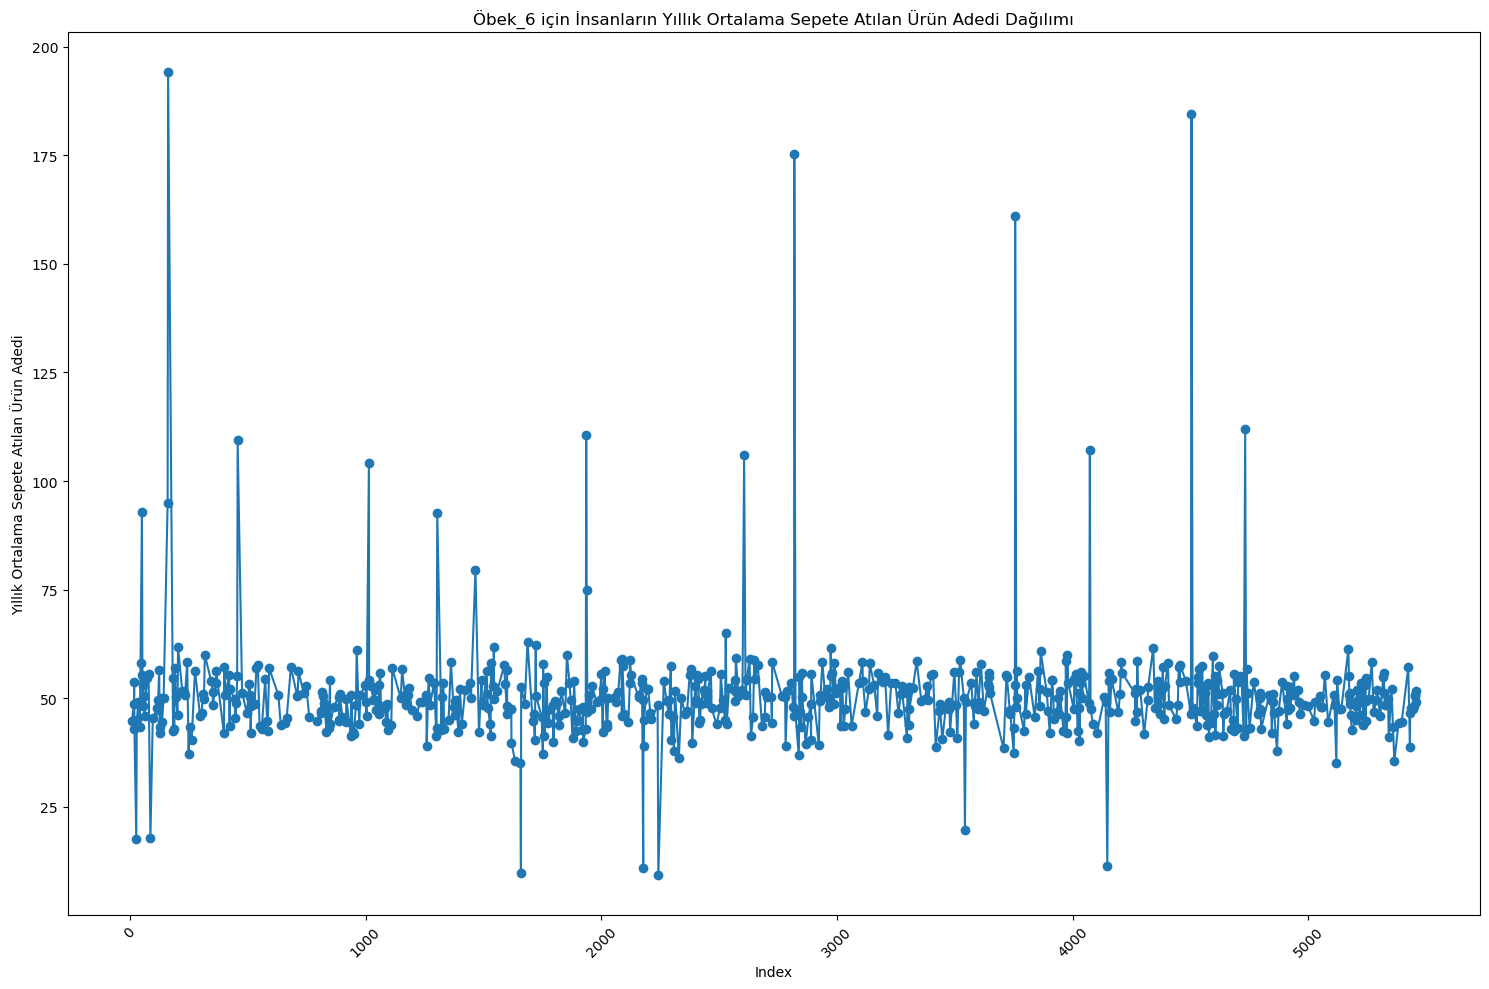

In [159]:
plt.figure(figsize=(15, 10))
plt.plot(obek_6_rows.index, obek_6_rows['Yıllık Ortalama Sepete Atılan Ürün Adedi'], marker='o')
plt.xlabel('Index')
plt.ylabel('Yıllık Ortalama Sepete Atılan Ürün Adedi')
plt.title('Öbek_6 için İnsanların Yıllık Ortalama Sepete Atılan Ürün Adedi Dağılımı')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [160]:
rounded_avg_items = obek_6_rows['Yıllık Ortalama Sepete Atılan Ürün Adedi'].apply(round).value_counts().sort_values(ascending=False)
rounded_avg_items.head(15)

51    54
50    51
48    51
54    48
49    46
46    42
47    38
52    38
44    31
55    30
53    30
45    29
56    28
43    26
42    22
Name: Yıllık Ortalama Sepete Atılan Ürün Adedi, dtype: int64

##### Attıkları üründen neredeyse yarı yarıya bir vazgeçiş söz konusu diyebiliriz.

# obek_7

### Cinsiyet

In [161]:
obek_7_rows = df_train[df_train['Öbek İsmi'] == 'obek_7']
obek_7_gender_counts = obek_7_rows['Cinsiyet'].value_counts()
obek_7_gender_counts

1    348
0    347
Name: Cinsiyet, dtype: int64

##### Yine bir eşit dağılım görüyoruz...

### Yaş grubu

In [162]:
obek_7_age = obek_7_rows['Yaş Grubu'].value_counts()
obek_7_age
# 50 yaş altı gençler oluşturuyor daha çok..

31-40    259
41-50    231
18-30    139
>60       33
51-60     33
Name: Yaş Grubu, dtype: int64

### Medeni Durum

In [163]:
obek_7_medeni_durum = obek_7_rows['Medeni Durum'].value_counts()
obek_7_medeni_durum

1    430
0    265
Name: Medeni Durum, dtype: int64

In [164]:
obek_7_marital_age = obek_7_rows.groupby(['Medeni Durum', 'Yaş Grubu'])['Yaş Grubu'].count().unstack()
obek_7_marital_age

Yaş Grubu     18-30  31-40  41-50  51-60  >60
Medeni Durum                                 
0                52    106     82     15   10
1                87    153    149     18   23

### Eğitim Düzeyi

In [165]:
obek_7_egitim = obek_7_rows['Eğitim Düzeyi'].value_counts()
obek_7_egitim

Üniversite Mezunu       218
Yüksek Lisans Mezunu    201
Doktora Mezunu           66
Lise Mezunu              47
Ortaokul Mezunu          37
Yüksekokul Mezunu        36
İlkokul Mezunu           34
Doktora Ötesi            30
Eğitimsiz                26
Name: Eğitim Düzeyi, dtype: int64

##### Çok eğitimli insanlar yaşlı tayfayla kapışır, ancak yaşları 50'den küçük.. 

In [166]:
obek_7_education_age = obek_7_rows.groupby(['Eğitim Düzeyi', 'Yaş Grubu'])['Öbek İsmi'].count().unstack()
obek_7_education_age
# kültür patlaması diyebilir miyiz? Yaşlı ilkokul mezunu yok.

Yaş Grubu             18-30  31-40  41-50  51-60   >60
Eğitim Düzeyi                                         
Doktora Mezunu          6.0   33.0   19.0    3.0   5.0
Doktora Ötesi           7.0    9.0   10.0    3.0   1.0
Eğitimsiz               4.0    8.0   10.0    NaN   4.0
Lise Mezunu            13.0   19.0   11.0    NaN   4.0
Ortaokul Mezunu         4.0    9.0   23.0    1.0   NaN
Yüksek Lisans Mezunu   51.0   69.0   63.0    7.0  11.0
Yüksekokul Mezunu       9.0    9.0   11.0    4.0   3.0
Üniversite Mezunu      39.0   89.0   72.0   13.0   5.0
İlkokul Mezunu          6.0   14.0   12.0    2.0   NaN

### İstihdam Durumu

In [167]:
obek_7_istihdam = obek_7_rows['İstihdam Durumu'].value_counts()
obek_7_istihdam

Düzenli ve Ücretli Bir İşi Var    576
Kendi İşinin Sahibi                78
Emekli                             36
İşsiz veya Düzenli Bir İşi Yok      5
Name: İstihdam Durumu, dtype: int64

##### Bu grubun adını buldum.. Daha önce sanırım böyle bir grup görmemiştim.... Eğitim düzeylerine göre bakmaya da gerek duymuyorum açıkçası...

### Yıllık Ortalama Gelir

In [168]:
# En zengin gruba hazır mıyız?
obek_7_yearly_income = obek_7_rows['Yıllık Ortalama Gelir']
overall_yearly_income = df_train['Yıllık Ortalama Gelir']

obek_7_avg_income = obek_7_yearly_income.mean()
overall_avg_income = overall_yearly_income.mean()

print("Öbek_7 Yıllık Ortalama Gelir Ortalaması:", obek_7_avg_income)
print("Tüm Veri Yıllık Ortalama Gelir Ortalaması:", overall_avg_income)

Öbek_7 Yıllık Ortalama Gelir Ortalaması: 351949.97605031217
Tüm Veri Yıllık Ortalama Gelir Ortalaması: 363571.1334275545


##### Nasıl ya? Herkes okumuştu?.. İlginç.. Demek eğitim seviyesinin çok olması, paranın da çok olacağı anlamına gelmiyormuş.

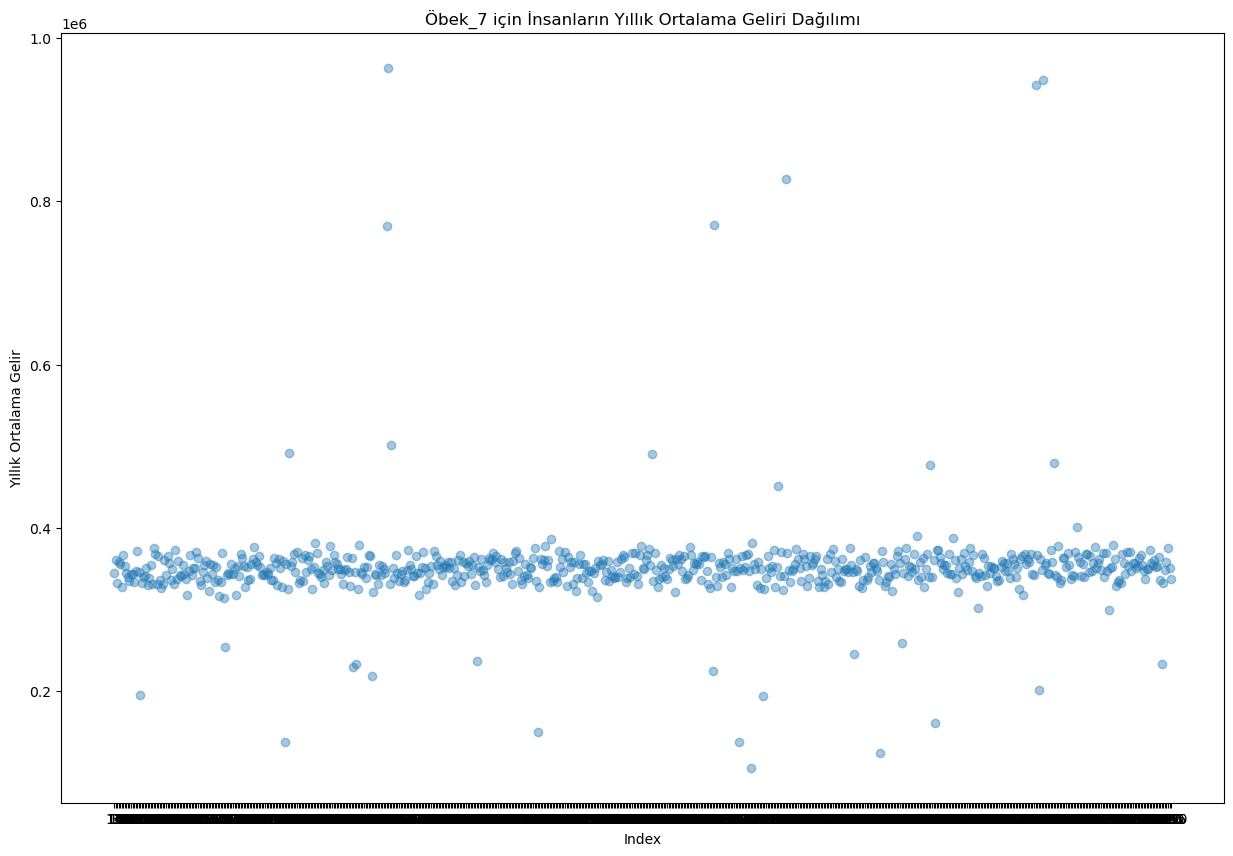

In [169]:
plt.figure(figsize=(15, 10))
plt.scatter(range(obek_7_rows.shape[0]), obek_7_rows['Yıllık Ortalama Gelir'], alpha=0.4)
plt.xlabel('Index')
plt.ylabel('Yıllık Ortalama Gelir')
plt.title('Öbek_7 için İnsanların Yıllık Ortalama Geliri Dağılımı')
plt.xticks(range(obek_7_rows.shape[0]), obek_7_rows.index)  # X ekseni indeks değerleri ile etiketlensin
plt.show()
# Aykırı değer sayılabilir mi, bilmiyorum...

### Yaşadığı şehir

In [170]:
obek_7_sehir = obek_7_rows['Yaşadığı Şehir'].value_counts()
obek_7_sehir

Büyük Şehir        343
Küçük Şehir        312
Köy veya Kasaba     35
Kırsal               5
Name: Yaşadığı Şehir, dtype: int64

### En çok ilgilendiği ürün grubu

In [171]:
obek_7_urun = obek_7_rows['En Çok İlgilendiği Ürün Grubu'].value_counts()
obek_7_urun

Ev ve Mobilya                       189
Giyim                               142
Elektronik ve Teknolojik Ürünler    138
Kozmetik                            125
Spor Malzemeleri                    101
Name: En Çok İlgilendiği Ürün Grubu, dtype: int64

### Yıllık ortalama satın alım miktarı

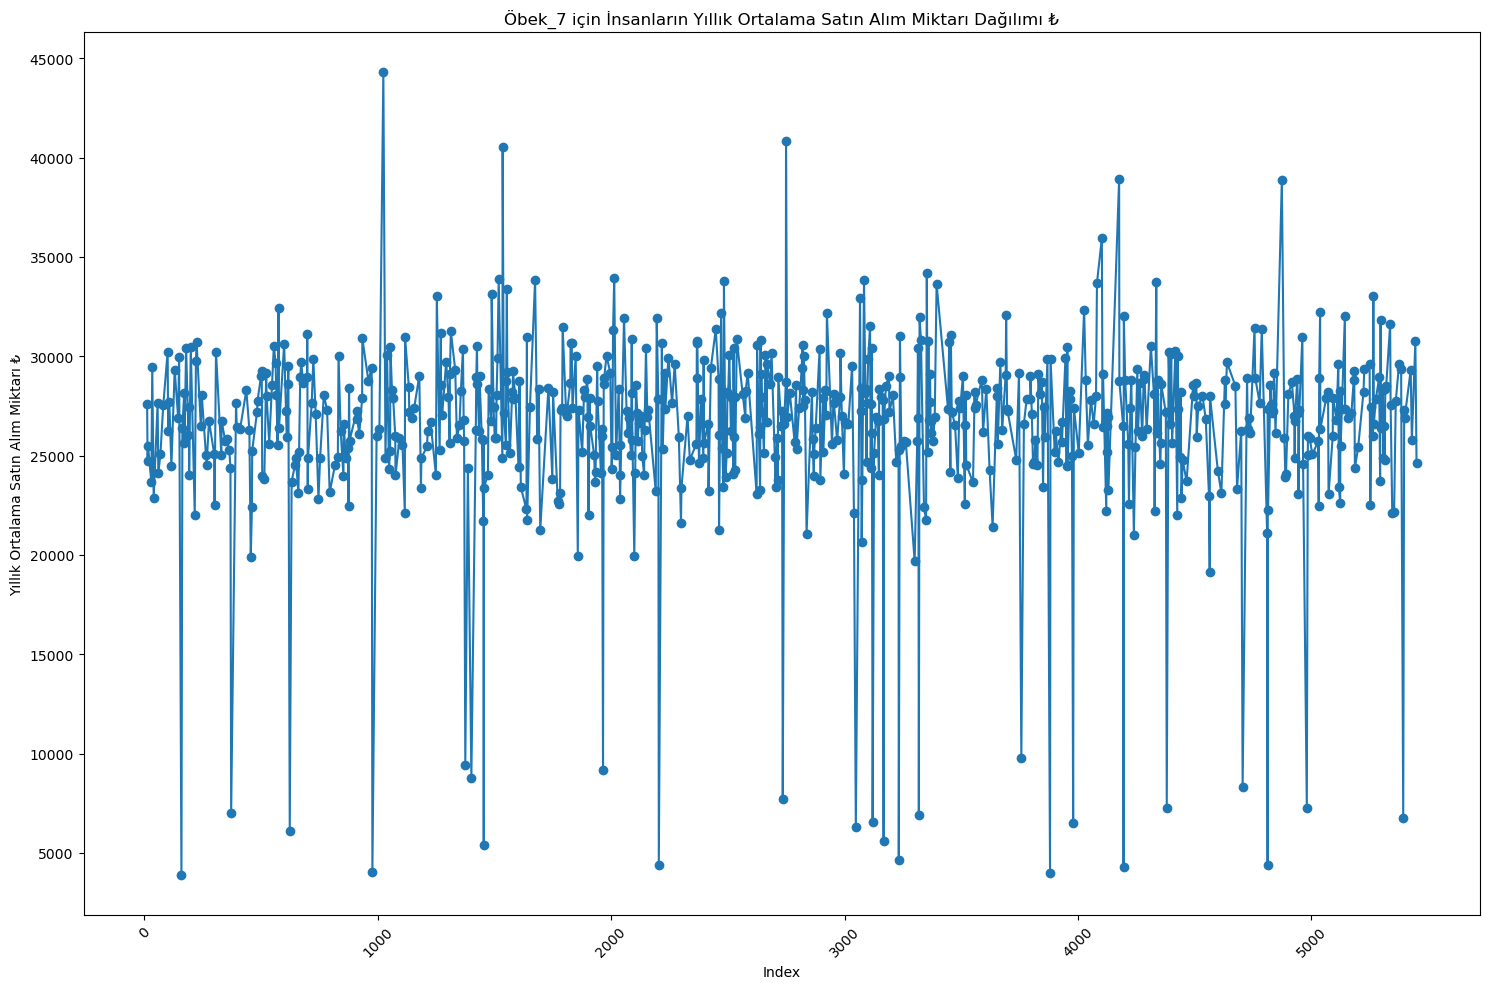

In [172]:
plt.figure(figsize=(15, 10))
plt.plot(obek_7_rows.index, obek_7_rows['Yıllık Ortalama Satın Alım Miktarı'], marker='o')
plt.xlabel('Index')
plt.ylabel('Yıllık Ortalama Satın Alım Miktarı ₺')
plt.title('Öbek_7 için İnsanların Yıllık Ortalama Satın Alım Miktarı Dağılımı ₺')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Bu grup da 10'da 1'ini satın alıyor..

### Yıllık ortalama sipariş verilen ürün adedi

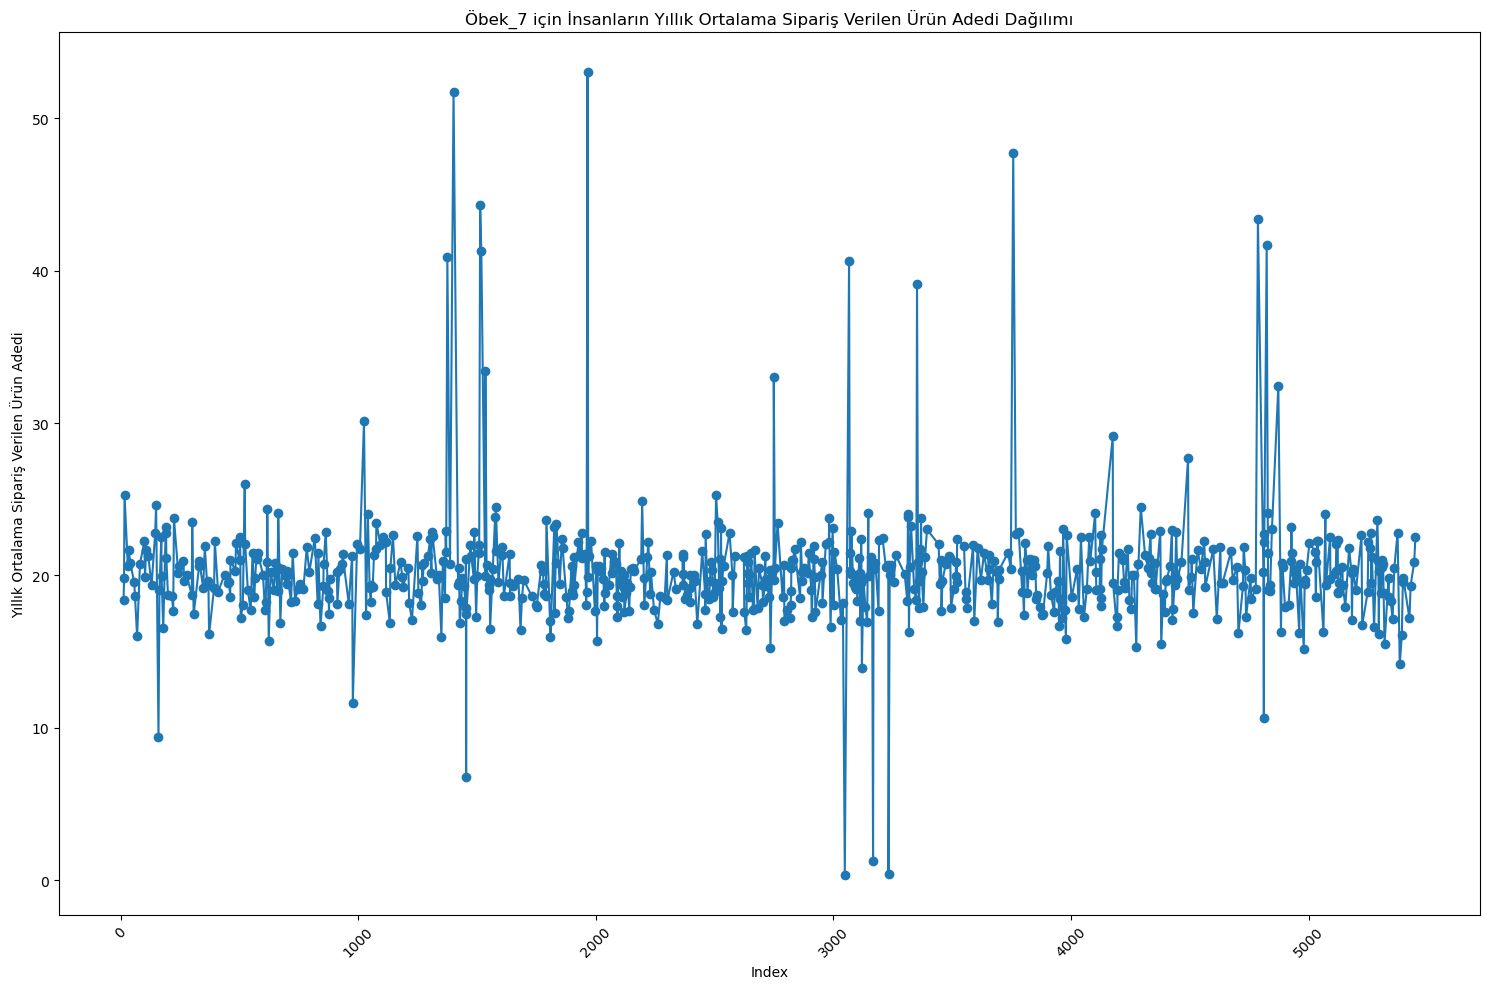

In [173]:
plt.figure(figsize=(15, 10))
plt.plot(obek_7_rows.index, obek_7_rows['Yıllık Ortalama Sipariş Verilen Ürün Adedi'], marker='o')
plt.xlabel('Index')
plt.ylabel('Yıllık Ortalama Sipariş Verilen Ürün Adedi')
plt.title('Öbek_7 için İnsanların Yıllık Ortalama Sipariş Verilen Ürün Adedi Dağılımı')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [174]:
rounded_avg_orders = obek_7_rows['Yıllık Ortalama Sipariş Verilen Ürün Adedi'].apply(round).value_counts().sort_values(ascending=False)
rounded_avg_orders.head(15)

#16-24 arası ürün skalası...

20    146
19    126
21    123
18     74
22     70
17     44
23     43
16     18
24     17
25      4
15      4
41      3
0       2
33      2
14      2
Name: Yıllık Ortalama Sipariş Verilen Ürün Adedi, dtype: int64

### Eğitime devam etme durumu

In [175]:
obek_7_egitim_devam_durumu = obek_7_rows['Eğitime Devam Etme Durumu'].value_counts()
obek_7_egitim_devam_durumu

# Hepsi mezun zaten, okumuş olanlar da devam ediyor.. Eğitimsizliğe tahammülleri yok. 
# Bunlar ne olabilir ki bir fikrim yok gerçekten...

0    627
1     68
Name: Eğitime Devam Etme Durumu, dtype: int64

### Yıllık Ortalama Sepete Atılan Ürün Adedi

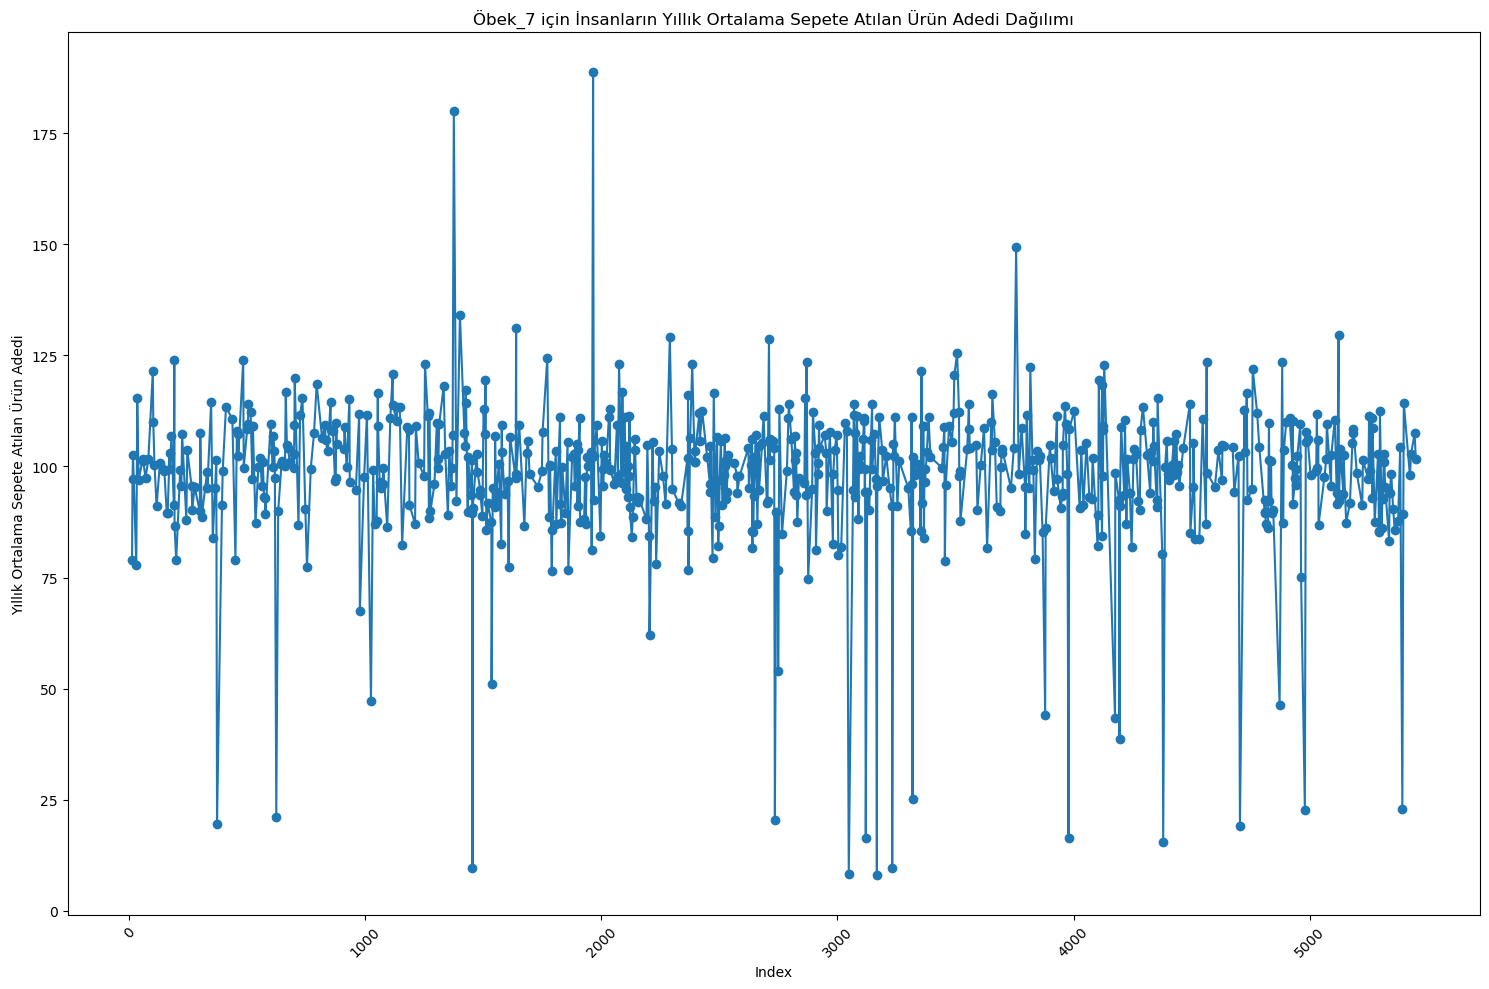

In [176]:
plt.figure(figsize=(15, 10))
plt.plot(obek_7_rows.index, obek_7_rows['Yıllık Ortalama Sepete Atılan Ürün Adedi'], marker='o')
plt.xlabel('Index')
plt.ylabel('Yıllık Ortalama Sepete Atılan Ürün Adedi')
plt.title('Öbek_7 için İnsanların Yıllık Ortalama Sepete Atılan Ürün Adedi Dağılımı')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [177]:
rounded_avg_items = obek_7_rows['Yıllık Ortalama Sepete Atılan Ürün Adedi'].apply(round).value_counts().sort_values(ascending=False)
rounded_avg_items.head(15)

102    32
100    32
104    29
109    28
103    27
95     26
99     26
98     25
101    24
111    22
106    22
97     21
105    21
87     20
91     20
Name: Yıllık Ortalama Sepete Atılan Ürün Adedi, dtype: int64

##### Bu tabloyu görmek çok acı... Bu grup da sepete eklediklerinin yalnızca 5'de 1'ini alıyor... Bu grup da okumuş ama pek fazla kazanmıyor.. Memur değiller bence ama kim olduklarını da çözemedim.

# obek_8

### Cinsiyet

In [178]:
obek_8_rows = df_train[df_train['Öbek İsmi'] == 'obek_8']
obek_8_gender_counts = obek_8_rows['Cinsiyet'].value_counts()
obek_8_gender_counts

0    360
1    357
Name: Cinsiyet, dtype: int64

### Yaş grubu

In [179]:
obek_8_age = obek_8_rows['Yaş Grubu'].value_counts()
obek_8_age

# Bu sefer vurduk... Üniversite öğrencisi bunlar...

18-30    697
31-40     10
51-60      6
>60        2
41-50      2
Name: Yaş Grubu, dtype: int64

### Medeni Durum

In [180]:
obek_8_medeni_durum = obek_8_rows['Medeni Durum'].value_counts()
obek_8_medeni_durum

# Adım adım öğrencilere yaklaşıyorıum..

0    636
1     81
Name: Medeni Durum, dtype: int64

In [181]:
obek_8_marital_age = obek_8_rows.groupby(['Medeni Durum', 'Yaş Grubu'])['Yaş Grubu'].count().unstack()
obek_8_marital_age

Yaş Grubu     18-30  31-40  41-50  51-60  >60
Medeni Durum                                 
0               627      5      1      2    1
1                70      5      1      4    1

### Eğitim Düzeyi

In [182]:
obek_8_egitim = obek_8_rows['Eğitim Düzeyi'].value_counts()
obek_8_egitim

Yüksekokul Mezunu       221
Üniversite Mezunu       221
Lise Mezunu             163
Yüksek Lisans Mezunu     60
İlkokul Mezunu           22
Ortaokul Mezunu          16
Eğitimsiz                 8
Doktora Mezunu            4
Doktora Ötesi             2
Name: Eğitim Düzeyi, dtype: int64

##### Öncekinden bile eğitimli

In [183]:
obek_8_education_age = obek_8_rows.groupby(['Eğitim Düzeyi', 'Yaş Grubu'])['Öbek İsmi'].count().unstack()
obek_8_education_age

Yaş Grubu             18-30  31-40  41-50  51-60  >60
Eğitim Düzeyi                                        
Doktora Mezunu          NaN    3.0    NaN    1.0  NaN
Doktora Ötesi           1.0    1.0    NaN    NaN  NaN
Eğitimsiz               6.0    NaN    1.0    1.0  NaN
Lise Mezunu           159.0    2.0    NaN    2.0  NaN
Ortaokul Mezunu        15.0    1.0    NaN    NaN  NaN
Yüksek Lisans Mezunu   58.0    1.0    1.0    NaN  NaN
Yüksekokul Mezunu     220.0    1.0    NaN    NaN  NaN
Üniversite Mezunu     219.0    NaN    NaN    1.0  1.0
İlkokul Mezunu         19.0    1.0    NaN    1.0  1.0

### İstihdam Durumu

In [184]:
obek_8_istihdam = obek_8_rows['İstihdam Durumu'].value_counts()
obek_8_istihdam

Düzenli ve Ücretli Bir İşi Var    419
İşsiz veya Düzenli Bir İşi Yok    220
Kendi İşinin Sahibi                76
Emekli                              2
Name: İstihdam Durumu, dtype: int64

### Yıllık Ortalama Gelir

In [185]:
obek_8_yearly_income = obek_8_rows['Yıllık Ortalama Gelir']
overall_yearly_income = df_train['Yıllık Ortalama Gelir']

obek_8_avg_income = obek_8_yearly_income.mean()
overall_avg_income = overall_yearly_income.mean()

print("Öbek_8 Yıllık Ortalama Gelir Ortalaması:", obek_8_avg_income)
print("Tüm Veri Yıllık Ortalama Gelir Ortalaması:", overall_avg_income)


# Yani. Çok bir anlamı yok.. Bu grup benim için üniversite öğrencileri, yeni mezunlar ve 
# junior grubu. 

Öbek_8 Yıllık Ortalama Gelir Ortalaması: 255354.92666951832
Tüm Veri Yıllık Ortalama Gelir Ortalaması: 363571.1334275545


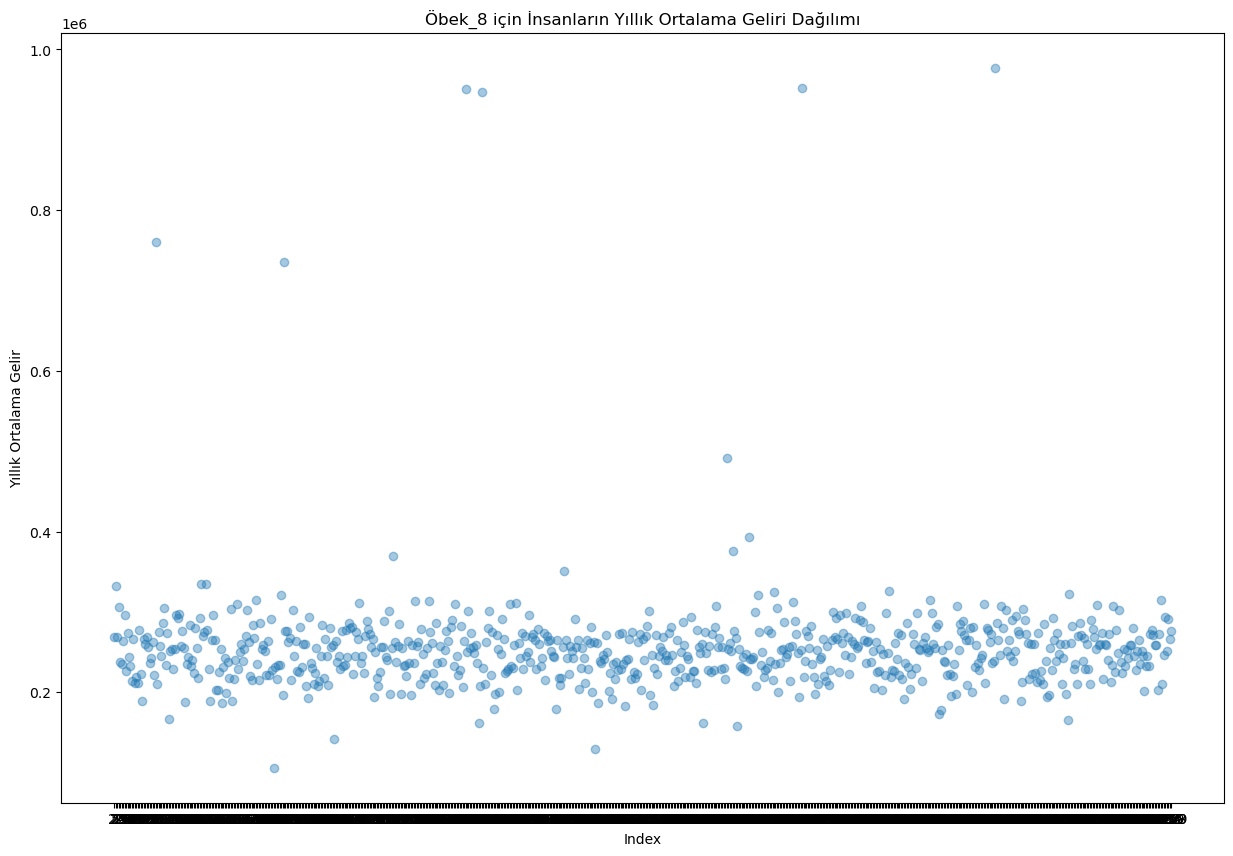

In [186]:
plt.figure(figsize=(15, 10))
plt.scatter(range(obek_8_rows.shape[0]), obek_8_rows['Yıllık Ortalama Gelir'], alpha=0.4)
plt.xlabel('Index')
plt.ylabel('Yıllık Ortalama Gelir')
plt.title('Öbek_8 için İnsanların Yıllık Ortalama Geliri Dağılımı')
plt.xticks(range(obek_8_rows.shape[0]), obek_8_rows.index)  # X ekseni indeks değerleri ile etiketlensin
plt.show()

### Yaşadığı şehir

In [187]:
obek_8_sehir = obek_8_rows['Yaşadığı Şehir'].value_counts()
obek_8_sehir

Büyük Şehir        364
Küçük Şehir        311
Köy veya Kasaba     41
Kırsal               1
Name: Yaşadığı Şehir, dtype: int64

### En çok ilgilendiği ürün grubu

In [188]:
obek_8_urun = obek_8_rows['En Çok İlgilendiği Ürün Grubu'].value_counts()
obek_8_urun

Giyim                               156
Ev ve Mobilya                       152
Kozmetik                            152
Elektronik ve Teknolojik Ürünler    133
Spor Malzemeleri                    124
Name: En Çok İlgilendiği Ürün Grubu, dtype: int64

### Yıllık ortalama satın alım miktarı

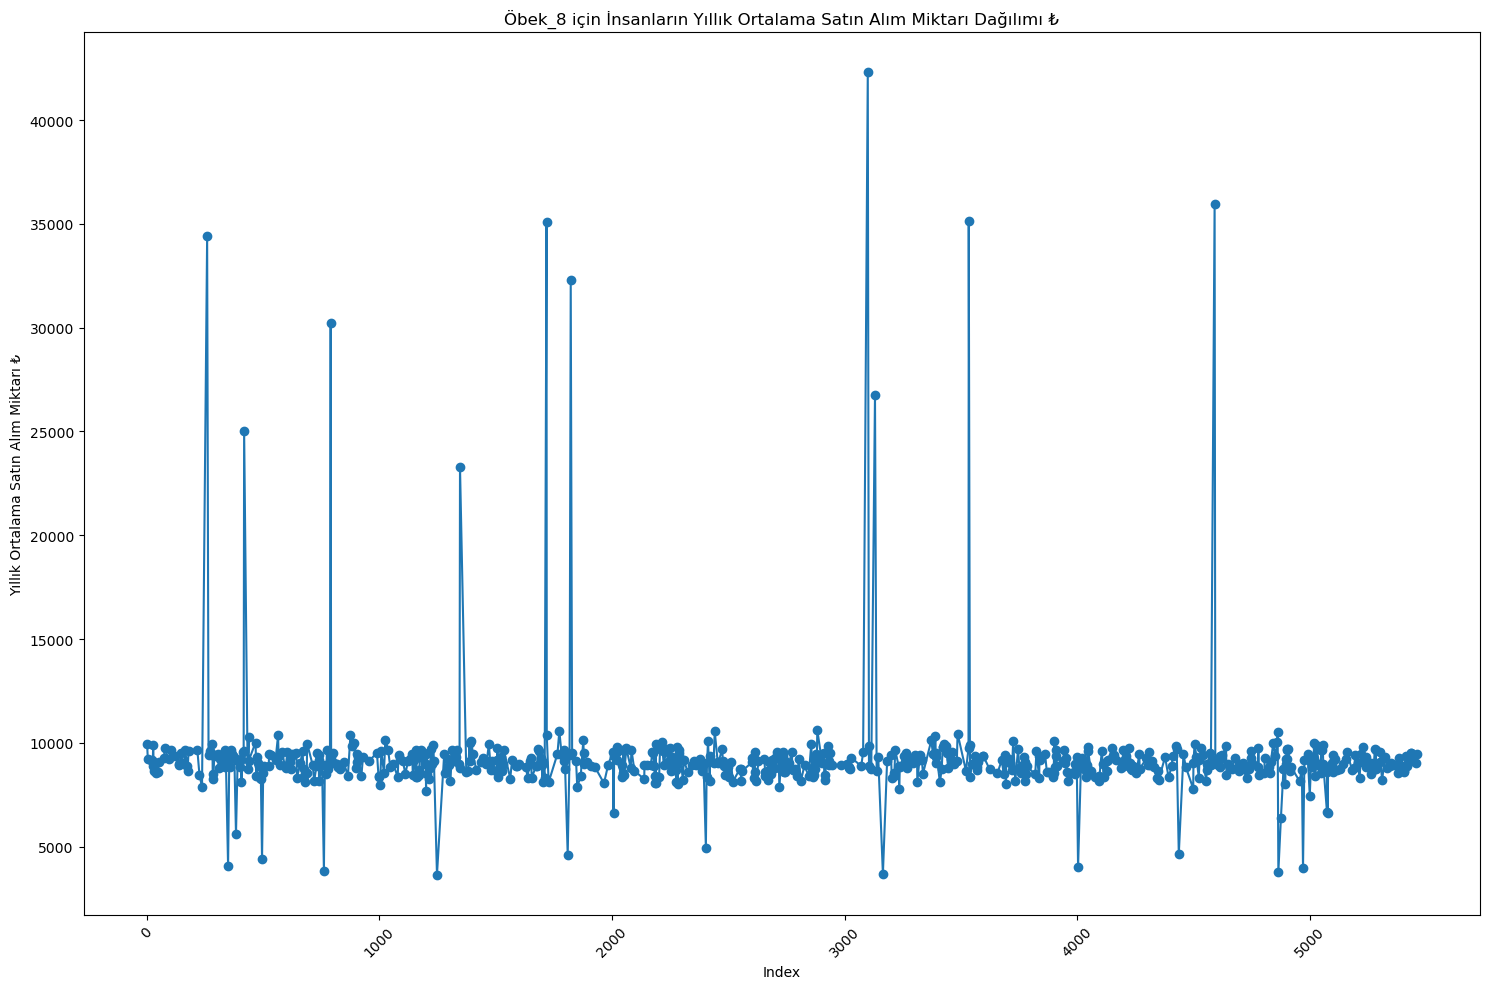

In [189]:
plt.figure(figsize=(15, 10))
plt.plot(obek_8_rows.index, obek_8_rows['Yıllık Ortalama Satın Alım Miktarı'], marker='o')
plt.xlabel('Index')
plt.ylabel('Yıllık Ortalama Satın Alım Miktarı ₺')
plt.title('Öbek_8 için İnsanların Yıllık Ortalama Satın Alım Miktarı Dağılımı ₺')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Outlier var hepsinde... Hepsinde var her grupta eminim. Sonradan eklenmiş elle.

### Yıllık ortalama sipariş verilen ürün adedi

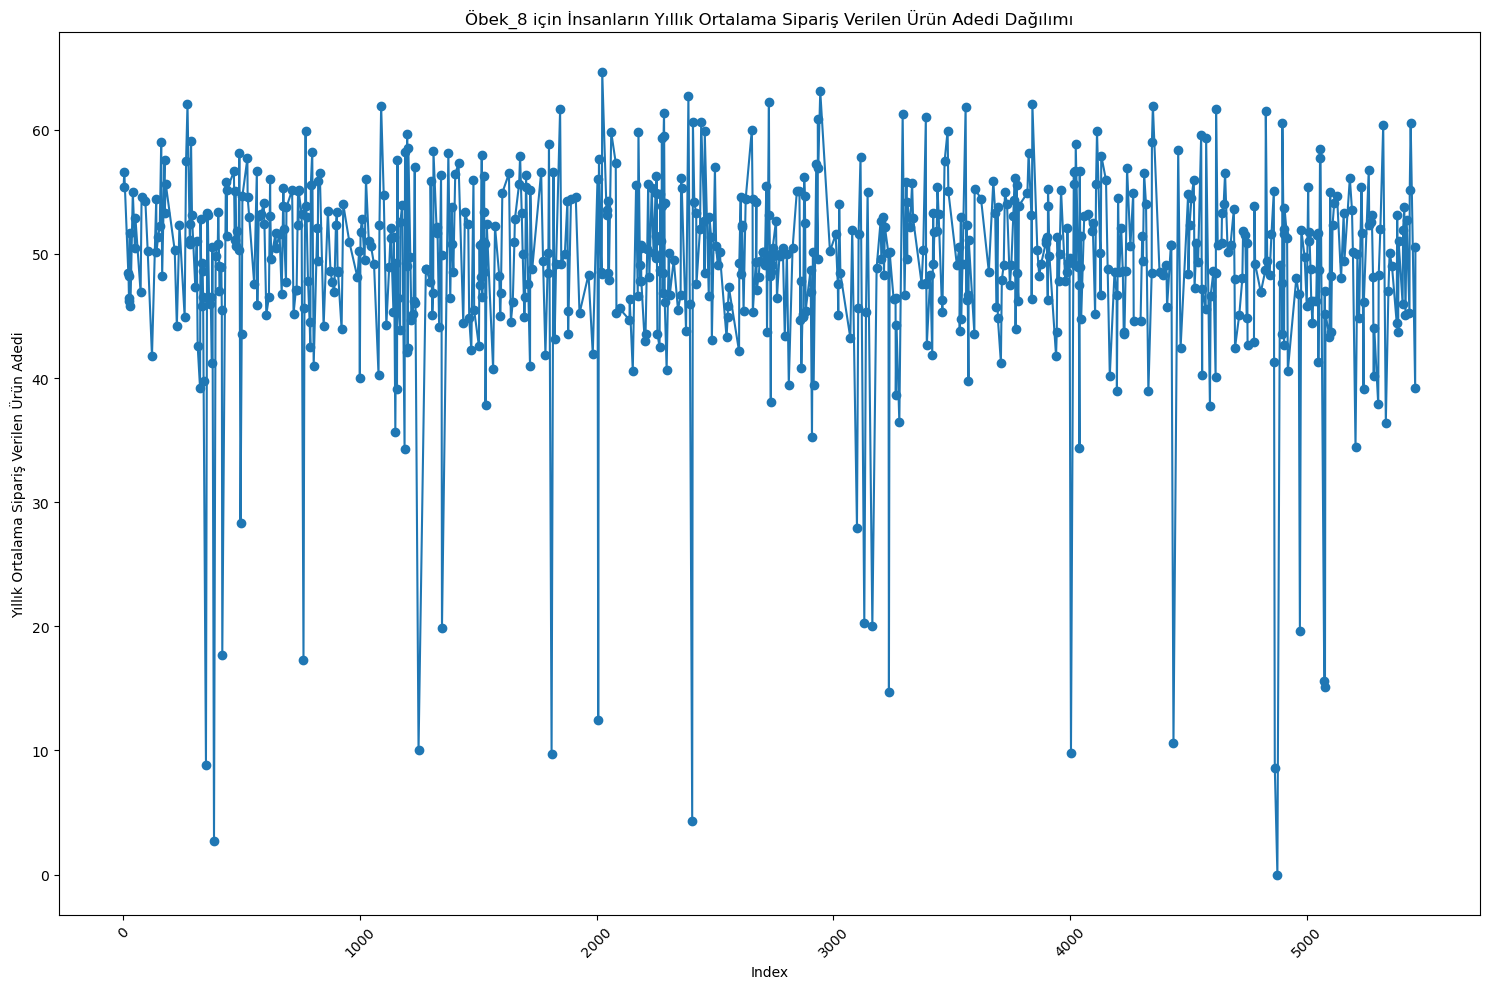

In [190]:
plt.figure(figsize=(15, 10))
plt.plot(obek_8_rows.index, obek_8_rows['Yıllık Ortalama Sipariş Verilen Ürün Adedi'], marker='o')
plt.xlabel('Index')
plt.ylabel('Yıllık Ortalama Sipariş Verilen Ürün Adedi')
plt.title('Öbek_8 için İnsanların Yıllık Ortalama Sipariş Verilen Ürün Adedi Dağılımı')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [191]:
rounded_avg_orders = obek_8_rows['Yıllık Ortalama Sipariş Verilen Ürün Adedi'].apply(round).value_counts().sort_values(ascending=False)
rounded_avg_orders.head(15)

49    64
48    54
52    50
50    47
51    47
53    45
55    41
45    41
46    38
54    37
47    33
56    31
44    27
57    20
58    17
Name: Yıllık Ortalama Sipariş Verilen Ürün Adedi, dtype: int64

### Eğitime devam etme durumu

In [192]:
obek_8_egitim_devam_durumu = obek_8_rows['Eğitime Devam Etme Durumu'].value_counts()
obek_8_egitim_devam_durumu

# Mezun tayfa :))) GRİ KOÇÇÇ

1    621
0     96
Name: Eğitime Devam Etme Durumu, dtype: int64

### Yıllık Ortalama Sepete Atılan Ürün Adedi

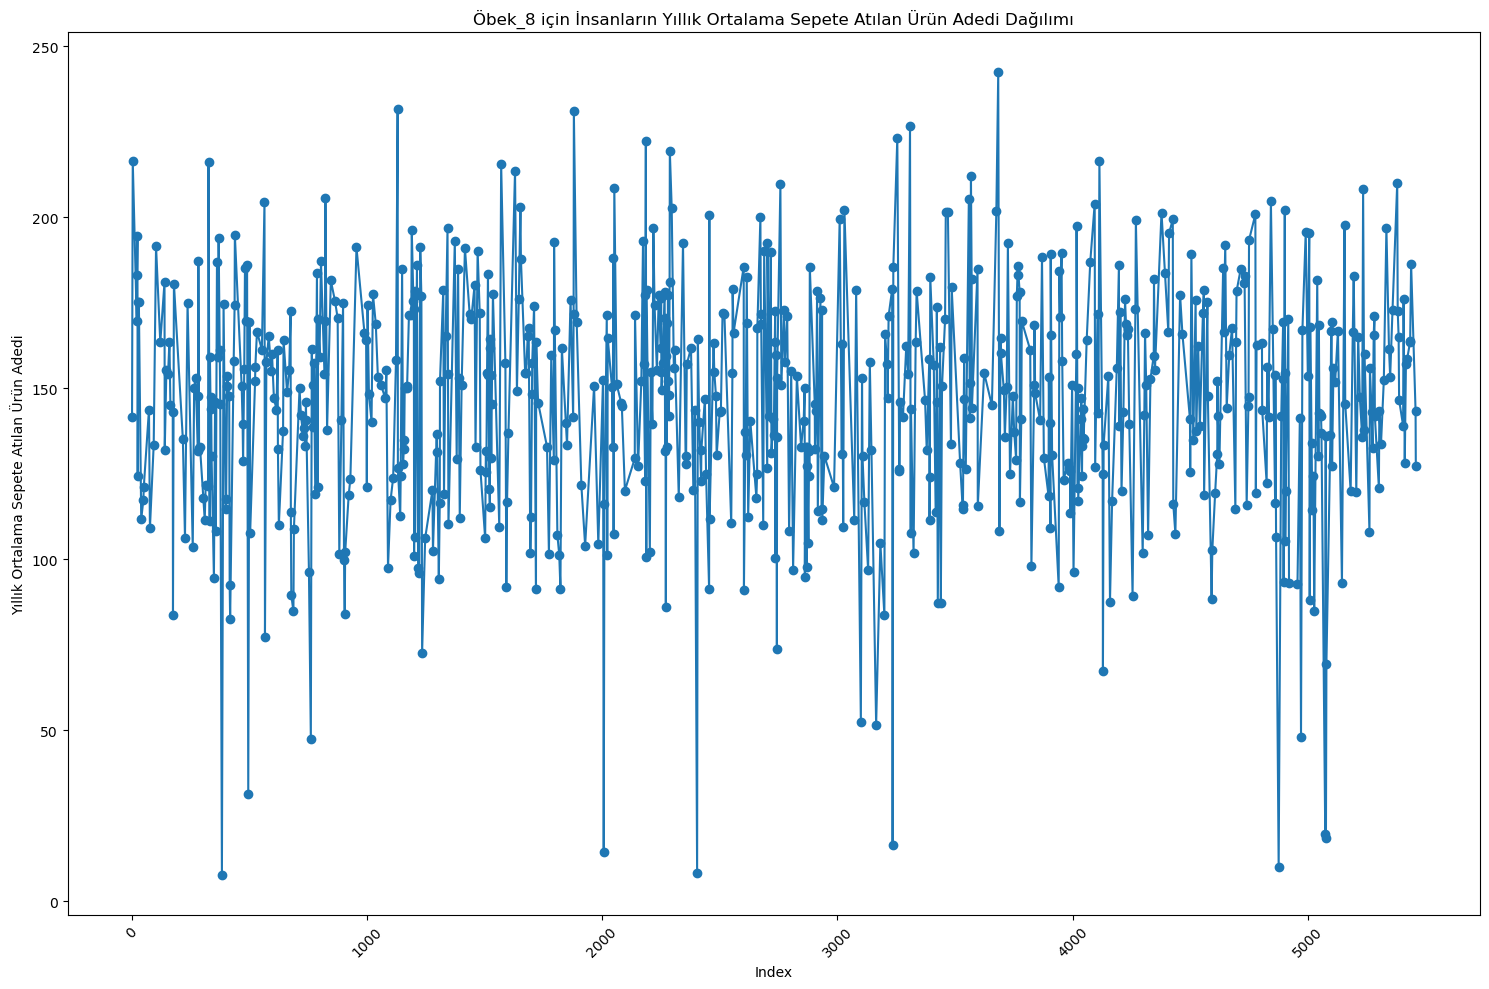

In [193]:
plt.figure(figsize=(15, 10))
plt.plot(obek_8_rows.index, obek_8_rows['Yıllık Ortalama Sepete Atılan Ürün Adedi'], marker='o')
plt.xlabel('Index')
plt.ylabel('Yıllık Ortalama Sepete Atılan Ürün Adedi')
plt.title('Öbek_8 için İnsanların Yıllık Ortalama Sepete Atılan Ürün Adedi Dağılımı')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [194]:
rounded_avg_items = obek_8_rows['Yıllık Ortalama Sepete Atılan Ürün Adedi'].apply(round).value_counts().sort_values(ascending=False)
rounded_avg_items.head(15)

133    14
154    14
142    13
151    13
132    12
153    11
155    11
169    10
164    10
143    10
147    10
172    10
170    10
141    10
130    10
Name: Yıllık Ortalama Sepete Atılan Ürün Adedi, dtype: int64

##### Baksana, sana da mantıklı gelmiyor mu? Veriler sanki el ile oluşturulmuş. (Ki zaten öyle). Sadece araya birkaç tane yanlış ve farklı veri koymuşlar. Gerisi basit. Birkaç grubun mantığı farklı türlü çözülecek... Sadece onlar kaldı... Teşekkürler.

# MODEL

In [195]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Eğitim ve test setlerini oluşturun
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeli kurun ve eğitin
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Cross-Validation İle Model Performansını Değerlendirin
scores = cross_val_score(model, X_train, y_train, cv=5) 
print("Cross-Validation Scores:", scores)
print("Mean CV Score:", scores.mean())

# Test verileri üzerinde tahmin yapın
y_pred = model.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Doğruluk
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Hassasiyet
precision = precision_score(y_test, y_pred, average='macro')
print("Precision:", precision)

# Duyarlılık
recall = recall_score(y_test, y_pred, average='macro')
print("Recall:", recall)

# F1-Skoru
f1 = f1_score(y_test, y_pred, average='macro')
print("F1-Score:", f1)


Cross-Validation Scores: [0.94279176 0.94622426 0.96338673 0.94959908 0.96105384]
Mean CV Score: 0.9526111333915246
Confusion Matrix:
[[128   1   1   1   1   1   2   0]
 [  1 109   0   0   2   2   0   0]
 [  0   0 143   0   0   1   1   0]
 [  1   0   2 124   0   3   0   4]
 [  0   0   0   0 137   0   1   1]
 [  0   0   1   0   0 125   1   1]
 [  2   1   1   2   1   1 139   1]
 [  1   1   0   0   2   0   0 145]]
Accuracy: 0.9615384615384616
Precision: 0.9619163997531175
Recall: 0.9612982615377609
F1-Score: 0.9613902490291308


In [196]:
# Özellikler (X) ve etiketler (y) ayrımı
X = encoded_train.drop('Öbek İsmi', axis=1)
y = encoded_train['Öbek İsmi']

# Modeli tam veri seti üzerinde eğitin
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Submission yapılacak test verileri üzerinde tahmin yapın
submission_pred = model.predict(encoded_test)

# Tahminleri 'id' değerleriyle birleştirerek DataFrame oluşturun
submission_df = pd.DataFrame({'id': encoded_test.index, 'obek_ismi': submission_pred})

# DataFrame'i CSV dosyasına kaydedin
submission_df.to_csv('submission.csv', index=False)

In [197]:
# Submission yapılacak test verileri üzerinde tahmin yapın
submission_pred = model.predict(encoded_test)

# Tahminleri 'id' değerleriyle birleştirerek DataFrame oluşturun
submission_df = pd.DataFrame({'id': encoded_test.index, 'Öbek İsmi': submission_pred})

# 'id' sütununu indeks olarak ayarlayın
submission_df.set_index('id', inplace=True)

# DataFrame'i CSV dosyasına kaydedin
submission_df.to_csv('submission.csv')

In [198]:
submission_df

Öbek İsmi
id            
0       obek_3
1       obek_3
2       obek_2
3       obek_6
4       obek_1
...        ...
2335    obek_8
2336    obek_2
2337    obek_7
2338    obek_5
2339    obek_6

[2340 rows x 1 columns]

In [199]:
from sklearn.ensemble import RandomForestClassifier

# Bağımsız değişkenler ve hedef değişkeni ayır
X = encoded_train.drop('Öbek İsmi', axis=1)
y = encoded_train['Öbek İsmi']

# Modeli kur
model = RandomForestClassifier()
model.fit(X, y)

# Özellik önemini al
feature_importances = model.feature_importances_

# Her özelliğin önemini eşleştirerek yazdır
for feature, importance in zip(X.columns, feature_importances):
    print(f"Özellik: {feature}, Önem: {importance}")

Özellik: Cinsiyet, Önem: 0.022553407974899835
Özellik: Medeni Durum, Önem: 0.010132695947429382
Özellik: Yıllık Ortalama Gelir, Önem: 0.16667156053176665
Özellik: Yıllık Ortalama Satın Alım Miktarı, Önem: 0.1847983031545886
Özellik: Yıllık Ortalama Sipariş Verilen Ürün Adedi, Önem: 0.2180565292213217
Özellik: Eğitime Devam Etme Durumu, Önem: 0.02500067069951818
Özellik: Yıllık Ortalama Sepete Atılan Ürün Adedi, Önem: 0.18674388559502486
Özellik: Yaş Grubu_18-30, Önem: 0.020423008784562668
Özellik: Yaş Grubu_31-40, Önem: 0.011275198661855378
Özellik: Yaş Grubu_41-50, Önem: 0.0037729462752640716
Özellik: Yaş Grubu_51-60, Önem: 0.009273715876921948
Özellik: Yaş Grubu_>60, Önem: 0.002858010544532972
Özellik: Eğitim Düzeyi_Doktora Mezunu, Önem: 0.0014667943647288754
Özellik: Eğitim Düzeyi_Doktora Ötesi, Önem: 0.0016444617189543096
Özellik: Eğitim Düzeyi_Eğitimsiz, Önem: 0.0027631631319740718
Özellik: Eğitim Düzeyi_Lise Mezunu, Önem: 0.020537837049633568
Özellik: Eğitim Düzeyi_Ortaokul Mezun